## Final Project Data Science - IRAK TEAM

1. Rhisa Adika Putri		(DS03279)
2. Ryan Christofer Sinurat	(DS03284)
3. Whena Tsani Tandhu Irman	(DS03295)
4. Yusri Azisah Shabila		(DS03297)

- Group  : M
- Mentor : Kak Alvin Utama Putra

## Import Libraries and Data

In [1]:
# import library
import pandas as pd 
import numpy as np 
import statistics
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import catboost as cb
from datetime import datetime
from datetime import date
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge, Lasso, ElasticNet

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset
cust = pd.read_csv('customer.csv')
trans = pd.read_csv('transactions.csv')
clicks = pd.read_csv('click_stream_new.csv')
product = pd.read_excel('product.xlsx')

In [3]:
# show all columns
pd.set_option('display.max_columns', None)

## Data Preprocessing

In [4]:
cust

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31


In [5]:
trans

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143


In [6]:
clicks.head()

,Unnamed: 0,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,12371558,607d864b-76b5-45a1-a45d-7fb666a03ea1,BOOKING,2016-06-30T23:18:44.792905Z,cc8314e5-f925-4e96-a819-41592834199a,MOBILE,{'payment_status': 'Success'}
1,5004538,c5d3792d-9220-47db-ad80-4932f3f88d0e,BOOKING,2016-07-01T02:53:26.720195Z,df9f8aa7-0bb5-493e-81d9-8cecca5b4140,MOBILE,{'payment_status': 'Success'}
2,11943149,bbff775e-4166-46aa-bbfd-4ba6465add17,BOOKING,2016-07-01T09:45:51.803842Z,abfaa04b-c874-4e3d-9603-85c9729eb22c,MOBILE,{'payment_status': 'Success'}
3,11874861,8f385c80-1b70-4861-80ac-5eb3b5620fee,BOOKING,2016-07-01T22:32:45.218400Z,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,{'payment_status': 'Success'}
4,11818831,df175a0e-f6e4-4d9a-a76a-38976e09ccf1,BOOKING,2016-07-02T05:28:40.302335Z,29f364ad-c729-457b-8f7c-7b053149082d,MOBILE,{'payment_status': 'Success'}


In [7]:
clicks.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
clicks

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,607d864b-76b5-45a1-a45d-7fb666a03ea1,BOOKING,2016-06-30T23:18:44.792905Z,cc8314e5-f925-4e96-a819-41592834199a,MOBILE,{'payment_status': 'Success'}
1,c5d3792d-9220-47db-ad80-4932f3f88d0e,BOOKING,2016-07-01T02:53:26.720195Z,df9f8aa7-0bb5-493e-81d9-8cecca5b4140,MOBILE,{'payment_status': 'Success'}
2,bbff775e-4166-46aa-bbfd-4ba6465add17,BOOKING,2016-07-01T09:45:51.803842Z,abfaa04b-c874-4e3d-9603-85c9729eb22c,MOBILE,{'payment_status': 'Success'}
3,8f385c80-1b70-4861-80ac-5eb3b5620fee,BOOKING,2016-07-01T22:32:45.218400Z,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,{'payment_status': 'Success'}
4,df175a0e-f6e4-4d9a-a76a-38976e09ccf1,BOOKING,2016-07-02T05:28:40.302335Z,29f364ad-c729-457b-8f7c-7b053149082d,MOBILE,{'payment_status': 'Success'}
...,...,...,...,...,...,...
895198,2df0725f-f17d-4a71-8979-860f5e82021a,ITEM_DETAIL,2022-08-01T00:19:03.292816Z,59b279b3-19ac-49b3-8bad-4f2e0b90d31c,MOBILE,NaN
895199,95168514-c4a8-4611-8739-c45dc6374b43,HOMEPAGE,2022-08-01T00:23:04.821469Z,9eaae58f-1ca7-4db3-ac0f-76a3e4497d34,WEB,NaN
895200,87a77ed6-e487-45d2-b73b-aa9277a2d717,HOMEPAGE,2022-08-01T00:24:28.200546Z,439df875-64eb-4f13-8871-a57af159bc48,MOBILE,NaN
895201,48bdb39a-195d-4acf-835a-35556390f7dd,CLICK,2022-08-01T00:31:53.957678Z,a0d5d325-966f-44f0-99ed-b8670ef4601f,MOBILE,NaN


In [9]:
clicks.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
895198    False
895199    False
895200    False
895201    False
895202    False
Length: 895203, dtype: bool

In [10]:
product.head()

,product,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1,23124,Unisex,Footwear,Flip Flops,Flip Flops,Navy Blue,Spring,2013,Casual,Converse Unisex Navy Blue Live; Laugh; Love Fl...
2,23127,Unisex,Footwear,Flip Flops,Flip Flops,Green,Summer,2012,Casual,Converse Unisex Green Live; Life; Laugh Flip ...
3,3428,Men,Apparel,Topwear,Tshirts,Black,Summer,2011,Casual,Myntra Mens Be Reasonable; Do It My Way T-shirt
4,59768,Women,Accessories,Jewellery,Earrings,Gold,Winter,2016,Casual,Estelle Women Gold; Silver and Copper Toned E...


In [11]:
new_header = product.iloc[0]
product = product[1:]
product.columns = new_header

In [12]:
product

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1,23124,Unisex,Footwear,Flip Flops,Flip Flops,Navy Blue,Spring,2013,Casual,Converse Unisex Navy Blue Live; Laugh; Love Fl...
2,23127,Unisex,Footwear,Flip Flops,Flip Flops,Green,Summer,2012,Casual,Converse Unisex Green Live; Life; Laugh Flip ...
3,3428,Men,Apparel,Topwear,Tshirts,Black,Summer,2011,Casual,Myntra Mens Be Reasonable; Do It My Way T-shirt
4,59768,Women,Accessories,Jewellery,Earrings,Gold,Winter,2016,Casual,Estelle Women Gold; Silver and Copper Toned E...
5,3413,Men,Apparel,Topwear,Tshirts,White,Summer,2011,Casual,Myntra Men's Yes; its all about me White T-shirt
...,...,...,...,...,...,...,...,...,...,...
44442,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013,Casual,Gas Men Caddy Casual Shoe
44443,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011,Casual,Lotto Men's Soccer Track Flip Flop
44444,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011,Casual,Puma Men Graphic Stellar Blue Tshirt
44445,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017,Casual,Rasasi Women Blue Lady Perfume


In [13]:
# merge dataset transaction dan customer
df = trans.merge(cust, how='left', on='customer_id')

In [14]:
df = df.sort_values('created_at').groupby('customer_id').tail(1)

In [15]:
df.reset_index(drop = True, inplace = True)

In [16]:
# merge dataset df dan click_stream
df = df.merge(clicks, how='left', on='session_id')

In [17]:
df

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,event_name,event_time,event_id,traffic_source,event_metadata
0,2016-07-01T22:32:45.218400Z,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",Debit Card,Success,0,NaN,10000,2016-07-06T16:02:10.388144Z,-1.066405,113.575300,256670,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,M,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,BOOKING,2016-07-01T22:32:45.218400Z,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,{'payment_status': 'Success'}
1,2016-07-02T20:01:04.996529Z,30771,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",Credit Card,Success,5272,WEEKENDSERU,5000,2016-07-06T16:00:51.370901Z,-7.593732,131.616450,199897,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,F,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,BOOKING,2016-07-02T20:01:04.996529Z,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE,{'payment_status': 'Success'}
2,2016-07-03T16:25:01.401472Z,67563,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,"[{'product_id': 47432, 'quantity': 3, 'item_pr...",Gopay,Success,0,NaN,10000,2016-07-09T14:36:17.739418Z,-6.297146,106.847493,996610,Melinda,Hasanah,bdc7e701-230b-479a-865d-417a469f4987,bdc7e701_230b_479a_865d_417a469f4987@startupca...,F,2008-12-10,Android,6f8d47ab-e140-492d-af7b-ae1a9b7cbcdb,Android 2.3.4,-6.297146,106.847493,Jakarta Raya,Indonesia,2016-07-03,BOOKING,2016-07-03T16:25:01.401472Z,3cd30105-86bd-4931-820b-af60f7d7e5cb,MOBILE,{'payment_status': 'Success'}
3,2016-07-04T00:58:13.525069Z,22844,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,"[{'product_id': 25047, 'quantity': 1, 'item_pr...",Gopay,Success,5952,AZ2022,10000,2016-07-10T01:34:45.509511Z,-7.435797,108.745902,215548,Queen,Haryanti,dacf34fe-e5bc-4769-8a20-c6f26d72a6d8,dacf34fe_e5bc_4769_8a20_c6f26d72a6d8@zakyfound...,F,1993-04-30,Android,bdd51573-2110-4bc3-ab5d-1789242717f8,Android 5.0,-6.220949,106.783241,Jakarta Raya,Indonesia,2016-07-02,BOOKING,2016-07-04T00:58:13.525069Z,7bebf1fe-46cb-4524-96e8-1197629792a6,MOBILE,{'payment_status': 'Success'}
4,2016-07-04T18:10:42.766218Z,9914,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,"[{'product_id': 43464, 'quantity': 1, 'item_pr...",Credit Card,Success,6060,AZ2022,15000,2016-07-06T18:28:35.039732Z,-2.320134,121.083536,336925,Baktianto,Iswahyudi,cbf3e32b-42ff-4d0c-a3a3-e6e0a1e8aab3,cbf3e32b_42ff_4d0c_a3a3_e6e0a1e8aab3@zakyfound...,M,1996-01-30,iOS,6ee598b2-72f1-457b-b2b5-30efd2e965ba,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,2.274928,99.001182,Sumatera Utara,Indonesia,2016-07-04,BOOKING,2016-07-04T18:10:42.766218Z,08490bb0-8f6c-4d52-a6e5-1a33eecf9175,MOBILE,{'payment_status': 'Success'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50700,2022-07-31T23:58:06.292816Z,15753,61ae4966-7c48-43dd-8974-f215d0d1bc2f,2df0725f-f17d-4a71-8979-860f5e82021a,"[{'product_id': 15929, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2022-08-05T17:31:39.271143Z,-0.889754,101.158165,232071,Tari,Mayasari,4c317721-42b0-45cd-adcc-f04a658bd13e,4c317721_42b0_45cd_adcc_f04a658bd13e@startupca...,F,1987-01-31,Android,af793530-a381-4eff-b769-077a70e67830,Android 2.3.6,-7.26

In [18]:
# melihat missing value dan duplicate value

datasets = [df, product]
titles = ["df", "product"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='Greens_r')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,df,"created_at, customer_id, booking_id, session_id, product_metadata, payment_method, payment_status, promo_amount, promo_code, shipment_fee, shipment_date_limit, shipment_location_lat, shipment_location_long, total_amount, first_name, last_name, username, email, gender, birthdate, device_type, device_id, device_version, home_location_lat, home_location_long, home_location, home_country, first_join_date, event_name, event_time, event_id, traffic_source, event_metadata",50705,33,0,36249,"promo_code, event_name, event_time, event_id, traffic_source, event_metadata"
1,product,"id, gender, masterCategory, subCategory, articleType, baseColour, season, year, usage, productDisplayName",44446,10,0,361,"baseColour, season, year, usage, productDisplayName"


In [19]:
# melihat lebih spesifik missing value

print(df.isnull().sum())
print("*"*40)
print(product.isnull().sum())

created_at                    0
customer_id                   0
booking_id                    0
session_id                    0
product_metadata              0
payment_method                0
payment_status                0
promo_amount                  0
promo_code                32561
shipment_fee                  0
shipment_date_limit           0
shipment_location_lat         0
shipment_location_long        0
total_amount                  0
first_name                    0
last_name                     0
username                      0
email                         0
gender                        0
birthdate                     0
device_type                   0
device_id                     0
device_version                0
home_location_lat             0
home_location_long            0
home_location                 0
home_country                  0
first_join_date               0
event_name                    1
event_time                    1
event_id                      1
traffic_

In [20]:
# handling missing value

In [21]:
df['promo_code'].fillna('None', inplace=True)

In [22]:
df.drop(['event_metadata'], axis=1, inplace=True)

In [23]:
df = df.dropna()

In [24]:
product['baseColour'].fillna(product['baseColour'].mode()[0], inplace=True)
product['season'].fillna(product['season'].mode()[0], inplace=True)
product['year'].fillna(product['year'].mode()[0], inplace=True)
product['usage'].fillna(product['usage'].mode()[0], inplace=True)

In [25]:
product['productDisplayName'].fillna('Unknown', inplace=True)

In [26]:
# melihat lebih spesifik missing value

print(df.isnull().sum())
print("*"*40)
print(product.isnull().sum())

created_at                0
customer_id               0
booking_id                0
session_id                0
product_metadata          0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
first_name                0
last_name                 0
username                  0
email                     0
gender                    0
birthdate                 0
device_type               0
device_id                 0
device_version            0
home_location_lat         0
home_location_long        0
home_location             0
home_country              0
first_join_date           0
event_name                0
event_time                0
event_id                  0
traffic_source            0
dtype: int64
****************************************
0
id                    0
gender                0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50704
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              50704 non-null  object 
 1   customer_id             50704 non-null  int64  
 2   booking_id              50704 non-null  object 
 3   session_id              50704 non-null  object 
 4   product_metadata        50704 non-null  object 
 5   payment_method          50704 non-null  object 
 6   payment_status          50704 non-null  object 
 7   promo_amount            50704 non-null  int64  
 8   promo_code              50704 non-null  object 
 9   shipment_fee            50704 non-null  int64  
 10  shipment_date_limit     50704 non-null  object 
 11  shipment_location_lat   50704 non-null  float64
 12  shipment_location_long  50704 non-null  float64
 13  total_amount            50704 non-null  int64  
 14  first_name              50704 non-null

In [28]:
# mengubah tipe data menjadi datetime
time = ['created_at', 'shipment_date_limit', 'birthdate', 'first_join_date', 'event_time']

for i in time:
  df[i] = pd.to_datetime(df[i])

In [29]:
# mengubah tipe data customer id menjadi object
df['customer_id'] = df['customer_id'].astype('object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50704
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              50704 non-null  datetime64[ns, UTC]
 1   customer_id             50704 non-null  object             
 2   booking_id              50704 non-null  object             
 3   session_id              50704 non-null  object             
 4   product_metadata        50704 non-null  object             
 5   payment_method          50704 non-null  object             
 6   payment_status          50704 non-null  object             
 7   promo_amount            50704 non-null  int64              
 8   promo_code              50704 non-null  object             
 9   shipment_fee            50704 non-null  int64              
 10  shipment_date_limit     50704 non-null  datetime64[ns, UTC]
 11  shipment_location_lat   50704 non-null  f

In [31]:
# mengubah isi kolom gender agar jelas
df['gender'] = df['gender'].replace({'F': 'Female', 'M': 'Male'})
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [32]:
product['gender'].unique()

array(['Unisex', 'Men', 'Women', 'Boys', 'Girls'], dtype=object)

In [33]:
# membersihkan data duplikat pada kolom gender 
product['gender'] = product['gender'].replace({'Boys': 'Male', 'Men': 'Male', 'Women': 'Female', 'Girls': 'Female'})
product['gender'].unique()

array(['Unisex', 'Male', 'Female'], dtype=object)

In [34]:
# mengubah nama kolom gender menjadi user di data product
product = product.rename(columns = {"gender": "user"})
product.head()

,id,user,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1,23124,Unisex,Footwear,Flip Flops,Flip Flops,Navy Blue,Spring,2013,Casual,Converse Unisex Navy Blue Live; Laugh; Love Fl...
2,23127,Unisex,Footwear,Flip Flops,Flip Flops,Green,Summer,2012,Casual,Converse Unisex Green Live; Life; Laugh Flip ...
3,3428,Male,Apparel,Topwear,Tshirts,Black,Summer,2011,Casual,Myntra Mens Be Reasonable; Do It My Way T-shirt
4,59768,Female,Accessories,Jewellery,Earrings,Gold,Winter,2016,Casual,Estelle Women Gold; Silver and Copper Toned E...
5,3413,Male,Apparel,Topwear,Tshirts,White,Summer,2011,Casual,Myntra Men's Yes; its all about me White T-shirt


In [35]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 1 to 44446
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44446 non-null  object
 1   user                44446 non-null  object
 2   masterCategory      44446 non-null  object
 3   subCategory         44446 non-null  object
 4   articleType         44446 non-null  object
 5   baseColour          44446 non-null  object
 6   season              44446 non-null  object
 7   year                44446 non-null  int64 
 8   usage               44446 non-null  object
 9   productDisplayName  44446 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.4+ MB


## Exploratory Data Analysis & Feature Engineering

### Transactions Dataset

In [36]:
trans

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143


In [37]:
trans_new = trans[trans.created_at >= '2022-06-31 23:59:45.821469+00:00']
trans_new = trans_new[trans_new.payment_status == 'Success']
trans_new

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
128,2022-07-08T18:02:01.162570Z,58191,e03c7345-b4f9-4d0d-b53c-b039f0b2fdb8,da19c53e-6ccf-40d9-bfe1-5bb1aea42680,"[{'product_id': 6973, 'quantity': 1, 'item_pri...",OVO,Success,9376,BUYMORE,10000,2022-07-12T20:12:47.620520Z,-2.897258,120.314504,171940
318,2022-07-10T07:47:34.145153Z,22811,c932335e-801b-4fdd-93e8-989297b515c5,1a7da54a-c0ae-4802-a363-4e07c5691dc7,"[{'product_id': 52942, 'quantity': 1, 'item_pr...",OVO,Success,0,NaN,0,2022-07-16T04:16:43.265703Z,-7.190976,107.700094,1216821
446,2022-07-09T02:58:26.618756Z,94499,3d9ea196-44b2-49bd-97bb-701d52db2261,16a49775-2839-446d-8969-f297669d71e3,"[{'product_id': 55380, 'quantity': 1, 'item_pr...",Debit Card,Success,0,NaN,10000,2022-07-10T06:21:49.039781Z,0.457493,123.703746,188401
447,2022-07-21T03:04:08.618756Z,94499,9e020e30-0268-4a7a-9296-b901c992e059,e1525e2d-d05e-4863-8c22-f3962b5e857f,"[{'product_id': 25320, 'quantity': 2, 'item_pr...",Debit Card,Success,7894,SC2022,0,2022-07-24T08:36:24.191783Z,-7.236330,108.686474,3107502
620,2022-07-07T23:25:17.327643Z,84366,fb3bbcc2-7fe6-4491-ae7c-1e12bad3d22b,f7e23d0c-0630-4d8d-b1ad-02932e39b057,"[{'product_id': 47342, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2022-07-11T12:58:09.329538Z,0.487124,112.776408,299086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852469,2022-07-12T03:47:23.258550Z,75252,f2866894-e0f1-4a26-af62-02bcdd4c054b,0c691cee-a1ba-4c7d-91c9-e2aa0b65e783,"[{'product_id': 52148, 'quantity': 1, 'item_pr...",Credit Card,Success,3253,AZ2022,10000,2022-07-16T03:50:00.891478Z,-3.158834,138.743873,414874
852482,2022-07-14T22:28:19.359315Z,55529,2e38132e-068c-4cae-a865-271ed3fc61b7,f81da4a5-20c9-4327-993a-e5748eacdde3,"[{'product_id': 40619, 'quantity': 1, 'item_pr...",Credit Card,Success,10872,STARTUP,10000,2022-07-17T07:17:18.719710Z,-4.461683,105.817317,310897
852511,2022-07-11T16:16:16.855562Z,51793,6f494475-9f77-4846-b650-1448e42d0bca,70e994a3-fa65-4267-a670-97ac09077a46,"[{'product_id': 20281, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2022-07-14T13:47:26.108040Z,-4.882557,120.299045,1385368
852530,2022-07-03T15:52:23.672997Z,67945,0e813793-6434-40db-92bb-78edbf75ee19,2f4c84a5-6df8-4cb8-9b79-3911c5caa272,"[{'product_id': 24158, 'quantity': 1, 'item_pr...",Gopay,Success,0,NaN,10000,2022-07-06T14:21:32.221351Z,-6.182888,106.750594,1523371


In [38]:
trans_1Month = trans_new.groupby('customer_id').agg(trans_1Month=('payment_status','count'))
trans_1Month

,trans_1Month
customer_id,
20,4
28,1
45,1
76,1
88,1
...,...
99936,2
99976,2
99986,1


In [39]:
trans_temp = trans[trans.payment_status == 'Success']
trans_temp

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852578,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,"[{'product_id': 42915, 'quantity': 1, 'item_pr...",Debit Card,Success,0,NaN,10000,2020-11-18T18:06:06.493534Z,-6.286732,106.902229,287688
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143


In [40]:
total_trans = trans_temp.groupby('customer_id').agg(number_of_transaction=('payment_status','count'))
total_trans

,number_of_transaction
customer_id,
3,49
8,7
9,6
11,1
15,5
...,...
99992,12
99995,59
99997,1


In [41]:
total_promo_amount = trans.groupby('customer_id').agg(total_promo_amount=('promo_amount','sum'))
total_promo_amount

,total_promo_amount
customer_id,
3,131082
8,7699
9,0
11,9492
15,16362
...,...
99992,12442
99995,63674
99997,0


In [42]:
total_shipment_fee = trans.groupby('customer_id').agg(total_shipment_fee=('shipment_fee','mean'))
total_shipment_fee = round(total_shipment_fee, 0)
total_shipment_fee

,total_shipment_fee
customer_id,
3,7157.0
8,6429.0
9,5833.0
11,15000.0
15,10000.0
...,...
99992,10833.0
99995,9167.0
99997,10000.0


In [43]:
count_promo = trans.groupby('customer_id').agg(count_promo=('promo_code','count'))
count_promo

,count_promo
customer_id,
3,27
8,1
9,0
11,1
15,4
...,...
99992,2
99995,13
99997,0


In [44]:
total_payment_success = trans[trans.payment_status == 'Success'].groupby('customer_id').agg(total_payment_success=('payment_status','count'))
total_payment_success

,total_payment_success
customer_id,
3,49
8,7
9,6
11,1
15,5
...,...
99992,12
99995,59
99997,1


In [45]:
total_payment_failed = trans[trans.payment_status == 'Failed'].groupby('customer_id').agg(total_payment_failed=('payment_status','count'))
total_payment_failed

,total_payment_failed
customer_id,
3,2
18,7
27,2
67,1
68,6
...,...
99959,1
99967,1
99978,1


In [46]:
payment_method_new = trans.groupby('customer_id')['payment_method'].agg(lambda x: pd.Series.mode(x)[0])
payment_method_new

customer_id
3        Credit Card
8        Credit Card
9              Gopay
11               OVO
15       Credit Card
            ...     
99992            OVO
99995    Credit Card
99997          Gopay
99998    Credit Card
99999          Gopay
Name: payment_method, Length: 50705, dtype: object

In [47]:
# mengubah tipe data menjadi datetime
time = ['created_at']

for i in time:
  trans[i] = pd.to_datetime(trans[i])

In [48]:
trans['transaction'] = trans['created_at'].apply(lambda x: x.strftime('%m %Y'))

In [49]:
# membuat grouping untuk menghitung total_promo berdasarkan transaction
promo_trans = trans.groupby('transaction')['promo_code'].count().reset_index()
promo_trans = promo_trans.rename(columns = {'promo_code' : 'total_promo'}).sort_values(by = 'total_promo', ascending = False)
promo_trans

,transaction,total_promo
29,05 2022,9746
23,04 2022,9507
17,03 2022,9332
5,01 2022,9207
36,06 2022,8909
...,...,...
56,10 2016,429
50,09 2016,336
44,08 2016,263
37,07 2016,184


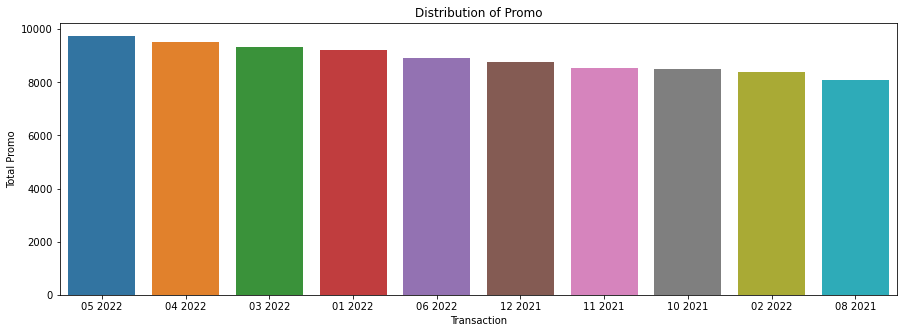

In [50]:
# visualisasi
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = promo_trans['transaction'][:10], y = promo_trans['total_promo'])
plt.title('Distribution of Promo')
plt.xlabel('Transaction')
plt.ylabel('Total Promo')
plt.show()

In [51]:
# FUNGSI UNTUK VISUALISASI
def vis_cat(cat_column, title_count, xy_label):
    fig = plt.figure(figsize=(12, 5))

    ax = fig.add_subplot(121)
    sns.countplot(x = trans[cat_column], palette = 'Spectral', ax=ax)
    ax.set_title(title_count)
    plt.xlabel(xy_label)
    plt.ylabel("Count")
    
    ax = fig.add_axes([0,0,1.5,1])
    trans[cat_column].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, figsize=(12, 5))
    plt.ylabel(xy_label)

    plt.savefig('fig.png', bbox_inches='tight')

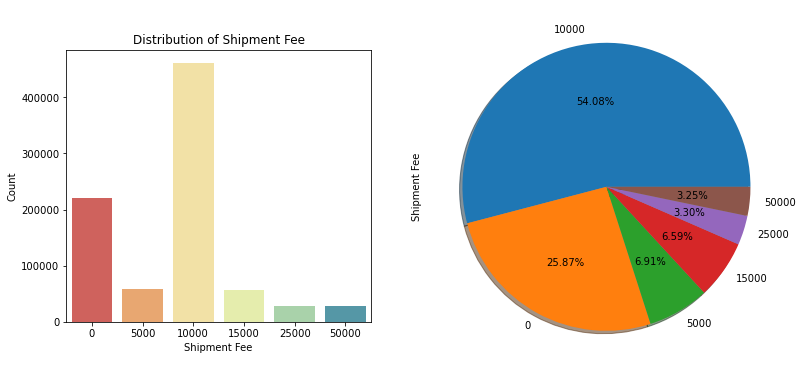

In [52]:
# persebaran data berdasarkan shipment_fee
col = 'shipment_fee'
title_c = 'Distribution of Shipment Fee'
label = 'Shipment Fee'

vis_cat(col, title_c, label)

In [53]:
# promo Code
trans['promo_code'].value_counts()

AZ2022           89227
BUYMORE          66835
WEEKENDSERU      61941
XX2022           44744
LIBURDONG        20965
WEEKENDMANTAP    20448
SC2022           11271
STARTUP          11105
Name: promo_code, dtype: int64

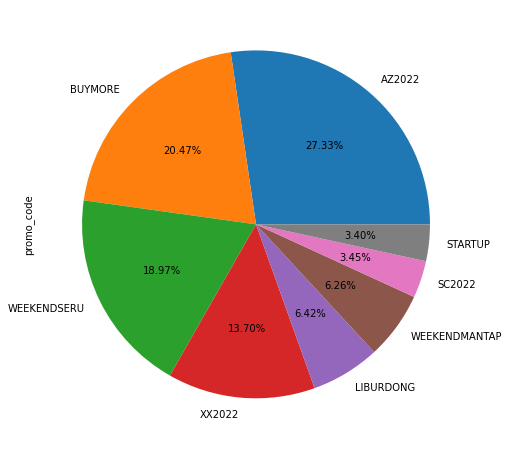

In [54]:
# pesebaran data berdasarkan promo_code
trans['promo_code'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(8, 8))
plt.show()

### All Dataset

In [55]:
df

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,event_name,event_time,event_id,traffic_source
0,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",Debit Card,Success,0,None,10000,2016-07-06 16:02:10.388144+00:00,-1.066405,113.575300,256670,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,Male,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,BOOKING,2016-07-01 22:32:45.218400+00:00,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE
1,2016-07-02 20:01:04.996529+00:00,30771,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",Credit Card,Success,5272,WEEKENDSERU,5000,2016-07-06 16:00:51.370901+00:00,-7.593732,131.616450,199897,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,Female,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,BOOKING,2016-07-02 20:01:04.996529+00:00,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE
2,2016-07-03 16:25:01.401472+00:00,67563,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,"[{'product_id': 47432, 'quantity': 3, 'item_pr...",Gopay,Success,0,None,10000,2016-07-09 14:36:17.739418+00:00,-6.297146,106.847493,996610,Melinda,Hasanah,bdc7e701-230b-479a-865d-417a469f4987,bdc7e701_230b_479a_865d_417a469f4987@startupca...,Female,2008-12-10,Android,6f8d47ab-e140-492d-af7b-ae1a9b7cbcdb,Android 2.3.4,-6.297146,106.847493,Jakarta Raya,Indonesia,2016-07-03,BOOKING,2016-07-03 16:25:01.401472+00:00,3cd30105-86bd-4931-820b-af60f7d7e5cb,MOBILE
3,2016-07-04 00:58:13.525069+00:00,22844,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,"[{'product_id': 25047, 'quantity': 1, 'item_pr...",Gopay,Success,5952,AZ2022,10000,2016-07-10 01:34:45.509511+00:00,-7.435797,108.745902,215548,Queen,Haryanti,dacf34fe-e5bc-4769-8a20-c6f26d72a6d8,dacf34fe_e5bc_4769_8a20_c6f26d72a6d8@zakyfound...,Female,1993-04-30,Android,bdd51573-2110-4bc3-ab5d-1789242717f8,Android 5.0,-6.220949,106.783241,Jakarta Raya,Indonesia,2016-07-02,BOOKING,2016-07-04 00:58:13.525069+00:00,7bebf1fe-46cb-4524-96e8-1197629792a6,MOBILE
4,2016-07-04 18:10:42.766218+00:00,9914,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,"[{'product_id': 43464, 'quantity': 1, 'item_pr...",Credit Card,Success,6060,AZ2022,15000,2016-07-06 18:28:35.039732+00:00,-2.320134,121.083536,336925,Baktianto,Iswahyudi,cbf3e32b-42ff-4d0c-a3a3-e6e0a1e8aab3,cbf3e32b_42ff_4d0c_a3a3_e6e0a1e8aab3@zakyfound...,Male,1996-01-30,iOS,6ee598b2-72f1-457b-b2b5-30efd2e965ba,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,2.274928,99.001182,Sumatera Utara,Indonesia,2016-07-04,BOOKING,2016-07-04 18:10:42.766218+00:00,08490bb0-8f6c-4d52-a6e5-1a33eecf9175,MOBILE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50700,2022-07-31 23:58:06.292816+00:00,15753,61ae4966-7c48-43dd-8974-f215d0d1bc2f,2df0725f-f17d-4a71-8979-860f5e82021a,"[{'product_id': 15929, 'quantity': 1, 'item_pr...",Credit Card,Success,0,None,10000,2022-08-05 17:31:39.271143+00:00,-0.889754,101.158165,232071,Tari,Mayasari,4c317721-42b0-45cd-adcc-f04a658bd13e,4c317721_42b0_45cd_adcc_f04a658bd13e@startupca...,Female,1987-01-31,Android,af793530-a381-4eff-b769-077a70e67830,Android 2.3.6,-7.260760,108.358169,Jawa Barat,Indonesia,2022-07-31,ITEM_DE

In [56]:
df = df.drop(['payment_method', 'promo_amount', 'shipment_fee', 'promo_code', 'payment_status'], axis=1)

In [57]:
df.reset_index(drop = True, inplace = True)

In [58]:
# menggabungkan tabel df dan trans_1Month
df_new = df.merge(trans_1Month, how='left', on='customer_id')

In [59]:
# menggabungkan tabel df dan total_trans
df_new = df_new.merge(total_trans, how='left', on='customer_id')

In [60]:
# menggabungkan tabel df_new dan total_promo
df_new = df_new.merge(total_promo_amount, how='inner', on='customer_id')

In [61]:
# menggabungkan tabel df_new dan total_shipment_fee
df_new = df_new.merge(total_shipment_fee, how='inner', on='customer_id')

In [62]:
# menggabungkan tabel df_new dan count_promo
df_new = df_new.merge(count_promo, how='inner', on='customer_id')

In [63]:
# menggabungkan tabel df_new dan total_payment_success
df_new = df_new.merge(total_payment_success, how='left', on='customer_id')

In [64]:
# menggabungkan tabel df_new dan total_payment_success
df_new = df_new.merge(total_payment_failed, how='left', on='customer_id')

In [65]:
# menggabungkan tabel df dan payment_method
df_new = df_new.merge(payment_method_new, how='inner', on='customer_id')

In [66]:
# create new columns for delivery time
df_new['delivery_time'] = df_new['shipment_date_limit'] - df_new['created_at']
df_new['delivery_time'] = df_new['delivery_time'].dt.days
df_new[['delivery_time']]

,delivery_time
0,4
1,3
2,5
3,6
4,2
...,...
50699,4
50700,4
50701,3
50702,4


In [67]:
df_new

,created_at,customer_id,booking_id,session_id,product_metadata,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,event_name,event_time,event_id,traffic_source,trans_1Month,number_of_transaction,total_promo_amount,total_shipment_fee,count_promo,total_payment_success,total_payment_failed,payment_method,delivery_time
0,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",2016-07-06 16:02:10.388144+00:00,-1.066405,113.575300,256670,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,Male,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,BOOKING,2016-07-01 22:32:45.218400+00:00,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,NaN,1.0,0,10000.0,0,1.0,NaN,Debit Card,4
1,2016-07-02 20:01:04.996529+00:00,30771,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",2016-07-06 16:00:51.370901+00:00,-7.593732,131.616450,199897,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,Female,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,BOOKING,2016-07-02 20:01:04.996529+00:00,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE,NaN,1.0,5272,5000.0,1,1.0,NaN,Credit Card,3
2,2016-07-03 16:25:01.401472+00:00,67563,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,"[{'product_id': 47432, 'quantity': 3, 'item_pr...",2016-07-09 14:36:17.739418+00:00,-6.297146,106.847493,996610,Melinda,Hasanah,bdc7e701-230b-479a-865d-417a469f4987,bdc7e701_230b_479a_865d_417a469f4987@startupca...,Female,2008-12-10,Android,6f8d47ab-e140-492d-af7b-ae1a9b7cbcdb,Android 2.3.4,-6.297146,106.847493,Jakarta Raya,Indonesia,2016-07-03,BOOKING,2016-07-03 16:25:01.401472+00:00,3cd30105-86bd-4931-820b-af60f7d7e5cb,MOBILE,NaN,1.0,0,10000.0,0,1.0,NaN,Gopay,5
3,2016-07-04 00:58:13.525069+00:00,22844,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,"[{'product_id': 25047, 'quantity': 1, 'item_pr...",2016-07-10 01:34:45.509511+00:00,-7.435797,108.745902,215548,Queen,Haryanti,dacf34fe-e5bc-4769-8a20-c6f26d72a6d8,dacf34fe_e5bc_4769_8a20_c6f26d72a6d8@zakyfound...,Female,1993-04-30,Android,bdd51573-2110-4bc3-ab5d-1789242717f8,Android 5.0,-6.220949,106.783241,Jakarta Raya,Indonesia,2016-07-02,BOOKING,2016-07-04 00:58:13.525069+00:00,7bebf1fe-46cb-4524-96e8-1197629792a6,MOBILE,NaN,1.0,5952,10000.0,1,1.0,NaN,Gopay,6
4,2016-07-04 18:10:42.766218+00:00,9914,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,"[{'product_id': 43464, 'quantity': 1, 'item_pr...",2016-07-06 18:28:35.039732+00:00,-2.320134,121.083536,336925,Baktianto,Iswahyudi,cbf3e32b-42ff-4d0c-a3a3-e6e0a1e8aab3,cbf3e32b_42ff_4d0c_a3a3_e6e0a1e8aab3@zakyfound...,Male,1996-01-30,iOS,6ee598b2-72f1-457b-b2b5-30efd2e965ba,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,2.274928,99.001182,Sumatera Utara,Indonesia,2016-07-04,BOOKING,2016-07-04 18:10:42.766218+00:00,08490bb0-8f6c-4d52-a6e5-1a33eecf9175,MOBILE,NaN,1.0,6060,15000.0,1,1.0,NaN,Credit Card,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,2022-07-31 23:58:06.292816+00:00,15753,61ae4966-7c48-43dd-8974-f215d0d1bc2f,2df0725f-f17d-4a71-8979-860f5e82021a,"[{'product_id': 15929, 'quantity': 1, 'item_pr...",2022-08-05 17:31:39.271143+00:00,-0.889754,101.158165,232071,Tari,Mayasari,4c317721-42b0-45cd-adcc-f04a658bd13e,4c317721_42b0_45cd_adcc_f04a658bd13e@startupca...,Female,1987-01-31,Android,af79

In [68]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              50704 non-null  datetime64[ns, UTC]
 1   customer_id             50704 non-null  object             
 2   booking_id              50704 non-null  object             
 3   session_id              50704 non-null  object             
 4   product_metadata        50704 non-null  object             
 5   shipment_date_limit     50704 non-null  datetime64[ns, UTC]
 6   shipment_location_lat   50704 non-null  float64            
 7   shipment_location_long  50704 non-null  float64            
 8   total_amount            50704 non-null  int64              
 9   first_name              50704 non-null  object             
 10  last_name               50704 non-null  object             
 11  username                50704 non-null  o

In [69]:
df_new['total_payment_success'].fillna(0, inplace=True)
df_new['total_payment_failed'].fillna(0, inplace=True)
df_new['trans_1Month'].fillna(0, inplace=True)
df_new['number_of_transaction'].fillna(0, inplace=True)

In [70]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              50704 non-null  datetime64[ns, UTC]
 1   customer_id             50704 non-null  object             
 2   booking_id              50704 non-null  object             
 3   session_id              50704 non-null  object             
 4   product_metadata        50704 non-null  object             
 5   shipment_date_limit     50704 non-null  datetime64[ns, UTC]
 6   shipment_location_lat   50704 non-null  float64            
 7   shipment_location_long  50704 non-null  float64            
 8   total_amount            50704 non-null  int64              
 9   first_name              50704 non-null  object             
 10  last_name               50704 non-null  object             
 11  username                50704 non-null  o

In [71]:
# FUNGSI UNTUK VISUALISASI
def vis_cat(cat_column, title_count, xy_label):
    fig = plt.figure(figsize=(12, 5))

    ax = fig.add_subplot(121)
    sns.countplot(x = df_new[cat_column], palette = 'Spectral', ax=ax)
    ax.set_title(title_count)
    plt.xlabel(xy_label)
    plt.ylabel("Count")
    
    ax = fig.add_axes([0,0,1.5,1])
    df_new[cat_column].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, figsize=(12, 5))
    plt.ylabel(xy_label)

    plt.savefig('fig.png', bbox_inches='tight')

In [72]:
# gender
data_gender = df_new.groupby('gender').agg(count_of_gender=('gender','count'))
data_gender

,count_of_gender
gender,
Female,32547
Male,18157


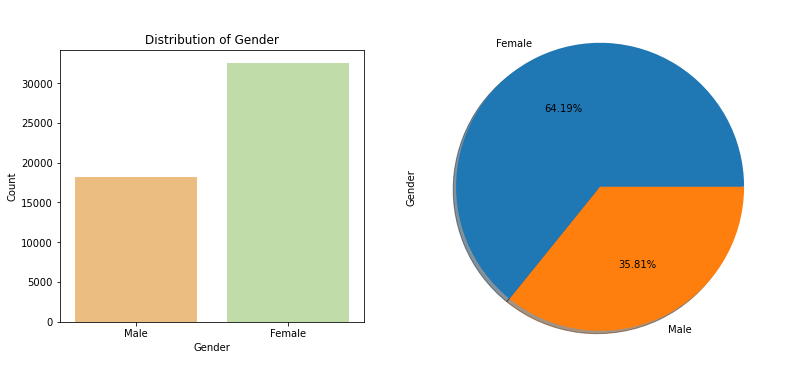

In [73]:
# persebaran data berdasarkan gender
col = 'gender'
title_c = 'Distribution of Gender'
label = 'Gender'

vis_cat(col, title_c, label)

In [74]:
# device type
data_device_type = df_new.groupby('device_type').agg(count_of_device_type=('device_type','count'))
data_device_type

,count_of_device_type
device_type,
Android,38932
iOS,11772


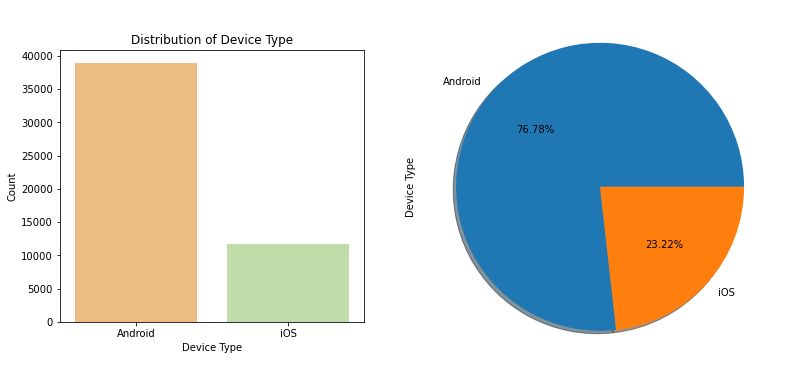

In [75]:
# persebaran data berdasarkan device_type
col = 'device_type'
title_c = 'Distribution of Device Type'
label = 'Device Type'

vis_cat(col, title_c, label)

In [76]:
# home location
data_home_location = df_new.groupby('home_location').agg(count_of_home_location=('home_location','count'))
data_home_location

,count_of_home_location
home_location,
Aceh,141
Bali,751
Bangka Belitung,132
Banten,180
Bengkulu,341
Gorontalo,183
Jakarta Raya,9389
Jambi,198
Jawa Barat,5781


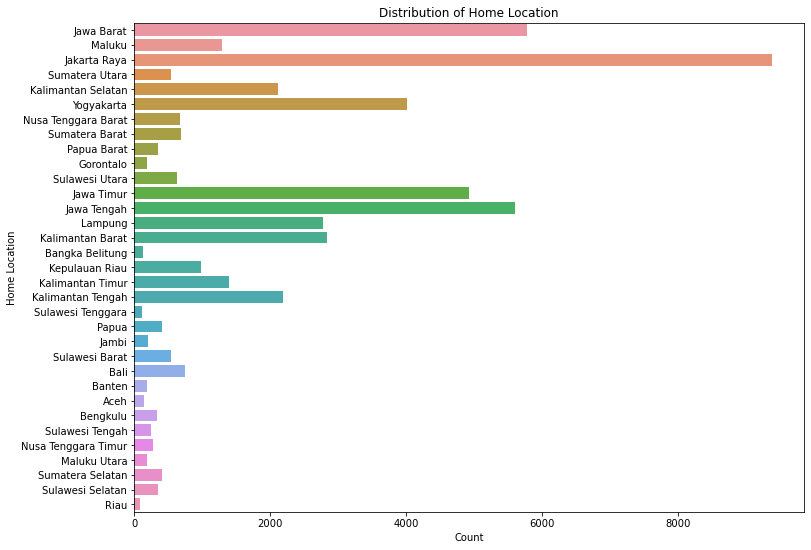

In [77]:
# persebaran data berdasarkan home_location
fig = plt.figure(figsize=(12,9))
ax = sns.countplot(y=df_new['home_location'])
plt.title("Distribution of Home Location")
plt.xlabel("Count")
plt.ylabel("Home Location")
plt.show()

In [78]:
# membuat grouping untuk menghitung total customer_id berdasarkan home_location
cust_loc = df_new.groupby('home_location')['customer_id'].count().reset_index()
cust_loc = cust_loc.rename(columns = {'customer_id' : 'total_customer'}).sort_values(by = 'total_customer', ascending = False)

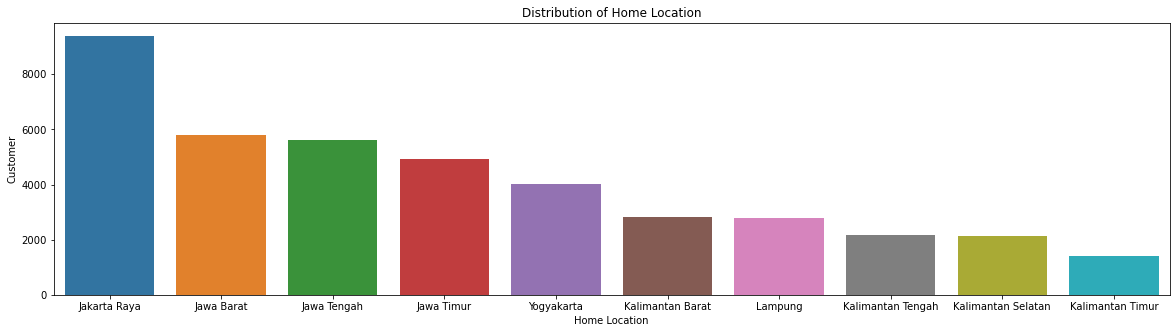

In [79]:
# visualisasi
plt.figure(figsize = (20, 5))
ax = sns.barplot(x = cust_loc['home_location'][:10], y = cust_loc['total_customer'])
plt.title('Distribution of Home Location')
plt.xlabel('Home Location')
plt.ylabel('Customer')
plt.show()

In [80]:
# membuat grouping untuk menghitung total_payment_success berdasarkan home_location
cust_trans = df_new.groupby('home_location')['number_of_transaction'].sum().reset_index()
cust_trans = cust_trans.rename(columns = {'number_of_transaction' : 'number_of_transaction'}).sort_values(by = 'number_of_transaction', ascending = False)

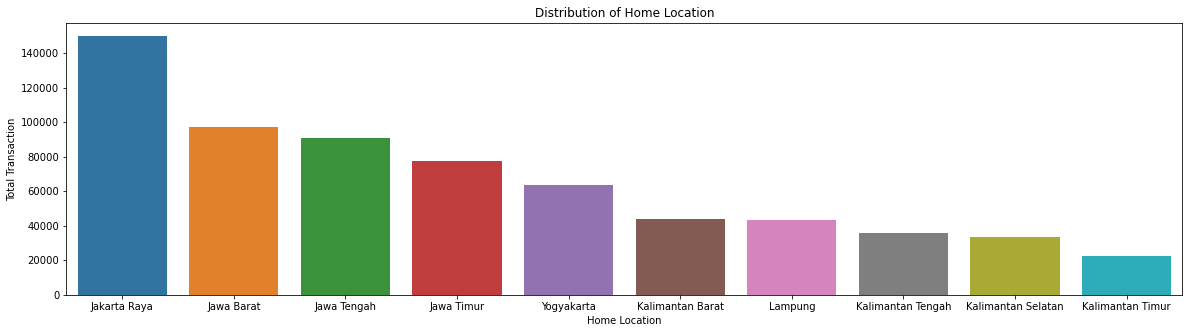

In [81]:
# visualisasi
plt.figure(figsize = (20, 5))
ax = sns.barplot(x = cust_trans['home_location'][:10], y = cust_trans['number_of_transaction'])
plt.title('Distribution of Home Location')
plt.xlabel('Home Location')
plt.ylabel('Total Transaction')  
plt.show()

In [82]:
data_home_location.idxmax()

count_of_home_location    Jakarta Raya
dtype: object

In [83]:
data_home_location.idxmin()

count_of_home_location    Riau
dtype: object

In [84]:
# customer Age
df_new['age'] = df_new['first_join_date'] - df_new['birthdate']
df_new['customer_age'] = df_new['age'] / pd.Timedelta(days=360)

In [85]:
df_new['customer_age'] = round(df_new['customer_age'], 0)

In [86]:
# melihat nilai statistik deskriptif dari customer_age
df_new[['customer_age']].describe()

,customer_age
count,50704.000000
mean,24.262287
std,7.570879
min,2.000000
25%,19.000000
50%,24.000000
75%,29.000000
max,68.000000


In [87]:
# modus
statistics.mode(df_new['customer_age'])

23.0

In [88]:
# fungsi menghitung age_range
def age_range(x):
    if 2 <= x < 6:
        return '2-5'
    elif 6 <= x < 13:
        return '6-12'
    elif 13 <= x < 18:
        return '13-17'
    elif 18 <= x < 30:
        return '18-30'
    elif 30 <= x < 61:
        return '30-60'
    else:
        return '>61'
    
df_new['age_range'] = df_new.customer_age.apply(lambda x: age_range(x))

In [89]:
# age range
age_range = df_new.groupby('age_range').agg(count_of_age_range=('age_range','count'))
age_range

,count_of_age_range
age_range,
13-17,7332
18-30,29513
2-5,31
30-60,11674
6-12,2148
>61,6


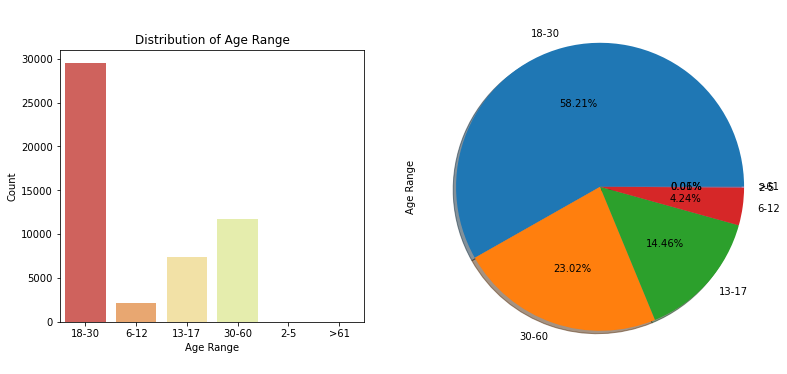

In [90]:
# persebaran data berdasarkan age_range
col = 'age_range'
title_c = 'Distribution of Age Range'
label = 'Age Range'

vis_cat(col, title_c, label)

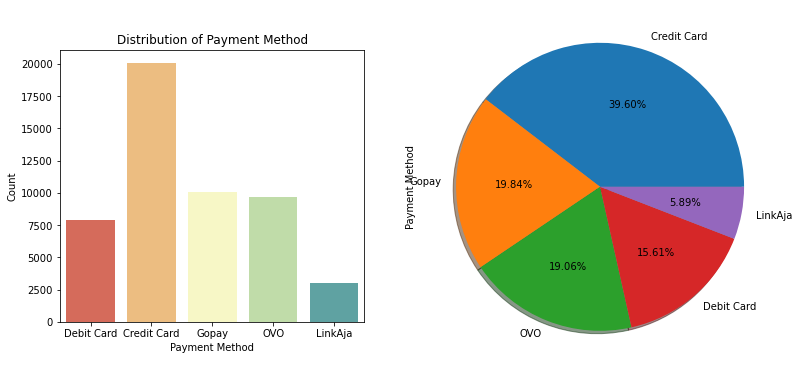

In [91]:
# persebaran data berdasarkan payment_method
col = 'payment_method'
title_c = 'Distribution of Payment Method'
label = 'Payment Method'

vis_cat(col, title_c, label)

In [92]:
# FUNGSI UNTUK VISUALISASI
def vis_cat2(cat_column, title_count, xy_label):
    fig = plt.figure(figsize=(12, 5))

    ax = fig.add_subplot(121)
    sns.countplot(x = trans[cat_column], palette = 'Spectral', ax=ax)
    ax.set_title(title_count)
    plt.xlabel(xy_label)
    plt.ylabel("Count")
    
    ax = fig.add_axes([0,0,1.5,1])
    trans[cat_column].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, figsize=(12, 5))
    plt.ylabel(xy_label)

    plt.savefig('fig.png', bbox_inches='tight')

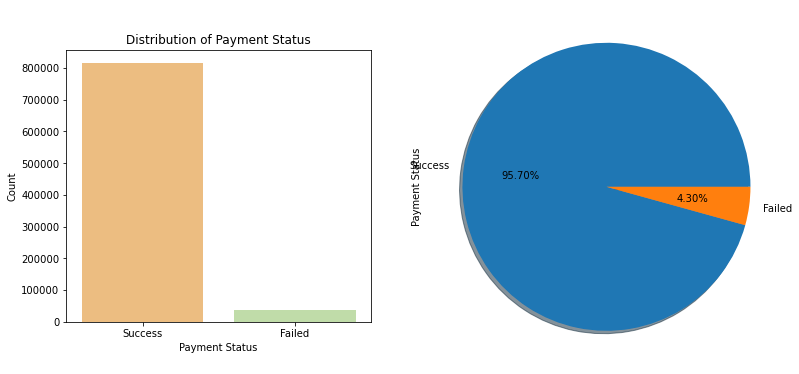

In [93]:
# persebaran data berdasarkan payment_status
col = 'payment_status'
title_c = 'Distribution of Payment Status'
label = 'Payment Status'

vis_cat2(col, title_c, label)

In [94]:
df_new['transaction'] = df_new['created_at'].apply(lambda x: x.strftime('%m %Y'))

In [95]:
# membuat grouping untuk menghitung total number_of_transaction berdasarkan transaction
cust_last_trans = df_new.groupby('transaction')['number_of_transaction'].sum().reset_index()
cust_last_trans = cust_last_trans.rename(columns = {'number_of_transaction' : 'total_transaction'}).sort_values(by = 'total_transaction', ascending = False)

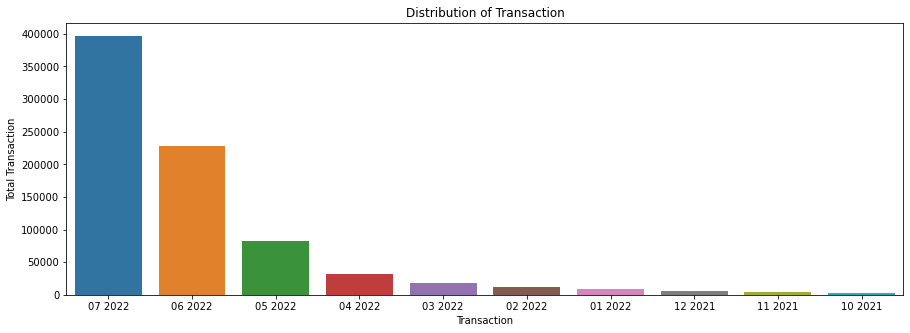

In [96]:
# visualisasi
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = cust_last_trans['transaction'][:10], y = cust_last_trans['total_transaction'])
plt.title('Distribution of Transaction')
plt.xlabel('Transaction')
plt.ylabel('Total Transaction')
plt.show()

In [97]:
df_new.head()

,created_at,customer_id,booking_id,session_id,product_metadata,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,event_name,event_time,event_id,traffic_source,trans_1Month,number_of_transaction,total_promo_amount,total_shipment_fee,count_promo,total_payment_success,total_payment_failed,payment_method,delivery_time,age,customer_age,age_range,transaction
0,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",2016-07-06 16:02:10.388144+00:00,-1.066405,113.575300,256670,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,Male,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,BOOKING,2016-07-01 22:32:45.218400+00:00,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Debit Card,4,9262 days,26.0,18-30,07 2016
1,2016-07-02 20:01:04.996529+00:00,30771,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",2016-07-06 16:00:51.370901+00:00,-7.593732,131.616450,199897,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,Female,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,BOOKING,2016-07-02 20:01:04.996529+00:00,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE,0.0,1.0,5272,5000.0,1,1.0,0.0,Credit Card,3,4080 days,11.0,6-12,07 2016
2,2016-07-03 16:25:01.401472+00:00,67563,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,"[{'product_id': 47432, 'quantity': 3, 'item_pr...",2016-07-09 14:36:17.739418+00:00,-6.297146,106.847493,996610,Melinda,Hasanah,bdc7e701-230b-479a-865d-417a469f4987,bdc7e701_230b_479a_865d_417a469f4987@startupca...,Female,2008-12-10,Android,6f8d47ab-e140-492d-af7b-ae1a9b7cbcdb,Android 2.3.4,-6.297146,106.847493,Jakarta Raya,Indonesia,2016-07-03,BOOKING,2016-07-03 16:25:01.401472+00:00,3cd30105-86bd-4931-820b-af60f7d7e5cb,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Gopay,5,2762 days,8.0,6-12,07 2016
3,2016-07-04 00:58:13.525069+00:00,22844,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,"[{'product_id': 25047, 'quantity': 1, 'item_pr...",2016-07-10 01:34:45.509511+00:00,-7.435797,108.745902,215548,Queen,Haryanti,dacf34fe-e5bc-4769-8a20-c6f26d72a6d8,dacf34fe_e5bc_4769_8a20_c6f26d72a6d8@zakyfound...,Female,1993-04-30,Android,bdd51573-2110-4bc3-ab5d-1789242717f8,Android 5.0,-6.220949,106.783241,Jakarta Raya,Indonesia,2016-07-02,BOOKING,2016-07-04 00:58:13.525069+00:00,7bebf1fe-46cb-4524-96e8-1197629792a6,MOBILE,0.0,1.0,5952,10000.0,1,1.0,0.0,Gopay,6,8464 days,24.0,18-30,07 2016
4,2016-07-04 18:10:42.766218+00:00,9914,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,"[{'product_id': 43464, 'quantity': 1, 'item_pr...",2016-07-06 18:28:35.039732+00:00,-2.320134,121.083536,336925,Baktianto,Iswahyudi,cbf3e32b-42ff-4d0c-a3a3-e6e0a1e8aab3,cbf3e32b_42ff_4d0c_a3a3_e6e0a1e8aab3@zakyfound...,Male,1996-01-30,iOS,6ee598b2-72f1-457b-b2b5-30efd2e965ba,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,2.274928,99.001182,Sumatera Utara,Indonesia,2016-07-04,BOOKING,2016-07-04 18:10:42.766218+00:00,08490bb0-8f6c-4d52-a6e5-1a33eecf9175,MOBILE,0.0,1.0,6060,15000.0,1,1.0,0.0,Credit Card,2,7461 days,21.0,18-30,07 2016


In [98]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              50704 non-null  datetime64[ns, UTC]
 1   customer_id             50704 non-null  object             
 2   booking_id              50704 non-null  object             
 3   session_id              50704 non-null  object             
 4   product_metadata        50704 non-null  object             
 5   shipment_date_limit     50704 non-null  datetime64[ns, UTC]
 6   shipment_location_lat   50704 non-null  float64            
 7   shipment_location_long  50704 non-null  float64            
 8   total_amount            50704 non-null  int64              
 9   first_name              50704 non-null  object             
 10  last_name               50704 non-null  object             
 11  username                50704 non-null  o

### Product Dataset

In [99]:
# FUNGSI UNTUK VISUALISASI
def vis_cat1(cat_column, title_count, xy_label):
    fig = plt.figure(figsize=(15, 5))

    ax = fig.add_subplot(121)
    sns.countplot(x = product[cat_column], palette = 'Spectral', ax=ax)
    ax.set_title(title_count)
    plt.xlabel(xy_label)
    plt.ylabel("Count")

In [100]:
product.head()

,id,user,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1,23124,Unisex,Footwear,Flip Flops,Flip Flops,Navy Blue,Spring,2013,Casual,Converse Unisex Navy Blue Live; Laugh; Love Fl...
2,23127,Unisex,Footwear,Flip Flops,Flip Flops,Green,Summer,2012,Casual,Converse Unisex Green Live; Life; Laugh Flip ...
3,3428,Male,Apparel,Topwear,Tshirts,Black,Summer,2011,Casual,Myntra Mens Be Reasonable; Do It My Way T-shirt
4,59768,Female,Accessories,Jewellery,Earrings,Gold,Winter,2016,Casual,Estelle Women Gold; Silver and Copper Toned E...
5,3413,Male,Apparel,Topwear,Tshirts,White,Summer,2011,Casual,Myntra Men's Yes; its all about me White T-shirt


In [101]:
# count of user
df_count = product.groupby('user').agg(count_of_user=('user','count'))
df_count

,count_of_user
user,
Female,19287
Male,22995
Unisex,2164


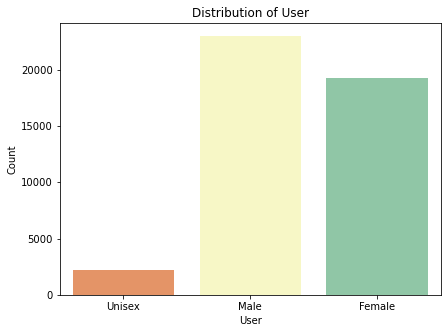

In [102]:
# pesebaran data berdasarkan user
col = 'user'
title_c = 'Distribution of User'
label = 'User'

vis_cat1(col, title_c, label)

In [103]:
# master Category
df_count = product.groupby('masterCategory').agg(count_of_masterCategory=('masterCategory','count'))
df_count

,count_of_masterCategory
masterCategory,
Accessories,11289
Apparel,21400
Footwear,9222
Free Items,105
Home,1
Personal Care,2404
Sporting Goods,25


Text(0, 0.5, 'Master Category')

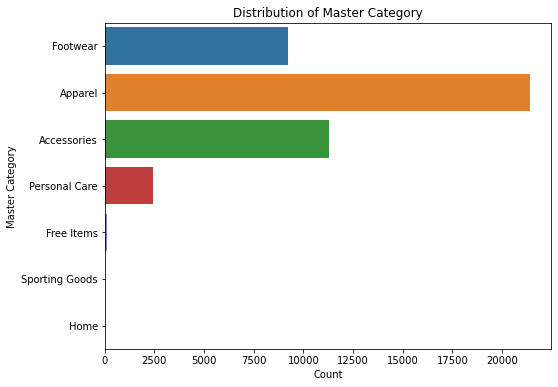

In [104]:
# pesebaran data berdasarkan masterCategory

fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(y=product['masterCategory'])

plt.title("Distribution of Master Category")
plt.xlabel("Count")
plt.ylabel("Master Category")

In [105]:
# sub Category
df_count = product.groupby('subCategory').agg(count_of_subCategory=('subCategory','count'))
df_count

,count_of_subCategory
subCategory,
Accessories,143
Apparel Set,106
Bags,3055
Bath and Body,12
Beauty Accessories,4
Belts,811
Bottomwear,2694
Cufflinks,108
Dress,478


In [106]:
# membersihkan data duplikat pada kolom subCategory 
product['subCategory'] = product['subCategory'].replace({'Sandal': 'Flip Flops', 'Skin': 'Skin Care', 'Perfumes': 'Fragrance'})
product['subCategory'].unique()

array(['Flip Flops', 'Topwear', 'Jewellery', 'Accessories', 'Shoes',
       'Fragrance', 'Bottomwear', 'Watches', 'Socks', 'Belts', 'Bags',
       'Innerwear', 'Shoe Accessories', 'Lips', 'Saree', 'Eyewear',
       'Nails', 'Scarves', 'Dress', 'Loungewear and Nightwear', 'Wallets',
       'Apparel Set', 'Headwear', 'Mufflers', 'Skin Care', 'Makeup',
       'Free Gifts', 'Ties', 'Beauty Accessories', 'Water Bottle', 'Eyes',
       'Bath and Body', 'Gloves', 'Sports Accessories', 'Cufflinks',
       'Sports Equipment', 'Stoles', 'Hair', 'Home Furnishing',
       'Umbrellas', 'Wristbands', 'Vouchers'], dtype=object)

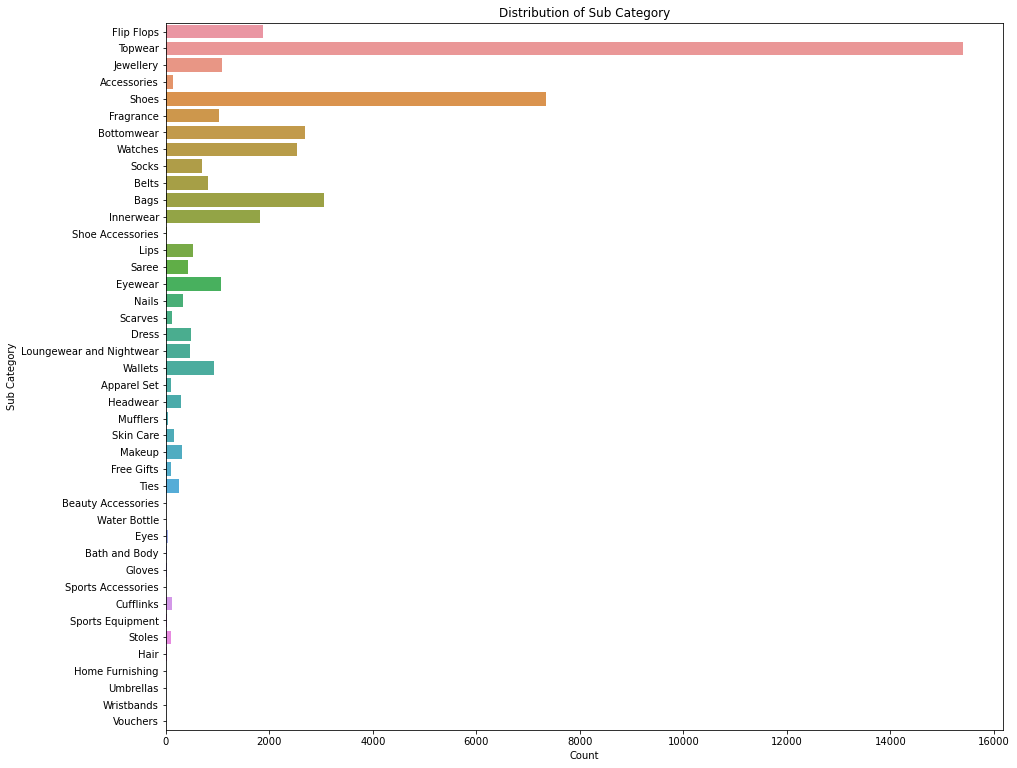

In [107]:
# pesebaran data berdasarkan subCategory 
fig = plt.figure(figsize=(15, 13))
ax = sns.countplot(y=product['subCategory'])

plt.title("Distribution of Sub Category")
plt.xlabel("Count")
plt.ylabel("Sub Category")
plt.show()

In [108]:
# year
df_count = product.groupby('year').agg(count_of_year=('year','count'))
df_count

,count_of_year
year,
2007,2
2008,7
2009,20
2010,846
2011,13689
2012,16291
2013,1213
2014,236
2015,2780


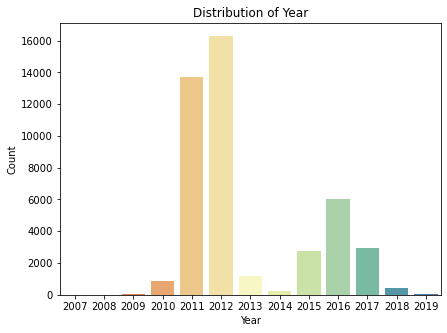

In [109]:
# Persebaran data berdasarkan year
col = 'year'
title_c = 'Distribution of Year'
label = 'Year'

vis_cat1(col, title_c, label)

In [110]:
# season
df_count = product.groupby('season').agg(count_of_season=('season','count'))
df_count

,count_of_season
season,
Fall,11445
Spring,2985
Summer,21497
Winter,8519


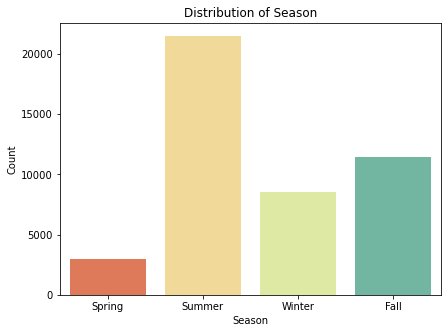

In [111]:
# pesebaran data berdasarkan season
col = 'season'
title_c = 'Distribution of Season'
label = 'Season'

vis_cat1(col, title_c, label)

In [112]:
# usage
df_count = product.groupby('usage').agg(count_of_usage=('usage','count'))
df_count

,count_of_usage
usage,
Casual,34731
Ethnic,3208
Formal,2359
Home,1
Party,29
Smart Casual,67
Sports,4025
Travel,26


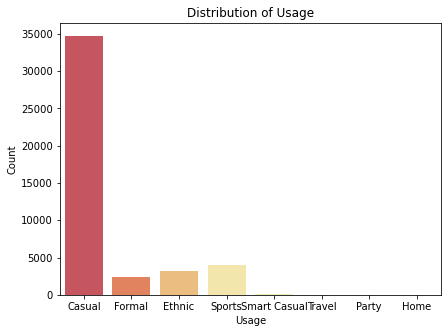

In [113]:
# pesebaran data berdasarkan usage
col = 'usage'
title_c = 'Distribution of Usage'
label = 'Usage'

vis_cat1(col, title_c, label)

### Insight

###### Active Customer
1. Jenis kelamin customer paling banyak adalah **perempuan** yaitu sekitar 64.19%
2. Device yang digunakan customer yaitu Android dan iOS, dimana **Android paling banyak** digunakan yaitu sekitar 76.78%
3. Asal customer paling banyak dari **Jakarta Raya** dan paling sedikit dari **Riau**
4. Umur customer saat menjadi user dari umur 2 sampai 68 tahun, customer paling banyak adalah umur **18-30 tahun** sekitar 58.21%
5. Metode pembayaran yang banyak dilakukan menggunakan **Credit Card** sekitar 39.60%
6. Ternyata **95.66% success** didalam status pembayaran dan **4.34% failed**
7. Jumlah transaksi paling banyak pada bulan **Juli 2022 (Kasus Covid Omicron tinggi)** 

#### Transaction Dataset
1. Kode promo yang paling banyak digunakan adalah **AZ2022**
2. Jumlah customer yang paling banyak menerima biaya pengiriman **Rp10.000** dan jumlah customer yang paling sedikit menerima biaya pengiriman **Rp50.000**
3. Jumlah promo yang paling banyak pada bulan **May 2022 (Lebaran Idul Fitri)**

#### Product Dataset
1. Jenis produk yang dijual banyak untuk **Male**
2. Kategori utama produk yang dijual paling banyak adalah pakaian **(Apparel)**
3. Pakaian atasan **(Topwear)** merupakan produk yang paling banyak di jual
4. Ternyata produk yang dijual paling banyak keluaran tahun **2012**
5. Produk yang dijual banyak digunakan pada musim panas **(Summer)**
6. Penggunaan produk yang dijual paling banyak untuk kegiatan yang santai **(Casual)**

## Exploratory Data Analysis & Feature Engineering Churn Customer

In [114]:
df_new

,created_at,customer_id,booking_id,session_id,product_metadata,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,event_name,event_time,event_id,traffic_source,trans_1Month,number_of_transaction,total_promo_amount,total_shipment_fee,count_promo,total_payment_success,total_payment_failed,payment_method,delivery_time,age,customer_age,age_range,transaction
0,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",2016-07-06 16:02:10.388144+00:00,-1.066405,113.575300,256670,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,Male,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,BOOKING,2016-07-01 22:32:45.218400+00:00,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Debit Card,4,9262 days,26.0,18-30,07 2016
1,2016-07-02 20:01:04.996529+00:00,30771,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",2016-07-06 16:00:51.370901+00:00,-7.593732,131.616450,199897,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,Female,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,BOOKING,2016-07-02 20:01:04.996529+00:00,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE,0.0,1.0,5272,5000.0,1,1.0,0.0,Credit Card,3,4080 days,11.0,6-12,07 2016
2,2016-07-03 16:25:01.401472+00:00,67563,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,"[{'product_id': 47432, 'quantity': 3, 'item_pr...",2016-07-09 14:36:17.739418+00:00,-6.297146,106.847493,996610,Melinda,Hasanah,bdc7e701-230b-479a-865d-417a469f4987,bdc7e701_230b_479a_865d_417a469f4987@startupca...,Female,2008-12-10,Android,6f8d47ab-e140-492d-af7b-ae1a9b7cbcdb,Android 2.3.4,-6.297146,106.847493,Jakarta Raya,Indonesia,2016-07-03,BOOKING,2016-07-03 16:25:01.401472+00:00,3cd30105-86bd-4931-820b-af60f7d7e5cb,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Gopay,5,2762 days,8.0,6-12,07 2016
3,2016-07-04 00:58:13.525069+00:00,22844,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,"[{'product_id': 25047, 'quantity': 1, 'item_pr...",2016-07-10 01:34:45.509511+00:00,-7.435797,108.745902,215548,Queen,Haryanti,dacf34fe-e5bc-4769-8a20-c6f26d72a6d8,dacf34fe_e5bc_4769_8a20_c6f26d72a6d8@zakyfound...,Female,1993-04-30,Android,bdd51573-2110-4bc3-ab5d-1789242717f8,Android 5.0,-6.220949,106.783241,Jakarta Raya,Indonesia,2016-07-02,BOOKING,2016-07-04 00:58:13.525069+00:00,7bebf1fe-46cb-4524-96e8-1197629792a6,MOBILE,0.0,1.0,5952,10000.0,1,1.0,0.0,Gopay,6,8464 days,24.0,18-30,07 2016
4,2016-07-04 18:10:42.766218+00:00,9914,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,"[{'product_id': 43464, 'quantity': 1, 'item_pr...",2016-07-06 18:28:35.039732+00:00,-2.320134,121.083536,336925,Baktianto,Iswahyudi,cbf3e32b-42ff-4d0c-a3a3-e6e0a1e8aab3,cbf3e32b_42ff_4d0c_a3a3_e6e0a1e8aab3@zakyfound...,Male,1996-01-30,iOS,6ee598b2-72f1-457b-b2b5-30efd2e965ba,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,2.274928,99.001182,Sumatera Utara,Indonesia,2016-07-04,BOOKING,2016-07-04 18:10:42.766218+00:00,08490bb0-8f6c-4d52-a6e5-1a33eecf9175,MOBILE,0.0,1.0,6060,15000.0,1,1.0,0.0,Credit Card,2,7461 days,21.0,18-30,07 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,2022-07-31 23:58:06.292816+00:00,15753,61ae4966-7c48-43dd-8974-f215d0d1bc2f,2df0725f-f17d-4a71-8979-860f5e82021a,"[{'product_id': 15929, 'quantity': 1, 'item_pr

In [115]:
# mengubah nama kolom created_at menjadi last_trans
df_new = df_new.rename(columns = {"created_at": "last_trans"})
df_new

,last_trans,customer_id,booking_id,session_id,product_metadata,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,event_name,event_time,event_id,traffic_source,trans_1Month,number_of_transaction,total_promo_amount,total_shipment_fee,count_promo,total_payment_success,total_payment_failed,payment_method,delivery_time,age,customer_age,age_range,transaction
0,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",2016-07-06 16:02:10.388144+00:00,-1.066405,113.575300,256670,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,Male,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,BOOKING,2016-07-01 22:32:45.218400+00:00,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Debit Card,4,9262 days,26.0,18-30,07 2016
1,2016-07-02 20:01:04.996529+00:00,30771,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",2016-07-06 16:00:51.370901+00:00,-7.593732,131.616450,199897,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,Female,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,BOOKING,2016-07-02 20:01:04.996529+00:00,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE,0.0,1.0,5272,5000.0,1,1.0,0.0,Credit Card,3,4080 days,11.0,6-12,07 2016
2,2016-07-03 16:25:01.401472+00:00,67563,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,"[{'product_id': 47432, 'quantity': 3, 'item_pr...",2016-07-09 14:36:17.739418+00:00,-6.297146,106.847493,996610,Melinda,Hasanah,bdc7e701-230b-479a-865d-417a469f4987,bdc7e701_230b_479a_865d_417a469f4987@startupca...,Female,2008-12-10,Android,6f8d47ab-e140-492d-af7b-ae1a9b7cbcdb,Android 2.3.4,-6.297146,106.847493,Jakarta Raya,Indonesia,2016-07-03,BOOKING,2016-07-03 16:25:01.401472+00:00,3cd30105-86bd-4931-820b-af60f7d7e5cb,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Gopay,5,2762 days,8.0,6-12,07 2016
3,2016-07-04 00:58:13.525069+00:00,22844,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,"[{'product_id': 25047, 'quantity': 1, 'item_pr...",2016-07-10 01:34:45.509511+00:00,-7.435797,108.745902,215548,Queen,Haryanti,dacf34fe-e5bc-4769-8a20-c6f26d72a6d8,dacf34fe_e5bc_4769_8a20_c6f26d72a6d8@zakyfound...,Female,1993-04-30,Android,bdd51573-2110-4bc3-ab5d-1789242717f8,Android 5.0,-6.220949,106.783241,Jakarta Raya,Indonesia,2016-07-02,BOOKING,2016-07-04 00:58:13.525069+00:00,7bebf1fe-46cb-4524-96e8-1197629792a6,MOBILE,0.0,1.0,5952,10000.0,1,1.0,0.0,Gopay,6,8464 days,24.0,18-30,07 2016
4,2016-07-04 18:10:42.766218+00:00,9914,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,"[{'product_id': 43464, 'quantity': 1, 'item_pr...",2016-07-06 18:28:35.039732+00:00,-2.320134,121.083536,336925,Baktianto,Iswahyudi,cbf3e32b-42ff-4d0c-a3a3-e6e0a1e8aab3,cbf3e32b_42ff_4d0c_a3a3_e6e0a1e8aab3@zakyfound...,Male,1996-01-30,iOS,6ee598b2-72f1-457b-b2b5-30efd2e965ba,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,2.274928,99.001182,Sumatera Utara,Indonesia,2016-07-04,BOOKING,2016-07-04 18:10:42.766218+00:00,08490bb0-8f6c-4d52-a6e5-1a33eecf9175,MOBILE,0.0,1.0,6060,15000.0,1,1.0,0.0,Credit Card,2,7461 days,21.0,18-30,07 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,2022-07-31 23:58:06.292816+00:00,15753,61ae4966-7c48-43dd-8974-f215d0d1bc2f,2df0725f-f17d-4a71-8979-860f5e82021a,"[{'product_id': 15929, 'quantity': 1, 'item_pr

In [116]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   last_trans              50704 non-null  datetime64[ns, UTC]
 1   customer_id             50704 non-null  object             
 2   booking_id              50704 non-null  object             
 3   session_id              50704 non-null  object             
 4   product_metadata        50704 non-null  object             
 5   shipment_date_limit     50704 non-null  datetime64[ns, UTC]
 6   shipment_location_lat   50704 non-null  float64            
 7   shipment_location_long  50704 non-null  float64            
 8   total_amount            50704 non-null  int64              
 9   first_name              50704 non-null  object             
 10  last_name               50704 non-null  object             
 11  username                50704 non-null  o

In [117]:
# Fungsi menentukan customer churn
period = '2022-07-31 23:59:45.821469+00:00'
def is_churn(x):
    try:
        date_period = pd.to_datetime(period)
        date_last_trans = pd.to_datetime(x)
        timedelta = date_period - date_last_trans
        hari = timedelta.days
        if hari > 90:
            return 'Yes'
        else:
            return 'No'
    except: 
        return True
    
df_new['is_churn'] = df_new.last_trans.apply(lambda x: is_churn(x))

In [118]:
df_new['is_churn'].unique()

array(['Yes', 'No'], dtype=object)

In [119]:
df_new

,last_trans,customer_id,booking_id,session_id,product_metadata,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,event_name,event_time,event_id,traffic_source,trans_1Month,number_of_transaction,total_promo_amount,total_shipment_fee,count_promo,total_payment_success,total_payment_failed,payment_method,delivery_time,age,customer_age,age_range,transaction,is_churn
0,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",2016-07-06 16:02:10.388144+00:00,-1.066405,113.575300,256670,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,Male,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,BOOKING,2016-07-01 22:32:45.218400+00:00,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Debit Card,4,9262 days,26.0,18-30,07 2016,Yes
1,2016-07-02 20:01:04.996529+00:00,30771,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",2016-07-06 16:00:51.370901+00:00,-7.593732,131.616450,199897,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,Female,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,BOOKING,2016-07-02 20:01:04.996529+00:00,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE,0.0,1.0,5272,5000.0,1,1.0,0.0,Credit Card,3,4080 days,11.0,6-12,07 2016,Yes
2,2016-07-03 16:25:01.401472+00:00,67563,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,"[{'product_id': 47432, 'quantity': 3, 'item_pr...",2016-07-09 14:36:17.739418+00:00,-6.297146,106.847493,996610,Melinda,Hasanah,bdc7e701-230b-479a-865d-417a469f4987,bdc7e701_230b_479a_865d_417a469f4987@startupca...,Female,2008-12-10,Android,6f8d47ab-e140-492d-af7b-ae1a9b7cbcdb,Android 2.3.4,-6.297146,106.847493,Jakarta Raya,Indonesia,2016-07-03,BOOKING,2016-07-03 16:25:01.401472+00:00,3cd30105-86bd-4931-820b-af60f7d7e5cb,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Gopay,5,2762 days,8.0,6-12,07 2016,Yes
3,2016-07-04 00:58:13.525069+00:00,22844,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,"[{'product_id': 25047, 'quantity': 1, 'item_pr...",2016-07-10 01:34:45.509511+00:00,-7.435797,108.745902,215548,Queen,Haryanti,dacf34fe-e5bc-4769-8a20-c6f26d72a6d8,dacf34fe_e5bc_4769_8a20_c6f26d72a6d8@zakyfound...,Female,1993-04-30,Android,bdd51573-2110-4bc3-ab5d-1789242717f8,Android 5.0,-6.220949,106.783241,Jakarta Raya,Indonesia,2016-07-02,BOOKING,2016-07-04 00:58:13.525069+00:00,7bebf1fe-46cb-4524-96e8-1197629792a6,MOBILE,0.0,1.0,5952,10000.0,1,1.0,0.0,Gopay,6,8464 days,24.0,18-30,07 2016,Yes
4,2016-07-04 18:10:42.766218+00:00,9914,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,"[{'product_id': 43464, 'quantity': 1, 'item_pr...",2016-07-06 18:28:35.039732+00:00,-2.320134,121.083536,336925,Baktianto,Iswahyudi,cbf3e32b-42ff-4d0c-a3a3-e6e0a1e8aab3,cbf3e32b_42ff_4d0c_a3a3_e6e0a1e8aab3@zakyfound...,Male,1996-01-30,iOS,6ee598b2-72f1-457b-b2b5-30efd2e965ba,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,2.274928,99.001182,Sumatera Utara,Indonesia,2016-07-04,BOOKING,2016-07-04 18:10:42.766218+00:00,08490bb0-8f6c-4d52-a6e5-1a33eecf9175,MOBILE,0.0,1.0,6060,15000.0,1,1.0,0.0,Credit Card,2,7461 days,21.0,18-30,07 2016,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,2022-07-31 23:58:06.292816+00:00,15753,61ae4966-7c48-43dd-8974-f215d0d1bc2f,2df0725f-f17d-4a71-8979-860f5e82021a,"[{'product_id

In [120]:
# Is Churn
df_count = df_new.groupby('is_churn').agg(count_of_churn=('is_churn','count'))
df_count

,count_of_churn
is_churn,
No,23073
Yes,27631


In [121]:
# FUNGSI UNTUK VISUALISASI
def vis_cat2(cat_column, title_count, xy_label):
    fig = plt.figure(figsize=(12, 5))

    ax = fig.add_subplot(121)
    sns.countplot(x = df_new[cat_column], palette = 'Spectral', ax=ax)
    ax.set_title(title_count)
    plt.xlabel(xy_label)
    plt.ylabel("Count")
    
    explode = (0, 0.1)
    ax = fig.add_axes([0,0,1.5,1])
    df_new[cat_column].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, figsize=(12, 5))
    plt.ylabel(xy_label)

    plt.savefig('fig.png', bbox_inches='tight')  

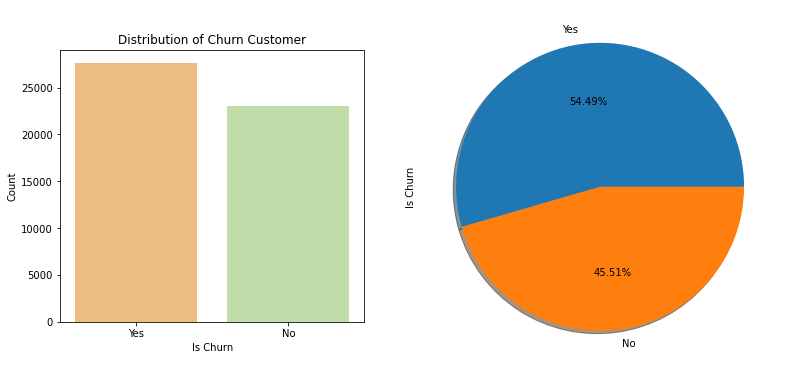

In [122]:
# pesebaran data berdasarkan is_churn
col = 'is_churn'
title_c = 'Distribution of Churn Customer'
label = 'Is Churn'

vis_cat2(col, title_c, label)

In [123]:
# Fungsi menampilkan tabel berdasarkan nama kolom
def table(col_name):
    x = df_new.groupby(['is_churn', col_name])['customer_id'].nunique().reset_index(name='Customer')
    x1 = df_new.groupby([col_name])['customer_id'].nunique().reset_index(name='AllCustomer')
    x = x.merge(x1, on=col_name)
    x['Percentage'] = round(x['Customer']*100/x['AllCustomer'],2)
    return x

In [124]:
col_name = 'gender'

table(col_name)

,is_churn,gender,Customer,AllCustomer,Percentage
0,No,Female,14832,32547,45.57
1,Yes,Female,17715,32547,54.43
2,No,Male,8241,18157,45.39
3,Yes,Male,9916,18157,54.61


In [125]:
col_name = 'device_type'

table(col_name)

,is_churn,device_type,Customer,AllCustomer,Percentage
0,No,Android,17738,38932,45.56
1,Yes,Android,21194,38932,54.44
2,No,iOS,5335,11772,45.32
3,Yes,iOS,6437,11772,54.68


In [126]:
col_name = 'age_range'

table(col_name)

,is_churn,age_range,Customer,AllCustomer,Percentage
0,No,13-17,3079,7332,41.99
1,Yes,13-17,4253,7332,58.01
2,No,18-30,13495,29513,45.73
3,Yes,18-30,16018,29513,54.27
4,No,2-5,14,31,45.16
5,Yes,2-5,17,31,54.84
6,No,30-60,5626,11674,48.19
7,Yes,30-60,6048,11674,51.81
8,No,6-12,856,2148,39.85
9,Yes,6-12,1292,2148,60.15


In [127]:
col_name = 'payment_method'

table(col_name)

,is_churn,payment_method,Customer,AllCustomer,Percentage
0,No,Credit Card,9298,20078,46.31
1,Yes,Credit Card,10780,20078,53.69
2,No,Debit Card,3410,7915,43.08
3,Yes,Debit Card,4505,7915,56.92
4,No,Gopay,4682,10060,46.54
5,Yes,Gopay,5378,10060,53.46
6,No,LinkAja,1186,2985,39.73
7,Yes,LinkAja,1799,2985,60.27
8,No,OVO,4497,9666,46.52
9,Yes,OVO,5169,9666,53.48


In [128]:
col_name = 'event_name'

table(col_name)

,is_churn,event_name,Customer,AllCustomer,Percentage
0,No,BOOKING,20162,46713,43.16
1,Yes,BOOKING,26551,46713,56.84
2,No,CLICK,515,565,91.15
3,Yes,CLICK,50,565,8.85
4,No,HOMEPAGE,1055,1765,59.77
5,Yes,HOMEPAGE,710,1765,40.23
6,No,ITEM_DETAIL,416,560,74.29
7,Yes,ITEM_DETAIL,144,560,25.71
8,No,PROMO_PAGE,175,248,70.56
9,Yes,PROMO_PAGE,73,248,29.44


In [129]:
col_name = 'traffic_source'

table(col_name)

,is_churn,traffic_source,Customer,AllCustomer,Percentage
0,No,MOBILE,20680,45583,45.37
1,Yes,MOBILE,24903,45583,54.63
2,No,WEB,2393,5121,46.73
3,Yes,WEB,2728,5121,53.27


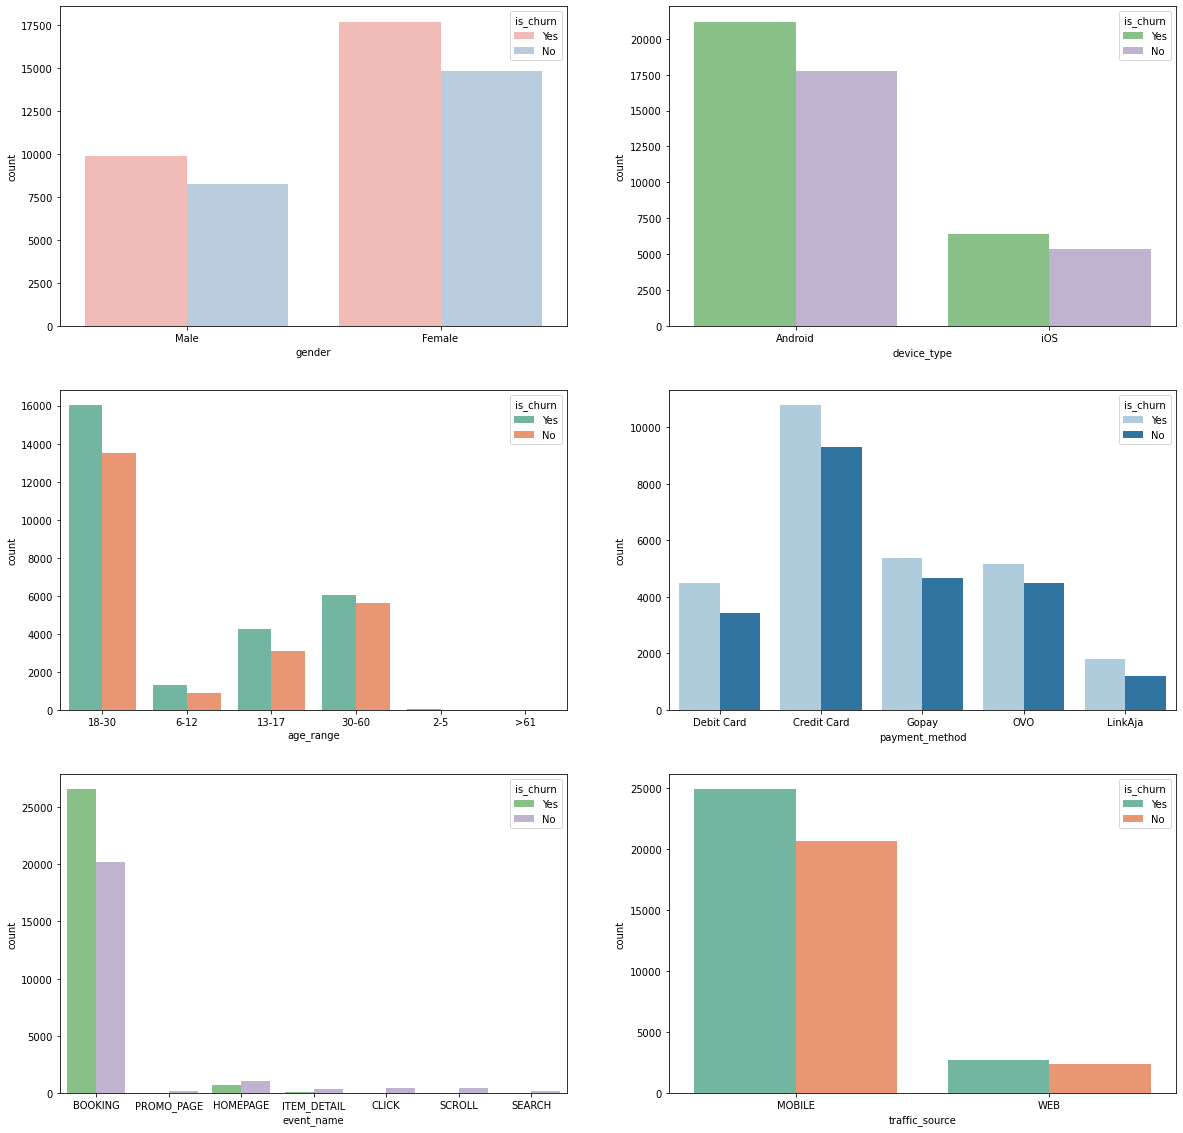

In [130]:
# Pesebaran data berdasarkan is_churn
fig, axarr = plt.subplots(3, 2, figsize=(20, 20))
sns.countplot(x='gender', hue = 'is_churn', data = df_new, palette='Pastel1', ax=axarr[0][0])
sns.countplot(x='device_type', hue = 'is_churn', data = df_new, palette='Accent',ax=axarr[0][1])
sns.countplot(x='age_range', hue = 'is_churn', data = df_new, palette='Set2', ax=axarr[1][0])
sns.countplot(x='payment_method', hue = 'is_churn', data = df_new, palette='Paired', ax=axarr[1][1])
sns.countplot(x='event_name', hue = 'is_churn', data = df_new, palette='Accent', ax=axarr[2][0])
sns.countplot(x='traffic_source', hue = 'is_churn', data = df_new, palette='Set2', ax=axarr[2][1])
plt.show()

### Insight

1. Customer yang **Tidak Churn** sebanyak **23073 (45.51%)** dan yang **Churn** sebanyak **27631 (54.49%)**
2. Gender yang paling banyak **Churn** adalah **Female**
3. Device Type yang paling banyak **Churn** adalah **Android** 
4. Rentang umur yang paling banyak **Churn** adalah umur **18-30 tahun** atau orang dewasa.
5. Metode pembayaran yang paling banyak **Churn** dengan metode **Credit Card**
6. Customer yang terakhir kali membuka aplikasi **Booking** yang paling banyak Churn 
7. Pengguna aplikasi yang paling banyak **Churn** adalah pengguna **MOBILE** 

# Feature Selection

In [131]:
df_new.head()

,last_trans,customer_id,booking_id,session_id,product_metadata,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,event_name,event_time,event_id,traffic_source,trans_1Month,number_of_transaction,total_promo_amount,total_shipment_fee,count_promo,total_payment_success,total_payment_failed,payment_method,delivery_time,age,customer_age,age_range,transaction,is_churn
0,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",2016-07-06 16:02:10.388144+00:00,-1.066405,113.575300,256670,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,Male,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,BOOKING,2016-07-01 22:32:45.218400+00:00,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Debit Card,4,9262 days,26.0,18-30,07 2016,Yes
1,2016-07-02 20:01:04.996529+00:00,30771,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",2016-07-06 16:00:51.370901+00:00,-7.593732,131.616450,199897,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,Female,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,BOOKING,2016-07-02 20:01:04.996529+00:00,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE,0.0,1.0,5272,5000.0,1,1.0,0.0,Credit Card,3,4080 days,11.0,6-12,07 2016,Yes
2,2016-07-03 16:25:01.401472+00:00,67563,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,"[{'product_id': 47432, 'quantity': 3, 'item_pr...",2016-07-09 14:36:17.739418+00:00,-6.297146,106.847493,996610,Melinda,Hasanah,bdc7e701-230b-479a-865d-417a469f4987,bdc7e701_230b_479a_865d_417a469f4987@startupca...,Female,2008-12-10,Android,6f8d47ab-e140-492d-af7b-ae1a9b7cbcdb,Android 2.3.4,-6.297146,106.847493,Jakarta Raya,Indonesia,2016-07-03,BOOKING,2016-07-03 16:25:01.401472+00:00,3cd30105-86bd-4931-820b-af60f7d7e5cb,MOBILE,0.0,1.0,0,10000.0,0,1.0,0.0,Gopay,5,2762 days,8.0,6-12,07 2016,Yes
3,2016-07-04 00:58:13.525069+00:00,22844,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,"[{'product_id': 25047, 'quantity': 1, 'item_pr...",2016-07-10 01:34:45.509511+00:00,-7.435797,108.745902,215548,Queen,Haryanti,dacf34fe-e5bc-4769-8a20-c6f26d72a6d8,dacf34fe_e5bc_4769_8a20_c6f26d72a6d8@zakyfound...,Female,1993-04-30,Android,bdd51573-2110-4bc3-ab5d-1789242717f8,Android 5.0,-6.220949,106.783241,Jakarta Raya,Indonesia,2016-07-02,BOOKING,2016-07-04 00:58:13.525069+00:00,7bebf1fe-46cb-4524-96e8-1197629792a6,MOBILE,0.0,1.0,5952,10000.0,1,1.0,0.0,Gopay,6,8464 days,24.0,18-30,07 2016,Yes
4,2016-07-04 18:10:42.766218+00:00,9914,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,"[{'product_id': 43464, 'quantity': 1, 'item_pr...",2016-07-06 18:28:35.039732+00:00,-2.320134,121.083536,336925,Baktianto,Iswahyudi,cbf3e32b-42ff-4d0c-a3a3-e6e0a1e8aab3,cbf3e32b_42ff_4d0c_a3a3_e6e0a1e8aab3@zakyfound...,Male,1996-01-30,iOS,6ee598b2-72f1-457b-b2b5-30efd2e965ba,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,2.274928,99.001182,Sumatera Utara,Indonesia,2016-07-04,BOOKING,2016-07-04 18:10:42.766218+00:00,08490bb0-8f6c-4d52-a6e5-1a33eecf9175,MOBILE,0.0,1.0,6060,15000.0,1,1.0,0.0,Credit Card,2,7461 days,21.0,18-30,07 2016,Yes


In [132]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   last_trans              50704 non-null  datetime64[ns, UTC]
 1   customer_id             50704 non-null  object             
 2   booking_id              50704 non-null  object             
 3   session_id              50704 non-null  object             
 4   product_metadata        50704 non-null  object             
 5   shipment_date_limit     50704 non-null  datetime64[ns, UTC]
 6   shipment_location_lat   50704 non-null  float64            
 7   shipment_location_long  50704 non-null  float64            
 8   total_amount            50704 non-null  int64              
 9   first_name              50704 non-null  object             
 10  last_name               50704 non-null  object             
 11  username                50704 non-null  o

In [133]:
# Convertin the predictor variable in a binary numeric variable
df_new['is_churn'].replace(to_replace='Yes', value=1, inplace=True)
df_new['is_churn'].replace(to_replace='No', value=0, inplace=True)

In [134]:
# change year data type from float to integer
df_new['is_churn']=df_new['is_churn'].astype('int')
df_new['customer_age']=df_new['customer_age'].astype('int')
df_new['total_shipment_fee']=df_new['total_shipment_fee'].astype('int')
df_new['trans_1Month']=df_new['trans_1Month'].astype('int')
df_new['total_payment_failed']=df_new['total_payment_failed'].astype('int')
df_new['total_payment_success']=df_new['total_payment_success'].astype('int')
df_new['count_promo']=df_new['count_promo'].astype('int')

In [135]:
df_final = df_new.drop(['last_trans','customer_id','booking_id','session_id','product_metadata','shipment_date_limit',
                        'shipment_location_lat','shipment_location_long','total_amount','shipment_location_long',
                        'first_name','last_name','username','email','birthdate','device_id','device_version',
                        'home_location_lat','home_location_long','home_country','first_join_date','event_time',
                        'event_id','age','age_range','transaction','number_of_transaction'], axis=1)
df_final

,gender,device_type,home_location,event_name,traffic_source,trans_1Month,total_promo_amount,total_shipment_fee,count_promo,total_payment_success,total_payment_failed,payment_method,delivery_time,customer_age,is_churn
0,Male,Android,Jawa Barat,BOOKING,MOBILE,0,0,10000,0,1,0,Debit Card,4,26,1
1,Female,iOS,Maluku,BOOKING,MOBILE,0,5272,5000,1,1,0,Credit Card,3,11,1
2,Female,Android,Jakarta Raya,BOOKING,MOBILE,0,0,10000,0,1,0,Gopay,5,8,1
3,Female,Android,Jakarta Raya,BOOKING,MOBILE,0,5952,10000,1,1,0,Gopay,6,24,1
4,Male,iOS,Sumatera Utara,BOOKING,MOBILE,0,6060,15000,1,1,0,Credit Card,2,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,Female,Android,Jawa Barat,ITEM_DETAIL,MOBILE,8,10454,13750,1,8,0,Credit Card,4,36,0
50700,Female,Android,Sumatera Selatan,BOOKING,MOBILE,2,3848,10000,1,2,0,Debit Card,4,33,0
50701,Male,iOS,Jakarta Raya,BOOKING,MOBILE,41,60409,7439,10,41,0,Credit Card,3,20,0
50702,Female,iOS,Kalimantan Barat,PROMO_PAGE,MOBILE,1,0,5000,0,1,0,LinkAja,4,25,0


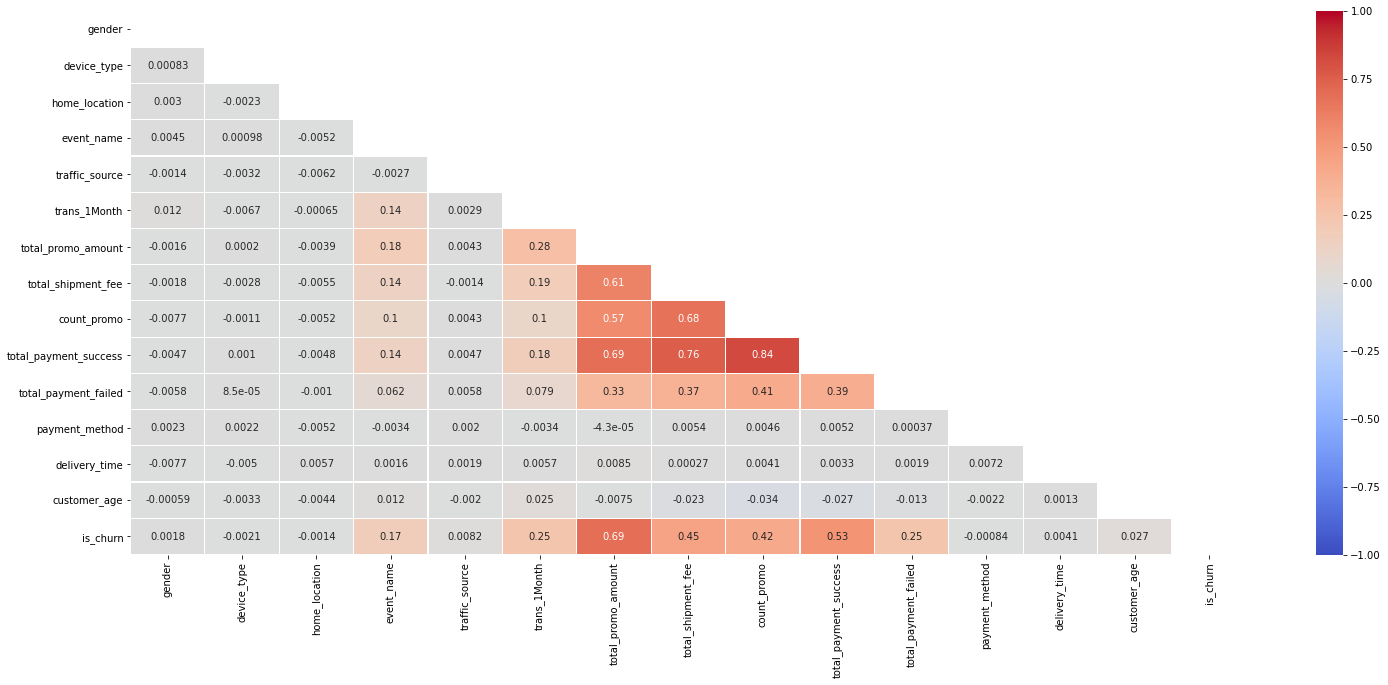

In [136]:
plt.figure(figsize=(25, 10))
corr = df_final.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [137]:
from sklearn.preprocessing import LabelEncoder
# Convertion to numerikal column  
for col in df_final.columns:
    if df_final[col].dtype == np.number: continue
    # Label Encoding all column
    df_final[col] = LabelEncoder().fit_transform(df_final[col])

In [138]:
# tentukan variabel X dan variabel y
X = df_final.loc[:, df_final.columns != 'is_churn']
y = df_final['is_churn']

In [139]:
# feature selection
# import library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features','Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by='Score',ascending=False)

The features that correlate well with target feature:



,Features,Score
6,total_promo_amount,1.383398e+08
9,total_payment_success,5.462774e+05
8,count_promo,2.079205e+05
5,trans_1Month,2.861179e+04
10,total_payment_failed,2.464413e+04
7,total_shipment_fee,1.037904e+04
3,event_name,4.161030e+03
13,customer_age,2.849180e+02
2,home_location,3.225427e+00
4,traffic_source,3.093202e+00


In [140]:
df_final = df_new[['total_promo_amount','total_payment_success','count_promo','total_payment_failed','trans_1Month',
                   'total_shipment_fee','event_name','customer_age','traffic_source','home_location','is_churn']]
df_final

,total_promo_amount,total_payment_success,count_promo,total_payment_failed,trans_1Month,total_shipment_fee,event_name,customer_age,traffic_source,home_location,is_churn
0,0,1,0,0,0,10000,BOOKING,26,MOBILE,Jawa Barat,1
1,5272,1,1,0,0,5000,BOOKING,11,MOBILE,Maluku,1
2,0,1,0,0,0,10000,BOOKING,8,MOBILE,Jakarta Raya,1
3,5952,1,1,0,0,10000,BOOKING,24,MOBILE,Jakarta Raya,1
4,6060,1,1,0,0,15000,BOOKING,21,MOBILE,Sumatera Utara,1
...,...,...,...,...,...,...,...,...,...,...,...
50699,10454,8,1,0,8,13750,ITEM_DETAIL,36,MOBILE,Jawa Barat,0
50700,3848,2,1,0,2,10000,BOOKING,33,MOBILE,Sumatera Selatan,0
50701,60409,41,10,0,41,7439,BOOKING,20,MOBILE,Jakarta Raya,0
50702,0,1,0,0,1,5000,PROMO_PAGE,25,MOBILE,Kalimantan Barat,0


In [141]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   total_promo_amount     50704 non-null  int64 
 1   total_payment_success  50704 non-null  int32 
 2   count_promo            50704 non-null  int32 
 3   total_payment_failed   50704 non-null  int32 
 4   trans_1Month           50704 non-null  int32 
 5   total_shipment_fee     50704 non-null  int32 
 6   event_name             50704 non-null  object
 7   customer_age           50704 non-null  int32 
 8   traffic_source         50704 non-null  object
 9   home_location          50704 non-null  object
 10  is_churn               50704 non-null  int32 
dtypes: int32(7), int64(1), object(3)
memory usage: 5.3+ MB


In [142]:
# cek kolom dengan tipe data numerikal
numerical_cols = [cname for cname in df_final.columns
                 if df_final[cname].dtype in ["int32", "int64", "float64"]]
df_final[numerical_cols].head(10)

,total_promo_amount,total_payment_success,count_promo,total_payment_failed,trans_1Month,total_shipment_fee,customer_age,is_churn
0,0,1,0,0,0,10000,26,1
1,5272,1,1,0,0,5000,11,1
2,0,1,0,0,0,10000,8,1
3,5952,1,1,0,0,10000,24,1
4,6060,1,1,0,0,15000,21,1
5,4459,1,1,0,0,0,20,1
6,0,1,0,0,0,10000,19,1
7,6658,1,1,0,0,15000,20,1
8,0,1,0,0,0,0,13,1
9,3732,1,1,0,0,10000,14,1


In [143]:
# tampilkan nilai correlation setiap kolom numerik
df_final.corr()

,total_promo_amount,total_payment_success,count_promo,total_payment_failed,trans_1Month,total_shipment_fee,customer_age,is_churn
total_promo_amount,1.000000,0.944040,0.995206,0.493667,0.163629,0.000288,-0.081960,-0.394730
total_payment_success,0.944040,1.000000,0.948635,0.461219,0.237543,0.000383,-0.063812,-0.461939
count_promo,0.995206,0.948635,1.000000,0.497190,0.164313,0.000403,-0.082061,-0.396185
total_payment_failed,0.493667,0.461219,0.497190,1.000000,0.101283,-0.001249,-0.040889,-0.256865
trans_1Month,0.163629,0.237543,0.164313,0.101283,1.000000,-0.001089,0.047945,-0.286735
total_shipment_fee,0.000288,0.000383,0.000403,-0.001249,-0.001089,1.000000,-0.001408,-0.001743
customer_age,-0.081960,-0.063812,-0.082061,-0.040889,0.047945,-0.001408,1.000000,-0.046727
is_churn,-0.394730,-0.461939,-0.396185,-0.256865,-0.286735,-0.001743,-0.046727,1.000000


<AxesSubplot:>

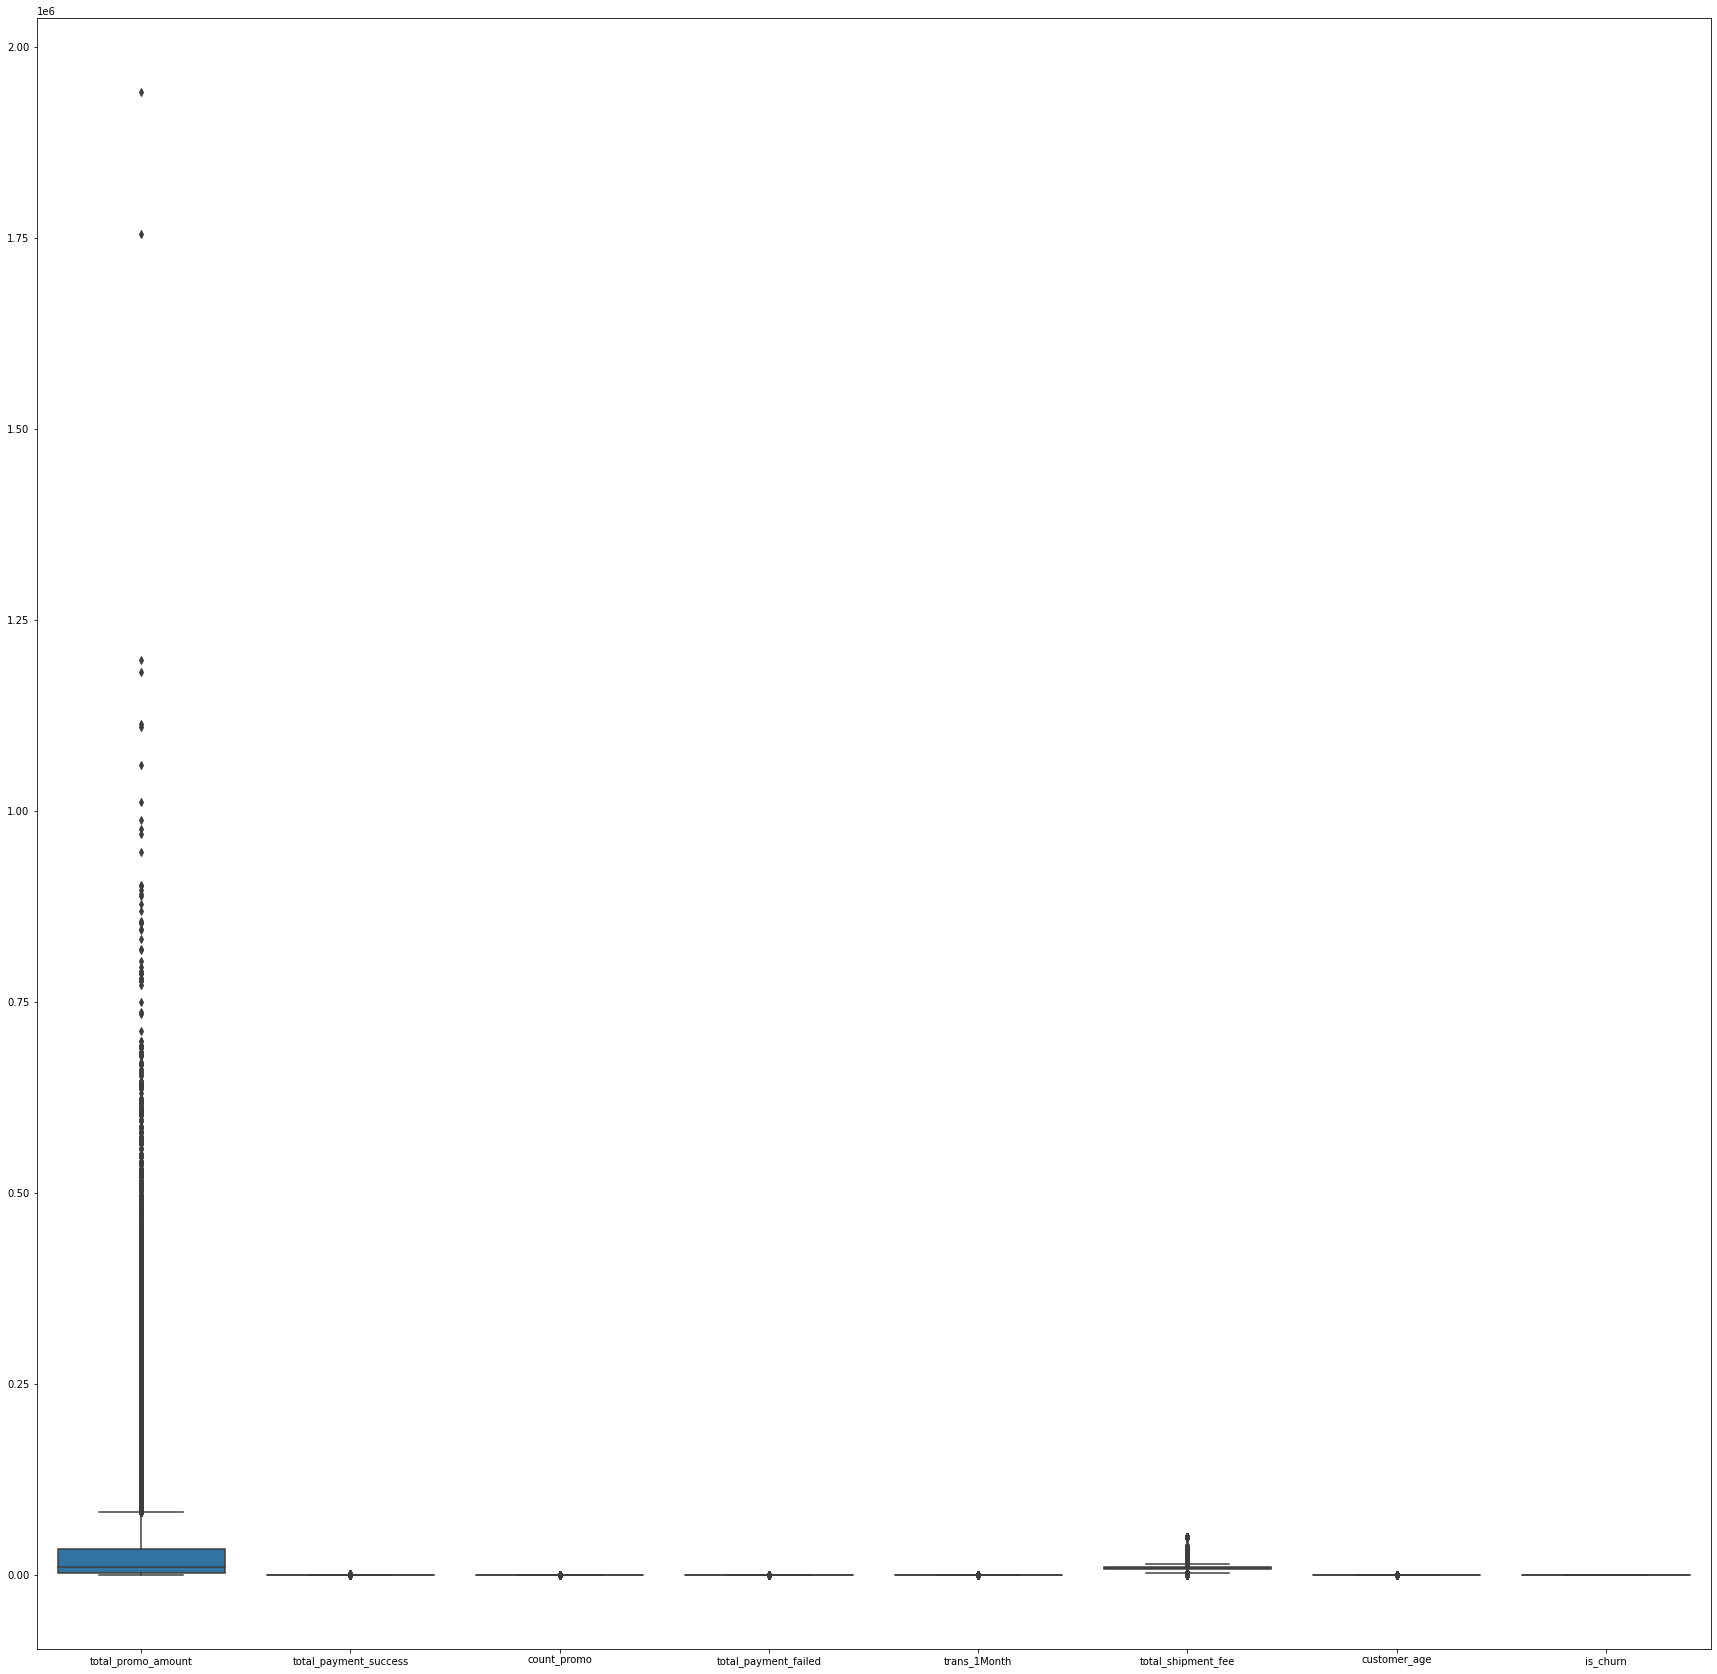

In [144]:
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data = df_final)

In [145]:
# Z-Score
columns = ['total_promo_amount', 'total_payment_success', 'count_promo', 'total_payment_failed', 'trans_1Month',
           'total_shipment_fee', 'customer_age']

for i in columns:
    upper_limit = df_final[i].mean() + 3*df_final[i].std()
    lower_limit = df_final[i].mean() - 3*df_final[i].std()

    df_final[i] = np.where(
        df_final[i]>upper_limit,
        upper_limit,
        np.where(
            df_final[i]<lower_limit,
            lower_limit,
            df_final[i]
        )
    )

<AxesSubplot:>

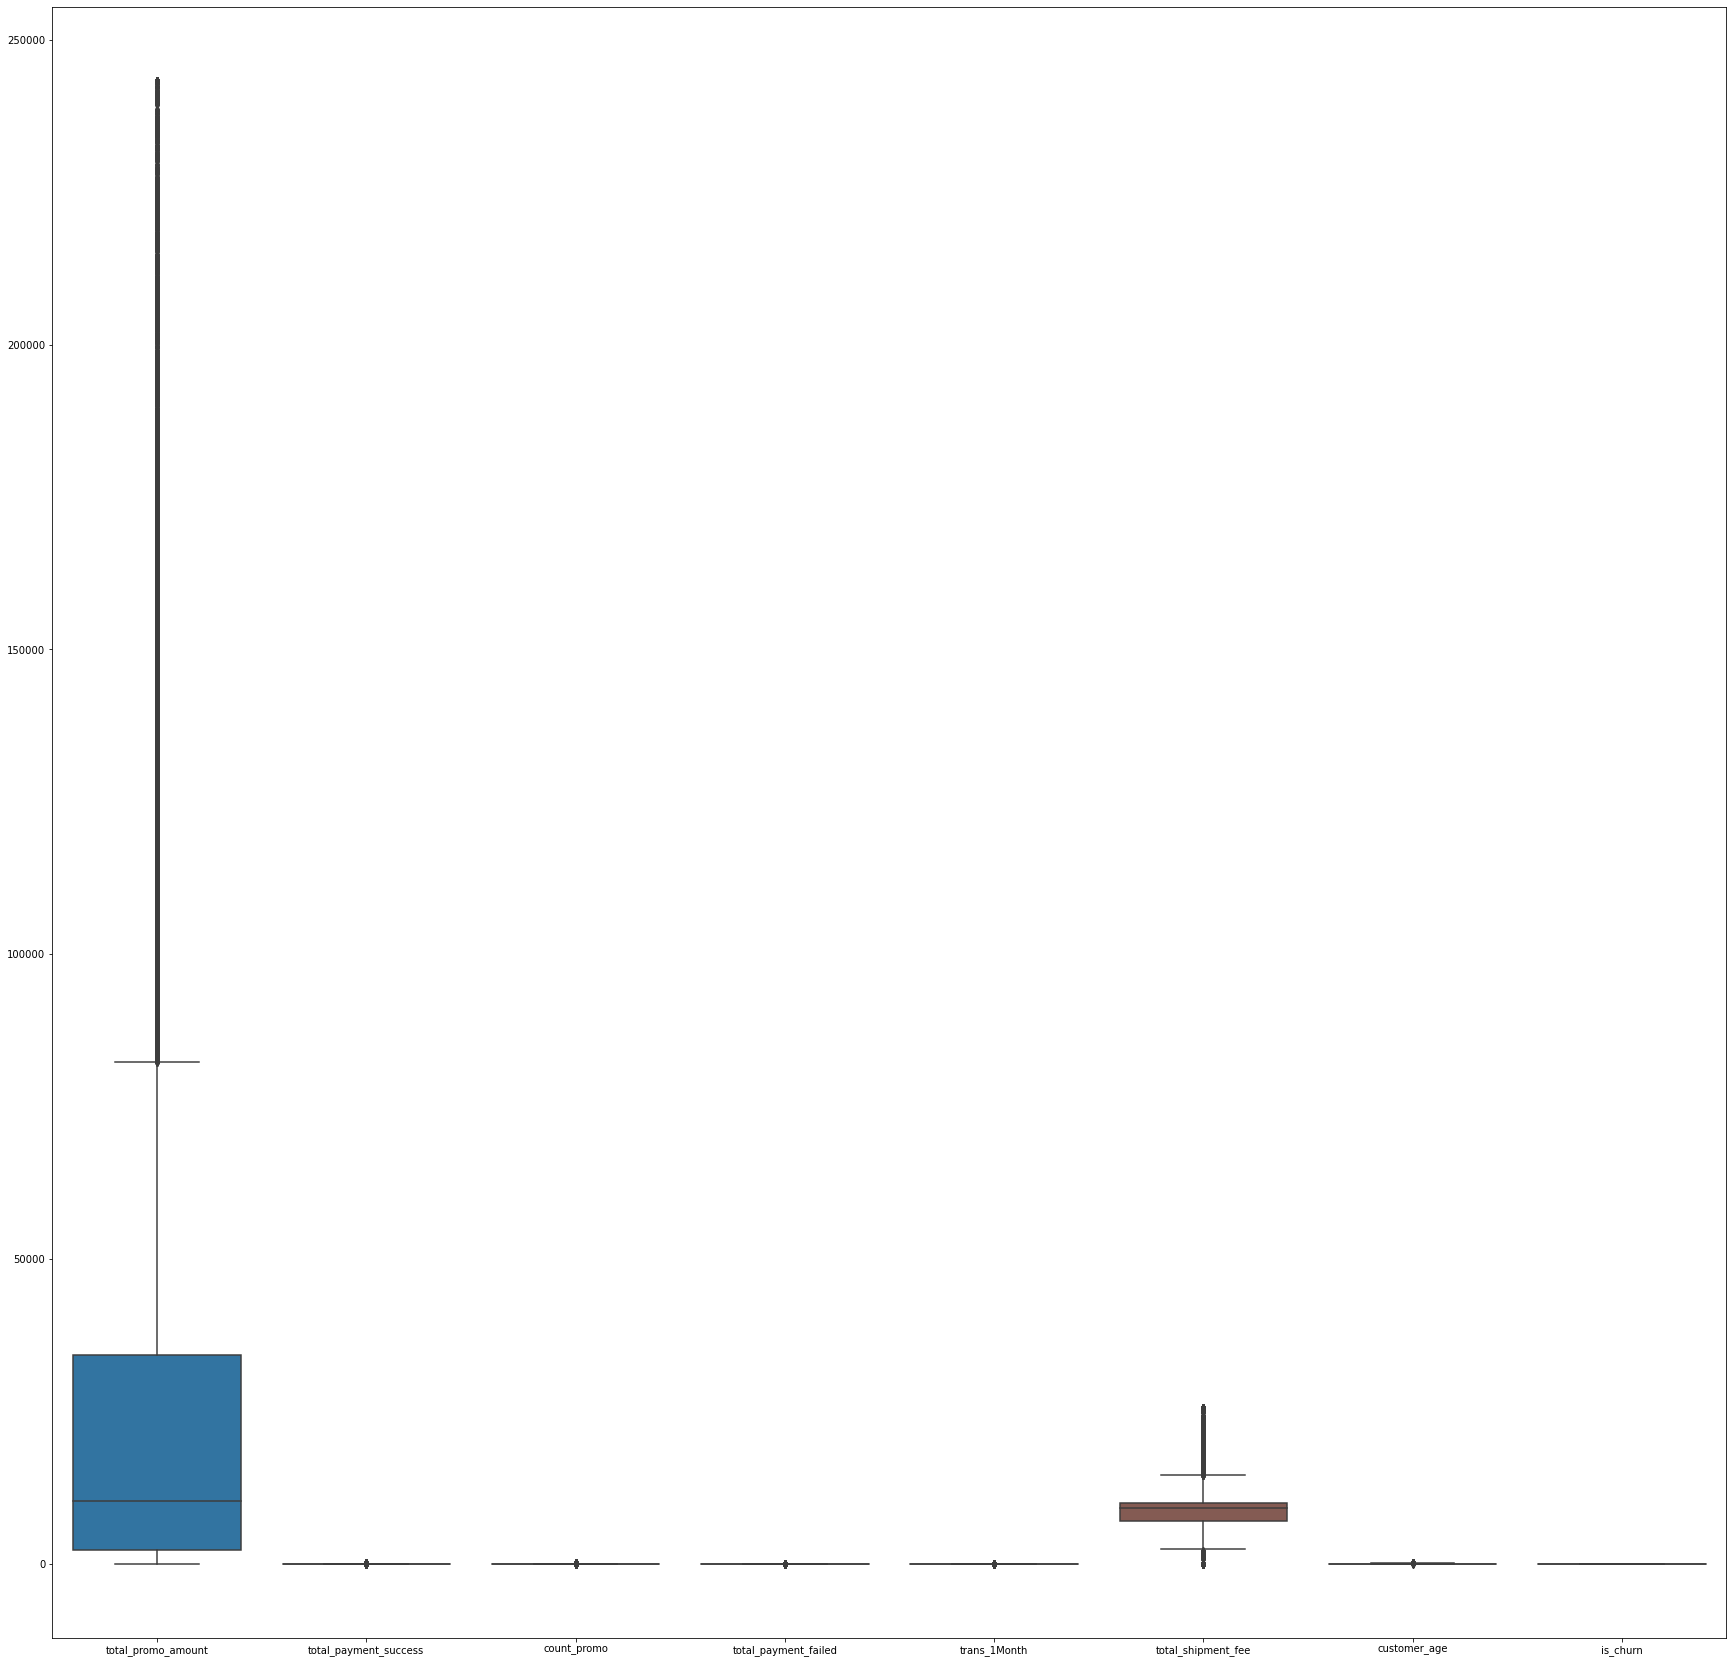

In [146]:
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data = df_final)

In [147]:
categorical_cols = [column for column, is_type in (df_final.dtypes=="object").items() if is_type]
categorical_cols

['event_name', 'traffic_source', 'home_location']

In [148]:
# Melihat Frequency Unique Values di Masing Masing Kolom

for nama_kolom in df_final.columns:
    print(f"----------- {nama_kolom} ----------- \n")
    print(df_final[nama_kolom].value_counts())

----------- total_promo_amount ----------- 

0.000000         11825
243234.725752     1123
4652.000000         12
3204.000000          8
6536.000000          8
                 ...  
43225.000000         1
142214.000000        1
177884.000000        1
92239.000000         1
57889.000000         1
Name: total_promo_amount, Length: 27219, dtype: int64
----------- total_payment_success ----------- 

1.0      10263
2.0       5465
3.0       3758
4.0       2894
5.0       2311
         ...  
98.0        25
90.0        25
100.0       22
97.0        21
101.0       19
Name: total_payment_success, Length: 103, dtype: int64
----------- count_promo ----------- 

0.000000     11825
1.000000     10764
2.000000      5619
3.000000      3716
4.000000      2622
5.000000      2052
6.000000      1613
7.000000      1291
8.000000      1108
45.435629     1104
9.000000       899
10.000000      792
11.000000      676
12.000000      657
13.000000      514
14.000000      457
15.000000      429
16.000000      387


## Labeling Data

In [149]:
# Label Encoding Kolom, Karena jenis datanya terlalu banyak dan tidak mungkin kita pakai One Hot Encoding
labelencoder = LabelEncoder()
df_final['home_location'] = labelencoder.fit_transform(df_final['home_location'])
df_final['event_name'] = labelencoder.fit_transform(df_final['event_name'])
df_final

,total_promo_amount,total_payment_success,count_promo,total_payment_failed,trans_1Month,total_shipment_fee,event_name,customer_age,traffic_source,home_location,is_churn
0,0.0,1.0,0.0,0.0,0.000000,10000.0,0,26.0,MOBILE,8,1
1,5272.0,1.0,1.0,0.0,0.000000,5000.0,0,11.0,MOBILE,17,1
2,0.0,1.0,0.0,0.0,0.000000,10000.0,0,8.0,MOBILE,6,1
3,5952.0,1.0,1.0,0.0,0.000000,10000.0,0,24.0,MOBILE,6,1
4,6060.0,1.0,1.0,0.0,0.000000,15000.0,0,21.0,MOBILE,31,1
...,...,...,...,...,...,...,...,...,...,...,...
50699,10454.0,8.0,1.0,0.0,5.914949,13750.0,3,36.0,MOBILE,8,0
50700,3848.0,2.0,1.0,0.0,2.000000,10000.0,0,33.0,MOBILE,30,0
50701,60409.0,41.0,10.0,0.0,5.914949,7439.0,0,20.0,MOBILE,6,0
50702,0.0,1.0,0.0,0.0,1.000000,5000.0,4,25.0,MOBILE,11,0


In [150]:
# One Hot Encoding semua features
df_dummies = pd.get_dummies(df_final)
df_dummies

,total_promo_amount,total_payment_success,count_promo,total_payment_failed,trans_1Month,total_shipment_fee,event_name,customer_age,home_location,is_churn,traffic_source_MOBILE,traffic_source_WEB
0,0.0,1.0,0.0,0.0,0.000000,10000.0,0,26.0,8,1,1,0
1,5272.0,1.0,1.0,0.0,0.000000,5000.0,0,11.0,17,1,1,0
2,0.0,1.0,0.0,0.0,0.000000,10000.0,0,8.0,6,1,1,0
3,5952.0,1.0,1.0,0.0,0.000000,10000.0,0,24.0,6,1,1,0
4,6060.0,1.0,1.0,0.0,0.000000,15000.0,0,21.0,31,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50699,10454.0,8.0,1.0,0.0,5.914949,13750.0,3,36.0,8,0,1,0
50700,3848.0,2.0,1.0,0.0,2.000000,10000.0,0,33.0,30,0,1,0
50701,60409.0,41.0,10.0,0.0,5.914949,7439.0,0,20.0,6,0,1,0
50702,0.0,1.0,0.0,0.0,1.000000,5000.0,4,25.0,11,0,1,0


## Split Data

### Train Test Set 1

In [151]:
# tentukan variabel X dan variabel y
X = df_dummies.loc[:, df_dummies.columns != 'is_churn']
y = df_dummies['is_churn']

In [152]:
# check the proportion of 0 and 1 in Churn label
df_dummies["is_churn"].value_counts()

1    27631
0    23073
Name: is_churn, dtype: int64

In [153]:
# split data menjadi training dan testing set dengan perbadingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [154]:
X

,total_promo_amount,total_payment_success,count_promo,total_payment_failed,trans_1Month,total_shipment_fee,event_name,customer_age,home_location,traffic_source_MOBILE,traffic_source_WEB
0,0.0,1.0,0.0,0.0,0.000000,10000.0,0,26.0,8,1,0
1,5272.0,1.0,1.0,0.0,0.000000,5000.0,0,11.0,17,1,0
2,0.0,1.0,0.0,0.0,0.000000,10000.0,0,8.0,6,1,0
3,5952.0,1.0,1.0,0.0,0.000000,10000.0,0,24.0,6,1,0
4,6060.0,1.0,1.0,0.0,0.000000,15000.0,0,21.0,31,1,0
...,...,...,...,...,...,...,...,...,...,...,...
50699,10454.0,8.0,1.0,0.0,5.914949,13750.0,3,36.0,8,1,0
50700,3848.0,2.0,1.0,0.0,2.000000,10000.0,0,33.0,30,1,0
50701,60409.0,41.0,10.0,0.0,5.914949,7439.0,0,20.0,6,1,0
50702,0.0,1.0,0.0,0.0,1.000000,5000.0,4,25.0,11,1,0


### Train Test Set 2 (Tanpa Kolom total_promo_amount dan count_promo)

In [155]:
# tentukan variabel X dan variabel y
X2 = df_dummies.drop(['total_promo_amount', 'count_promo', 'is_churn'], axis=1)
y2 = df_dummies['is_churn']

In [156]:
# check the proportion of 0 and 1 in Churn label
df_dummies["is_churn"].value_counts()

1    27631
0    23073
Name: is_churn, dtype: int64

In [157]:
# split data menjadi training dan testing set
# dengan perbadingan 80:20
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [158]:
X2

,total_payment_success,total_payment_failed,trans_1Month,total_shipment_fee,event_name,customer_age,home_location,traffic_source_MOBILE,traffic_source_WEB
0,1.0,0.0,0.000000,10000.0,0,26.0,8,1,0
1,1.0,0.0,0.000000,5000.0,0,11.0,17,1,0
2,1.0,0.0,0.000000,10000.0,0,8.0,6,1,0
3,1.0,0.0,0.000000,10000.0,0,24.0,6,1,0
4,1.0,0.0,0.000000,15000.0,0,21.0,31,1,0
...,...,...,...,...,...,...,...,...,...
50699,8.0,0.0,5.914949,13750.0,3,36.0,8,1,0
50700,2.0,0.0,2.000000,10000.0,0,33.0,30,1,0
50701,41.0,0.0,5.914949,7439.0,0,20.0,6,1,0
50702,1.0,0.0,1.000000,5000.0,4,25.0,11,1,0


### Kesimpulan

- Menggunakan 2 train test set yang berbeda. Kedua train test set memiliki perbandingan 80:20 (Data Train 80; Data Test 20)
- Train test set 1 menggunakan 10 features sebagai variabel X dan menggunakan one hot encoding and label encoding.
> Features tersebut adalah: total_promo_amount, total_payment_success, count_promo, trans_1Month, total_payment_failed, total_shipment_fee, event_name, customer_age, traffic_source, home_location
- Train test set 2 sama seperti train test set 1, namun tidak menggunakan kolom total_promo_amount dan count_promo sebagai variabel X.
> Features tersebut adalah: total_payment_success, trans_1Month, total_payment_failed, total_shipment_fee, event_name, customer_age, traffic_source, home_location

## Modelling Churn Prediction

In [159]:
# Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

### Train Test Set 1

In [160]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
             LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
             RandomForestClassifier,
             GradientBoostingClassifier,
             ExtraTreesClassifier,
             XGBClassifier,
             CatBoostClassifier]

model_name = ['DecisionTreeClassifier',
              'LogisticRegression',
              'KNeighborsClassifier',
              'GaussianNB',
              'RandomForestClassifier',
              'GradientBoostingClassifier',
              'ExtraTreesClassifier',
              'XGBClassifier',
              'CatBoostClassifier']

## loop for all model
datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y):
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        nfold += 1
    
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

Learning rate set to 0.050073
0:	learn: 0.6272156	total: 206ms	remaining: 3m 25s
1:	learn: 0.5740441	total: 230ms	remaining: 1m 54s
2:	learn: 0.5317498	total: 243ms	remaining: 1m 20s
3:	learn: 0.4977778	total: 253ms	remaining: 1m 3s
4:	learn: 0.4701368	total: 263ms	remaining: 52.3s
5:	learn: 0.4477575	total: 274ms	remaining: 45.3s
6:	learn: 0.4291500	total: 287ms	remaining: 40.7s
7:	learn: 0.4148394	total: 295ms	remaining: 36.6s
8:	learn: 0.4009675	total: 304ms	remaining: 33.5s
9:	learn: 0.3897475	total: 313ms	remaining: 31s
10:	learn: 0.3794369	total: 322ms	remaining: 29s
11:	learn: 0.3699552	total: 331ms	remaining: 27.3s
12:	learn: 0.3620944	total: 340ms	remaining: 25.8s
13:	learn: 0.3532586	total: 349ms	remaining: 24.6s
14:	learn: 0.3469838	total: 357ms	remaining: 23.4s
15:	learn: 0.3408962	total: 366ms	remaining: 22.5s
16:	learn: 0.3359166	total: 375ms	remaining: 21.7s
17:	learn: 0.3315443	total: 384ms	remaining: 21s
18:	learn: 0.3277293	total: 393ms	remaining: 20.3s
19:	learn: 0.3

178:	learn: 0.2731558	total: 1.96s	remaining: 9.01s
179:	learn: 0.2731291	total: 1.97s	remaining: 8.99s
180:	learn: 0.2730770	total: 1.99s	remaining: 8.98s
181:	learn: 0.2730157	total: 2s	remaining: 8.98s
182:	learn: 0.2729733	total: 2.01s	remaining: 8.97s
183:	learn: 0.2729139	total: 2.02s	remaining: 8.96s
184:	learn: 0.2728652	total: 2.03s	remaining: 8.94s
185:	learn: 0.2728110	total: 2.04s	remaining: 8.93s
186:	learn: 0.2727562	total: 2.05s	remaining: 8.91s
187:	learn: 0.2726898	total: 2.06s	remaining: 8.89s
188:	learn: 0.2726535	total: 2.07s	remaining: 8.87s
189:	learn: 0.2726133	total: 2.08s	remaining: 8.85s
190:	learn: 0.2725776	total: 2.08s	remaining: 8.83s
191:	learn: 0.2725375	total: 2.09s	remaining: 8.81s
192:	learn: 0.2724814	total: 2.1s	remaining: 8.8s
193:	learn: 0.2724185	total: 2.11s	remaining: 8.78s
194:	learn: 0.2723688	total: 2.12s	remaining: 8.76s
195:	learn: 0.2723406	total: 2.13s	remaining: 8.74s
196:	learn: 0.2722553	total: 2.14s	remaining: 8.73s
197:	learn: 0.272

344:	learn: 0.2643634	total: 3.75s	remaining: 7.11s
345:	learn: 0.2643354	total: 3.76s	remaining: 7.11s
346:	learn: 0.2642939	total: 3.77s	remaining: 7.1s
347:	learn: 0.2642534	total: 3.79s	remaining: 7.09s
348:	learn: 0.2642256	total: 3.8s	remaining: 7.09s
349:	learn: 0.2641857	total: 3.82s	remaining: 7.09s
350:	learn: 0.2641593	total: 3.83s	remaining: 7.08s
351:	learn: 0.2641413	total: 3.84s	remaining: 7.07s
352:	learn: 0.2640931	total: 3.85s	remaining: 7.07s
353:	learn: 0.2640345	total: 3.87s	remaining: 7.06s
354:	learn: 0.2639774	total: 3.88s	remaining: 7.05s
355:	learn: 0.2639330	total: 3.89s	remaining: 7.04s
356:	learn: 0.2639061	total: 3.9s	remaining: 7.03s
357:	learn: 0.2638405	total: 3.92s	remaining: 7.03s
358:	learn: 0.2638204	total: 3.93s	remaining: 7.02s
359:	learn: 0.2637577	total: 3.94s	remaining: 7.01s
360:	learn: 0.2637315	total: 3.96s	remaining: 7.01s
361:	learn: 0.2636925	total: 3.97s	remaining: 7s
362:	learn: 0.2636610	total: 3.98s	remaining: 6.99s
363:	learn: 0.2636

518:	learn: 0.2570247	total: 5.98s	remaining: 5.54s
519:	learn: 0.2569854	total: 5.99s	remaining: 5.53s
520:	learn: 0.2569426	total: 6s	remaining: 5.52s
521:	learn: 0.2568887	total: 6.02s	remaining: 5.51s
522:	learn: 0.2568287	total: 6.03s	remaining: 5.5s
523:	learn: 0.2567836	total: 6.04s	remaining: 5.49s
524:	learn: 0.2567238	total: 6.06s	remaining: 5.48s
525:	learn: 0.2566655	total: 6.07s	remaining: 5.47s
526:	learn: 0.2566078	total: 6.08s	remaining: 5.46s
527:	learn: 0.2565755	total: 6.09s	remaining: 5.45s
528:	learn: 0.2565195	total: 6.1s	remaining: 5.43s
529:	learn: 0.2564844	total: 6.11s	remaining: 5.42s
530:	learn: 0.2564498	total: 6.13s	remaining: 5.41s
531:	learn: 0.2564082	total: 6.14s	remaining: 5.4s
532:	learn: 0.2563731	total: 6.15s	remaining: 5.39s
533:	learn: 0.2563519	total: 6.16s	remaining: 5.38s
534:	learn: 0.2562830	total: 6.17s	remaining: 5.36s
535:	learn: 0.2562273	total: 6.18s	remaining: 5.35s
536:	learn: 0.2561857	total: 6.2s	remaining: 5.34s
537:	learn: 0.25615

693:	learn: 0.2502161	total: 8s	remaining: 3.53s
694:	learn: 0.2501747	total: 8.02s	remaining: 3.52s
695:	learn: 0.2501344	total: 8.03s	remaining: 3.51s
696:	learn: 0.2500937	total: 8.04s	remaining: 3.5s
697:	learn: 0.2500484	total: 8.06s	remaining: 3.49s
698:	learn: 0.2500199	total: 8.07s	remaining: 3.48s
699:	learn: 0.2499670	total: 8.08s	remaining: 3.46s
700:	learn: 0.2499128	total: 8.1s	remaining: 3.45s
701:	learn: 0.2498774	total: 8.11s	remaining: 3.44s
702:	learn: 0.2498425	total: 8.12s	remaining: 3.43s
703:	learn: 0.2498263	total: 8.13s	remaining: 3.42s
704:	learn: 0.2498034	total: 8.14s	remaining: 3.41s
705:	learn: 0.2497648	total: 8.15s	remaining: 3.39s
706:	learn: 0.2497375	total: 8.16s	remaining: 3.38s
707:	learn: 0.2496929	total: 8.17s	remaining: 3.37s
708:	learn: 0.2496645	total: 8.18s	remaining: 3.36s
709:	learn: 0.2496467	total: 8.2s	remaining: 3.35s
710:	learn: 0.2496242	total: 8.21s	remaining: 3.34s
711:	learn: 0.2495773	total: 8.22s	remaining: 3.32s
712:	learn: 0.2495

856:	learn: 0.2444919	total: 9.82s	remaining: 1.64s
857:	learn: 0.2444773	total: 9.83s	remaining: 1.63s
858:	learn: 0.2444234	total: 9.84s	remaining: 1.61s
859:	learn: 0.2443829	total: 9.86s	remaining: 1.6s
860:	learn: 0.2443456	total: 9.87s	remaining: 1.59s
861:	learn: 0.2443170	total: 9.88s	remaining: 1.58s
862:	learn: 0.2442938	total: 9.89s	remaining: 1.57s
863:	learn: 0.2442446	total: 9.9s	remaining: 1.56s
864:	learn: 0.2442187	total: 9.91s	remaining: 1.55s
865:	learn: 0.2441897	total: 9.92s	remaining: 1.53s
866:	learn: 0.2441603	total: 9.93s	remaining: 1.52s
867:	learn: 0.2441342	total: 9.94s	remaining: 1.51s
868:	learn: 0.2441088	total: 9.95s	remaining: 1.5s
869:	learn: 0.2440839	total: 9.96s	remaining: 1.49s
870:	learn: 0.2440400	total: 9.97s	remaining: 1.48s
871:	learn: 0.2440159	total: 9.98s	remaining: 1.47s
872:	learn: 0.2439755	total: 10s	remaining: 1.45s
873:	learn: 0.2439377	total: 10s	remaining: 1.44s
874:	learn: 0.2439017	total: 10s	remaining: 1.43s
875:	learn: 0.2438579

18:	learn: 0.3241794	total: 184ms	remaining: 9.49s
19:	learn: 0.3197622	total: 193ms	remaining: 9.45s
20:	learn: 0.3170539	total: 202ms	remaining: 9.42s
21:	learn: 0.3145200	total: 212ms	remaining: 9.42s
22:	learn: 0.3118958	total: 223ms	remaining: 9.47s
23:	learn: 0.3094520	total: 232ms	remaining: 9.45s
24:	learn: 0.3072295	total: 241ms	remaining: 9.39s
25:	learn: 0.3054373	total: 250ms	remaining: 9.36s
26:	learn: 0.3036730	total: 259ms	remaining: 9.33s
27:	learn: 0.3022274	total: 268ms	remaining: 9.29s
28:	learn: 0.3006703	total: 276ms	remaining: 9.25s
29:	learn: 0.2990066	total: 285ms	remaining: 9.21s
30:	learn: 0.2978908	total: 294ms	remaining: 9.19s
31:	learn: 0.2962997	total: 302ms	remaining: 9.15s
32:	learn: 0.2954682	total: 311ms	remaining: 9.11s
33:	learn: 0.2943830	total: 320ms	remaining: 9.09s
34:	learn: 0.2935754	total: 328ms	remaining: 9.06s
35:	learn: 0.2926957	total: 337ms	remaining: 9.03s
36:	learn: 0.2915940	total: 346ms	remaining: 9s
37:	learn: 0.2907805	total: 355ms	

188:	learn: 0.2699540	total: 1.96s	remaining: 8.42s
189:	learn: 0.2699053	total: 1.98s	remaining: 8.42s
190:	learn: 0.2698667	total: 1.99s	remaining: 8.43s
191:	learn: 0.2698196	total: 2s	remaining: 8.43s
192:	learn: 0.2697649	total: 2.02s	remaining: 8.43s
193:	learn: 0.2697153	total: 2.03s	remaining: 8.43s
194:	learn: 0.2696558	total: 2.04s	remaining: 8.43s
195:	learn: 0.2696325	total: 2.05s	remaining: 8.43s
196:	learn: 0.2695287	total: 2.07s	remaining: 8.43s
197:	learn: 0.2694751	total: 2.08s	remaining: 8.43s
198:	learn: 0.2693994	total: 2.09s	remaining: 8.43s
199:	learn: 0.2693572	total: 2.11s	remaining: 8.43s
200:	learn: 0.2693294	total: 2.12s	remaining: 8.42s
201:	learn: 0.2692856	total: 2.13s	remaining: 8.41s
202:	learn: 0.2692524	total: 2.14s	remaining: 8.4s
203:	learn: 0.2691813	total: 2.16s	remaining: 8.41s
204:	learn: 0.2691346	total: 2.17s	remaining: 8.41s
205:	learn: 0.2690867	total: 2.18s	remaining: 8.41s
206:	learn: 0.2690321	total: 2.2s	remaining: 8.41s
207:	learn: 0.269

360:	learn: 0.2607266	total: 4.17s	remaining: 7.38s
361:	learn: 0.2606705	total: 4.18s	remaining: 7.37s
362:	learn: 0.2606211	total: 4.19s	remaining: 7.36s
363:	learn: 0.2605628	total: 4.21s	remaining: 7.35s
364:	learn: 0.2605234	total: 4.22s	remaining: 7.34s
365:	learn: 0.2604791	total: 4.23s	remaining: 7.33s
366:	learn: 0.2604211	total: 4.24s	remaining: 7.32s
367:	learn: 0.2603738	total: 4.25s	remaining: 7.3s
368:	learn: 0.2603023	total: 4.26s	remaining: 7.29s
369:	learn: 0.2602330	total: 4.27s	remaining: 7.28s
370:	learn: 0.2601966	total: 4.29s	remaining: 7.26s
371:	learn: 0.2601405	total: 4.3s	remaining: 7.25s
372:	learn: 0.2600974	total: 4.31s	remaining: 7.24s
373:	learn: 0.2600447	total: 4.32s	remaining: 7.23s
374:	learn: 0.2599965	total: 4.33s	remaining: 7.21s
375:	learn: 0.2599530	total: 4.34s	remaining: 7.2s
376:	learn: 0.2599119	total: 4.35s	remaining: 7.19s
377:	learn: 0.2598540	total: 4.36s	remaining: 7.17s
378:	learn: 0.2598136	total: 4.37s	remaining: 7.17s
379:	learn: 0.2

532:	learn: 0.2531193	total: 6.14s	remaining: 5.38s
533:	learn: 0.2530701	total: 6.16s	remaining: 5.37s
534:	learn: 0.2530369	total: 6.17s	remaining: 5.36s
535:	learn: 0.2530016	total: 6.18s	remaining: 5.35s
536:	learn: 0.2529533	total: 6.19s	remaining: 5.34s
537:	learn: 0.2529272	total: 6.2s	remaining: 5.33s
538:	learn: 0.2528905	total: 6.21s	remaining: 5.31s
539:	learn: 0.2528584	total: 6.22s	remaining: 5.3s
540:	learn: 0.2528211	total: 6.23s	remaining: 5.29s
541:	learn: 0.2527881	total: 6.25s	remaining: 5.28s
542:	learn: 0.2527408	total: 6.25s	remaining: 5.26s
543:	learn: 0.2527092	total: 6.27s	remaining: 5.25s
544:	learn: 0.2526800	total: 6.28s	remaining: 5.24s
545:	learn: 0.2526285	total: 6.29s	remaining: 5.23s
546:	learn: 0.2525817	total: 6.3s	remaining: 5.21s
547:	learn: 0.2525611	total: 6.31s	remaining: 5.2s
548:	learn: 0.2525286	total: 6.32s	remaining: 5.19s
549:	learn: 0.2525100	total: 6.33s	remaining: 5.18s
550:	learn: 0.2524674	total: 6.34s	remaining: 5.17s
551:	learn: 0.25

691:	learn: 0.2466750	total: 7.93s	remaining: 3.53s
692:	learn: 0.2466442	total: 7.95s	remaining: 3.52s
693:	learn: 0.2466114	total: 7.96s	remaining: 3.51s
694:	learn: 0.2465783	total: 7.97s	remaining: 3.5s
695:	learn: 0.2465236	total: 7.98s	remaining: 3.49s
696:	learn: 0.2464693	total: 7.99s	remaining: 3.48s
697:	learn: 0.2464322	total: 8s	remaining: 3.46s
698:	learn: 0.2463932	total: 8.02s	remaining: 3.45s
699:	learn: 0.2463545	total: 8.03s	remaining: 3.44s
700:	learn: 0.2463257	total: 8.04s	remaining: 3.43s
701:	learn: 0.2462793	total: 8.05s	remaining: 3.42s
702:	learn: 0.2462333	total: 8.06s	remaining: 3.4s
703:	learn: 0.2461935	total: 8.07s	remaining: 3.39s
704:	learn: 0.2461435	total: 8.08s	remaining: 3.38s
705:	learn: 0.2461164	total: 8.09s	remaining: 3.37s
706:	learn: 0.2460936	total: 8.1s	remaining: 3.36s
707:	learn: 0.2460684	total: 8.11s	remaining: 3.35s
708:	learn: 0.2460093	total: 8.12s	remaining: 3.33s
709:	learn: 0.2459816	total: 8.13s	remaining: 3.32s
710:	learn: 0.2459

863:	learn: 0.2403085	total: 9.73s	remaining: 1.53s
864:	learn: 0.2402740	total: 9.74s	remaining: 1.52s
865:	learn: 0.2402515	total: 9.75s	remaining: 1.51s
866:	learn: 0.2401978	total: 9.77s	remaining: 1.5s
867:	learn: 0.2401491	total: 9.78s	remaining: 1.49s
868:	learn: 0.2401197	total: 9.79s	remaining: 1.48s
869:	learn: 0.2400992	total: 9.79s	remaining: 1.46s
870:	learn: 0.2400597	total: 9.8s	remaining: 1.45s
871:	learn: 0.2400436	total: 9.81s	remaining: 1.44s
872:	learn: 0.2400014	total: 9.82s	remaining: 1.43s
873:	learn: 0.2399829	total: 9.83s	remaining: 1.42s
874:	learn: 0.2399420	total: 9.85s	remaining: 1.41s
875:	learn: 0.2399084	total: 9.86s	remaining: 1.4s
876:	learn: 0.2398823	total: 9.87s	remaining: 1.38s
877:	learn: 0.2398417	total: 9.88s	remaining: 1.37s
878:	learn: 0.2398032	total: 9.89s	remaining: 1.36s
879:	learn: 0.2397768	total: 9.9s	remaining: 1.35s
880:	learn: 0.2397581	total: 9.91s	remaining: 1.34s
881:	learn: 0.2397395	total: 9.92s	remaining: 1.33s
882:	learn: 0.23

34:	learn: 0.2955840	total: 392ms	remaining: 10.8s
35:	learn: 0.2947862	total: 407ms	remaining: 10.9s
36:	learn: 0.2938923	total: 422ms	remaining: 11s
37:	learn: 0.2928940	total: 435ms	remaining: 11s
38:	learn: 0.2919616	total: 452ms	remaining: 11.1s
39:	learn: 0.2911954	total: 466ms	remaining: 11.2s
40:	learn: 0.2904445	total: 478ms	remaining: 11.2s
41:	learn: 0.2899690	total: 492ms	remaining: 11.2s
42:	learn: 0.2893625	total: 504ms	remaining: 11.2s
43:	learn: 0.2886594	total: 516ms	remaining: 11.2s
44:	learn: 0.2880041	total: 528ms	remaining: 11.2s
45:	learn: 0.2874422	total: 542ms	remaining: 11.2s
46:	learn: 0.2869081	total: 555ms	remaining: 11.3s
47:	learn: 0.2864553	total: 569ms	remaining: 11.3s
48:	learn: 0.2861145	total: 586ms	remaining: 11.4s
49:	learn: 0.2856667	total: 600ms	remaining: 11.4s
50:	learn: 0.2853687	total: 614ms	remaining: 11.4s
51:	learn: 0.2848769	total: 630ms	remaining: 11.5s
52:	learn: 0.2846055	total: 642ms	remaining: 11.5s
53:	learn: 0.2841145	total: 662ms	r

206:	learn: 0.2715028	total: 2.59s	remaining: 9.92s
207:	learn: 0.2714592	total: 2.6s	remaining: 9.9s
208:	learn: 0.2714319	total: 2.61s	remaining: 9.88s
209:	learn: 0.2713859	total: 2.62s	remaining: 9.87s
210:	learn: 0.2713638	total: 2.64s	remaining: 9.86s
211:	learn: 0.2713141	total: 2.65s	remaining: 9.84s
212:	learn: 0.2712559	total: 2.66s	remaining: 9.82s
213:	learn: 0.2711841	total: 2.67s	remaining: 9.81s
214:	learn: 0.2710964	total: 2.68s	remaining: 9.79s
215:	learn: 0.2710332	total: 2.69s	remaining: 9.77s
216:	learn: 0.2709756	total: 2.7s	remaining: 9.75s
217:	learn: 0.2709037	total: 2.71s	remaining: 9.74s
218:	learn: 0.2708481	total: 2.73s	remaining: 9.72s
219:	learn: 0.2708243	total: 2.73s	remaining: 9.7s
220:	learn: 0.2707749	total: 2.75s	remaining: 9.68s
221:	learn: 0.2707126	total: 2.76s	remaining: 9.66s
222:	learn: 0.2706377	total: 2.77s	remaining: 9.64s
223:	learn: 0.2705640	total: 2.78s	remaining: 9.63s
224:	learn: 0.2704923	total: 2.79s	remaining: 9.62s
225:	learn: 0.27

366:	learn: 0.2631232	total: 4.4s	remaining: 7.59s
367:	learn: 0.2630753	total: 4.41s	remaining: 7.58s
368:	learn: 0.2630302	total: 4.42s	remaining: 7.57s
369:	learn: 0.2629931	total: 4.44s	remaining: 7.55s
370:	learn: 0.2629587	total: 4.45s	remaining: 7.55s
371:	learn: 0.2628849	total: 4.46s	remaining: 7.54s
372:	learn: 0.2628405	total: 4.47s	remaining: 7.52s
373:	learn: 0.2628133	total: 4.49s	remaining: 7.51s
374:	learn: 0.2627807	total: 4.5s	remaining: 7.5s
375:	learn: 0.2627250	total: 4.51s	remaining: 7.48s
376:	learn: 0.2626808	total: 4.52s	remaining: 7.47s
377:	learn: 0.2626375	total: 4.53s	remaining: 7.46s
378:	learn: 0.2626003	total: 4.54s	remaining: 7.44s
379:	learn: 0.2625532	total: 4.55s	remaining: 7.43s
380:	learn: 0.2625082	total: 4.56s	remaining: 7.41s
381:	learn: 0.2624371	total: 4.57s	remaining: 7.4s
382:	learn: 0.2624240	total: 4.58s	remaining: 7.38s
383:	learn: 0.2623785	total: 4.6s	remaining: 7.37s
384:	learn: 0.2623418	total: 4.61s	remaining: 7.36s
385:	learn: 0.262

528:	learn: 0.2565508	total: 6.19s	remaining: 5.51s
529:	learn: 0.2565162	total: 6.2s	remaining: 5.5s
530:	learn: 0.2564659	total: 6.21s	remaining: 5.49s
531:	learn: 0.2564153	total: 6.23s	remaining: 5.48s
532:	learn: 0.2563941	total: 6.24s	remaining: 5.47s
533:	learn: 0.2563367	total: 6.25s	remaining: 5.46s
534:	learn: 0.2563250	total: 6.26s	remaining: 5.44s
535:	learn: 0.2562723	total: 6.27s	remaining: 5.43s
536:	learn: 0.2562541	total: 6.28s	remaining: 5.42s
537:	learn: 0.2562133	total: 6.29s	remaining: 5.41s
538:	learn: 0.2561691	total: 6.3s	remaining: 5.39s
539:	learn: 0.2561235	total: 6.32s	remaining: 5.38s
540:	learn: 0.2560703	total: 6.33s	remaining: 5.37s
541:	learn: 0.2560256	total: 6.34s	remaining: 5.36s
542:	learn: 0.2559857	total: 6.35s	remaining: 5.34s
543:	learn: 0.2559381	total: 6.36s	remaining: 5.33s
544:	learn: 0.2558976	total: 6.37s	remaining: 5.32s
545:	learn: 0.2558643	total: 6.38s	remaining: 5.31s
546:	learn: 0.2558459	total: 6.39s	remaining: 5.3s
547:	learn: 0.25

702:	learn: 0.2501039	total: 7.97s	remaining: 3.37s
703:	learn: 0.2500763	total: 7.98s	remaining: 3.36s
704:	learn: 0.2500312	total: 7.99s	remaining: 3.34s
705:	learn: 0.2499960	total: 8s	remaining: 3.33s
706:	learn: 0.2499787	total: 8.01s	remaining: 3.32s
707:	learn: 0.2499344	total: 8.02s	remaining: 3.31s
708:	learn: 0.2498849	total: 8.03s	remaining: 3.3s
709:	learn: 0.2498283	total: 8.04s	remaining: 3.29s
710:	learn: 0.2497937	total: 8.05s	remaining: 3.27s
711:	learn: 0.2497692	total: 8.06s	remaining: 3.26s
712:	learn: 0.2497303	total: 8.07s	remaining: 3.25s
713:	learn: 0.2497020	total: 8.08s	remaining: 3.24s
714:	learn: 0.2496849	total: 8.09s	remaining: 3.22s
715:	learn: 0.2496659	total: 8.1s	remaining: 3.21s
716:	learn: 0.2496467	total: 8.11s	remaining: 3.2s
717:	learn: 0.2495933	total: 8.12s	remaining: 3.19s
718:	learn: 0.2495717	total: 8.13s	remaining: 3.17s
719:	learn: 0.2495423	total: 8.14s	remaining: 3.16s
720:	learn: 0.2495036	total: 8.14s	remaining: 3.15s
721:	learn: 0.2494

864:	learn: 0.2447738	total: 9.59s	remaining: 1.5s
865:	learn: 0.2447382	total: 9.6s	remaining: 1.49s
866:	learn: 0.2446912	total: 9.61s	remaining: 1.47s
867:	learn: 0.2446650	total: 9.62s	remaining: 1.46s
868:	learn: 0.2446127	total: 9.63s	remaining: 1.45s
869:	learn: 0.2445791	total: 9.64s	remaining: 1.44s
870:	learn: 0.2445409	total: 9.65s	remaining: 1.43s
871:	learn: 0.2444927	total: 9.66s	remaining: 1.42s
872:	learn: 0.2444573	total: 9.67s	remaining: 1.41s
873:	learn: 0.2444312	total: 9.68s	remaining: 1.4s
874:	learn: 0.2443965	total: 9.69s	remaining: 1.38s
875:	learn: 0.2443536	total: 9.7s	remaining: 1.37s
876:	learn: 0.2443123	total: 9.71s	remaining: 1.36s
877:	learn: 0.2442880	total: 9.72s	remaining: 1.35s
878:	learn: 0.2442395	total: 9.73s	remaining: 1.34s
879:	learn: 0.2441985	total: 9.74s	remaining: 1.33s
880:	learn: 0.2441440	total: 9.75s	remaining: 1.32s
881:	learn: 0.2440886	total: 9.76s	remaining: 1.31s
882:	learn: 0.2440578	total: 9.77s	remaining: 1.29s
883:	learn: 0.24

34:	learn: 0.2957926	total: 410ms	remaining: 11.3s
35:	learn: 0.2948178	total: 424ms	remaining: 11.4s
36:	learn: 0.2939155	total: 438ms	remaining: 11.4s
37:	learn: 0.2929729	total: 450ms	remaining: 11.4s
38:	learn: 0.2920855	total: 466ms	remaining: 11.5s
39:	learn: 0.2913149	total: 480ms	remaining: 11.5s
40:	learn: 0.2906272	total: 494ms	remaining: 11.6s
41:	learn: 0.2901591	total: 507ms	remaining: 11.6s
42:	learn: 0.2897034	total: 519ms	remaining: 11.6s
43:	learn: 0.2890794	total: 531ms	remaining: 11.5s
44:	learn: 0.2885435	total: 542ms	remaining: 11.5s
45:	learn: 0.2879381	total: 552ms	remaining: 11.5s
46:	learn: 0.2873144	total: 564ms	remaining: 11.4s
47:	learn: 0.2869818	total: 575ms	remaining: 11.4s
48:	learn: 0.2864070	total: 586ms	remaining: 11.4s
49:	learn: 0.2861119	total: 600ms	remaining: 11.4s
50:	learn: 0.2856335	total: 612ms	remaining: 11.4s
51:	learn: 0.2852590	total: 625ms	remaining: 11.4s
52:	learn: 0.2850183	total: 639ms	remaining: 11.4s
53:	learn: 0.2845436	total: 651

208:	learn: 0.2713051	total: 2.43s	remaining: 9.18s
209:	learn: 0.2712468	total: 2.44s	remaining: 9.18s
210:	learn: 0.2711878	total: 2.45s	remaining: 9.16s
211:	learn: 0.2711524	total: 2.46s	remaining: 9.15s
212:	learn: 0.2710967	total: 2.48s	remaining: 9.15s
213:	learn: 0.2710736	total: 2.49s	remaining: 9.14s
214:	learn: 0.2710112	total: 2.5s	remaining: 9.13s
215:	learn: 0.2709734	total: 2.51s	remaining: 9.11s
216:	learn: 0.2709221	total: 2.52s	remaining: 9.1s
217:	learn: 0.2708735	total: 2.53s	remaining: 9.08s
218:	learn: 0.2708085	total: 2.54s	remaining: 9.07s
219:	learn: 0.2707551	total: 2.55s	remaining: 9.05s
220:	learn: 0.2707110	total: 2.56s	remaining: 9.04s
221:	learn: 0.2706404	total: 2.58s	remaining: 9.02s
222:	learn: 0.2705729	total: 2.59s	remaining: 9.01s
223:	learn: 0.2705039	total: 2.6s	remaining: 9s
224:	learn: 0.2704512	total: 2.61s	remaining: 8.98s
225:	learn: 0.2704220	total: 2.62s	remaining: 8.97s
226:	learn: 0.2703887	total: 2.63s	remaining: 8.96s
227:	learn: 0.2702

381:	learn: 0.2625634	total: 4.41s	remaining: 7.13s
382:	learn: 0.2625312	total: 4.42s	remaining: 7.12s
383:	learn: 0.2624634	total: 4.43s	remaining: 7.11s
384:	learn: 0.2624174	total: 4.44s	remaining: 7.1s
385:	learn: 0.2623782	total: 4.46s	remaining: 7.09s
386:	learn: 0.2623400	total: 4.47s	remaining: 7.08s
387:	learn: 0.2622725	total: 4.48s	remaining: 7.07s
388:	learn: 0.2622027	total: 4.49s	remaining: 7.05s
389:	learn: 0.2621611	total: 4.5s	remaining: 7.04s
390:	learn: 0.2621078	total: 4.52s	remaining: 7.03s
391:	learn: 0.2620504	total: 4.53s	remaining: 7.03s
392:	learn: 0.2619995	total: 4.54s	remaining: 7.01s
393:	learn: 0.2619475	total: 4.55s	remaining: 7s
394:	learn: 0.2618727	total: 4.56s	remaining: 6.99s
395:	learn: 0.2618209	total: 4.57s	remaining: 6.98s
396:	learn: 0.2617734	total: 4.58s	remaining: 6.96s
397:	learn: 0.2617129	total: 4.6s	remaining: 6.95s
398:	learn: 0.2616928	total: 4.61s	remaining: 6.94s
399:	learn: 0.2616721	total: 4.62s	remaining: 6.93s
400:	learn: 0.2616

547:	learn: 0.2553275	total: 6.16s	remaining: 5.08s
548:	learn: 0.2552909	total: 6.17s	remaining: 5.07s
549:	learn: 0.2552579	total: 6.18s	remaining: 5.06s
550:	learn: 0.2552332	total: 6.2s	remaining: 5.05s
551:	learn: 0.2551676	total: 6.21s	remaining: 5.04s
552:	learn: 0.2551129	total: 6.22s	remaining: 5.03s
553:	learn: 0.2550654	total: 6.23s	remaining: 5.01s
554:	learn: 0.2550344	total: 6.24s	remaining: 5s
555:	learn: 0.2549969	total: 6.25s	remaining: 4.99s
556:	learn: 0.2549539	total: 6.26s	remaining: 4.98s
557:	learn: 0.2549094	total: 6.27s	remaining: 4.96s
558:	learn: 0.2548469	total: 6.28s	remaining: 4.95s
559:	learn: 0.2548059	total: 6.29s	remaining: 4.94s
560:	learn: 0.2547666	total: 6.3s	remaining: 4.93s
561:	learn: 0.2547548	total: 6.31s	remaining: 4.91s
562:	learn: 0.2547381	total: 6.32s	remaining: 4.9s
563:	learn: 0.2547136	total: 6.33s	remaining: 4.89s
564:	learn: 0.2546843	total: 6.33s	remaining: 4.88s
565:	learn: 0.2546487	total: 6.35s	remaining: 4.87s
566:	learn: 0.2546

722:	learn: 0.2488637	total: 7.91s	remaining: 3.03s
723:	learn: 0.2488219	total: 7.92s	remaining: 3.02s
724:	learn: 0.2487800	total: 7.93s	remaining: 3.01s
725:	learn: 0.2487620	total: 7.94s	remaining: 3s
726:	learn: 0.2487234	total: 7.95s	remaining: 2.99s
727:	learn: 0.2486972	total: 7.96s	remaining: 2.98s
728:	learn: 0.2486436	total: 7.97s	remaining: 2.96s
729:	learn: 0.2486082	total: 7.99s	remaining: 2.95s
730:	learn: 0.2485625	total: 8s	remaining: 2.94s
731:	learn: 0.2485394	total: 8.01s	remaining: 2.93s
732:	learn: 0.2485301	total: 8.02s	remaining: 2.92s
733:	learn: 0.2484988	total: 8.03s	remaining: 2.91s
734:	learn: 0.2484691	total: 8.04s	remaining: 2.9s
735:	learn: 0.2484236	total: 8.05s	remaining: 2.89s
736:	learn: 0.2484039	total: 8.06s	remaining: 2.88s
737:	learn: 0.2483873	total: 8.07s	remaining: 2.86s
738:	learn: 0.2483592	total: 8.08s	remaining: 2.85s
739:	learn: 0.2483081	total: 8.09s	remaining: 2.84s
740:	learn: 0.2482500	total: 8.1s	remaining: 2.83s
741:	learn: 0.248201

891:	learn: 0.2430362	total: 10.1s	remaining: 1.22s
892:	learn: 0.2429975	total: 10.1s	remaining: 1.21s
893:	learn: 0.2429773	total: 10.1s	remaining: 1.2s
894:	learn: 0.2429465	total: 10.1s	remaining: 1.19s
895:	learn: 0.2429141	total: 10.2s	remaining: 1.18s
896:	learn: 0.2428848	total: 10.2s	remaining: 1.17s
897:	learn: 0.2428557	total: 10.2s	remaining: 1.16s
898:	learn: 0.2428273	total: 10.2s	remaining: 1.15s
899:	learn: 0.2427902	total: 10.2s	remaining: 1.14s
900:	learn: 0.2427429	total: 10.2s	remaining: 1.12s
901:	learn: 0.2427082	total: 10.2s	remaining: 1.11s
902:	learn: 0.2426677	total: 10.3s	remaining: 1.1s
903:	learn: 0.2426162	total: 10.3s	remaining: 1.09s
904:	learn: 0.2425792	total: 10.3s	remaining: 1.08s
905:	learn: 0.2425656	total: 10.3s	remaining: 1.07s
906:	learn: 0.2425436	total: 10.3s	remaining: 1.06s
907:	learn: 0.2425107	total: 10.3s	remaining: 1.05s
908:	learn: 0.2424776	total: 10.3s	remaining: 1.03s
909:	learn: 0.2424477	total: 10.4s	remaining: 1.02s
910:	learn: 0.

51:	learn: 0.2830686	total: 624ms	remaining: 11.4s
52:	learn: 0.2828112	total: 640ms	remaining: 11.4s
53:	learn: 0.2823271	total: 657ms	remaining: 11.5s
54:	learn: 0.2820915	total: 687ms	remaining: 11.8s
55:	learn: 0.2819146	total: 708ms	remaining: 11.9s
56:	learn: 0.2815237	total: 723ms	remaining: 12s
57:	learn: 0.2813318	total: 744ms	remaining: 12.1s
58:	learn: 0.2810217	total: 760ms	remaining: 12.1s
59:	learn: 0.2808126	total: 778ms	remaining: 12.2s
60:	learn: 0.2805355	total: 794ms	remaining: 12.2s
61:	learn: 0.2802565	total: 813ms	remaining: 12.3s
62:	learn: 0.2800493	total: 834ms	remaining: 12.4s
63:	learn: 0.2797922	total: 856ms	remaining: 12.5s
64:	learn: 0.2795996	total: 878ms	remaining: 12.6s
65:	learn: 0.2794697	total: 900ms	remaining: 12.7s
66:	learn: 0.2793425	total: 916ms	remaining: 12.8s
67:	learn: 0.2792139	total: 932ms	remaining: 12.8s
68:	learn: 0.2791085	total: 943ms	remaining: 12.7s
69:	learn: 0.2789335	total: 958ms	remaining: 12.7s
70:	learn: 0.2788112	total: 970ms

215:	learn: 0.2687858	total: 2.63s	remaining: 9.56s
216:	learn: 0.2687466	total: 2.65s	remaining: 9.55s
217:	learn: 0.2686816	total: 2.66s	remaining: 9.54s
218:	learn: 0.2686278	total: 2.67s	remaining: 9.52s
219:	learn: 0.2685604	total: 2.68s	remaining: 9.52s
220:	learn: 0.2685330	total: 2.69s	remaining: 9.5s
221:	learn: 0.2684738	total: 2.71s	remaining: 9.48s
222:	learn: 0.2684033	total: 2.72s	remaining: 9.47s
223:	learn: 0.2683484	total: 2.73s	remaining: 9.45s
224:	learn: 0.2683074	total: 2.74s	remaining: 9.44s
225:	learn: 0.2682490	total: 2.75s	remaining: 9.42s
226:	learn: 0.2682066	total: 2.76s	remaining: 9.4s
227:	learn: 0.2681198	total: 2.77s	remaining: 9.39s
228:	learn: 0.2680660	total: 2.78s	remaining: 9.37s
229:	learn: 0.2679980	total: 2.79s	remaining: 9.36s
230:	learn: 0.2679243	total: 2.81s	remaining: 9.34s
231:	learn: 0.2678696	total: 2.82s	remaining: 9.33s
232:	learn: 0.2678055	total: 2.83s	remaining: 9.31s
233:	learn: 0.2677483	total: 2.84s	remaining: 9.3s
234:	learn: 0.2

381:	learn: 0.2601859	total: 4.4s	remaining: 7.13s
382:	learn: 0.2601326	total: 4.42s	remaining: 7.11s
383:	learn: 0.2600728	total: 4.43s	remaining: 7.1s
384:	learn: 0.2600328	total: 4.44s	remaining: 7.09s
385:	learn: 0.2599740	total: 4.45s	remaining: 7.08s
386:	learn: 0.2599062	total: 4.46s	remaining: 7.06s
387:	learn: 0.2598572	total: 4.47s	remaining: 7.05s
388:	learn: 0.2597983	total: 4.48s	remaining: 7.03s
389:	learn: 0.2597571	total: 4.49s	remaining: 7.02s
390:	learn: 0.2597201	total: 4.5s	remaining: 7s
391:	learn: 0.2596799	total: 4.5s	remaining: 6.99s
392:	learn: 0.2596209	total: 4.51s	remaining: 6.97s
393:	learn: 0.2595599	total: 4.53s	remaining: 6.96s
394:	learn: 0.2595347	total: 4.53s	remaining: 6.94s
395:	learn: 0.2594887	total: 4.54s	remaining: 6.93s
396:	learn: 0.2594321	total: 4.55s	remaining: 6.91s
397:	learn: 0.2594023	total: 4.56s	remaining: 6.9s
398:	learn: 0.2593547	total: 4.57s	remaining: 6.88s
399:	learn: 0.2593047	total: 4.58s	remaining: 6.87s
400:	learn: 0.259266

559:	learn: 0.2526844	total: 6.17s	remaining: 4.85s
560:	learn: 0.2526315	total: 6.18s	remaining: 4.84s
561:	learn: 0.2525878	total: 6.2s	remaining: 4.83s
562:	learn: 0.2525301	total: 6.21s	remaining: 4.82s
563:	learn: 0.2525033	total: 6.22s	remaining: 4.81s
564:	learn: 0.2524600	total: 6.23s	remaining: 4.79s
565:	learn: 0.2524156	total: 6.24s	remaining: 4.78s
566:	learn: 0.2523642	total: 6.25s	remaining: 4.77s
567:	learn: 0.2523162	total: 6.26s	remaining: 4.76s
568:	learn: 0.2522675	total: 6.27s	remaining: 4.75s
569:	learn: 0.2522261	total: 6.28s	remaining: 4.74s
570:	learn: 0.2521663	total: 6.29s	remaining: 4.73s
571:	learn: 0.2521127	total: 6.3s	remaining: 4.71s
572:	learn: 0.2520775	total: 6.31s	remaining: 4.7s
573:	learn: 0.2520295	total: 6.32s	remaining: 4.69s
574:	learn: 0.2519854	total: 6.33s	remaining: 4.68s
575:	learn: 0.2519688	total: 6.34s	remaining: 4.67s
576:	learn: 0.2519253	total: 6.35s	remaining: 4.65s
577:	learn: 0.2518936	total: 6.36s	remaining: 4.64s
578:	learn: 0.2

720:	learn: 0.2466281	total: 8.17s	remaining: 3.16s
721:	learn: 0.2465662	total: 8.18s	remaining: 3.15s
722:	learn: 0.2465341	total: 8.19s	remaining: 3.14s
723:	learn: 0.2465036	total: 8.2s	remaining: 3.13s
724:	learn: 0.2464701	total: 8.21s	remaining: 3.12s
725:	learn: 0.2464334	total: 8.23s	remaining: 3.1s
726:	learn: 0.2463824	total: 8.24s	remaining: 3.09s
727:	learn: 0.2463361	total: 8.25s	remaining: 3.08s
728:	learn: 0.2463067	total: 8.26s	remaining: 3.07s
729:	learn: 0.2462838	total: 8.27s	remaining: 3.06s
730:	learn: 0.2462589	total: 8.28s	remaining: 3.05s
731:	learn: 0.2462075	total: 8.29s	remaining: 3.04s
732:	learn: 0.2461732	total: 8.31s	remaining: 3.02s
733:	learn: 0.2461464	total: 8.32s	remaining: 3.01s
734:	learn: 0.2461047	total: 8.33s	remaining: 3s
735:	learn: 0.2460669	total: 8.34s	remaining: 2.99s
736:	learn: 0.2460328	total: 8.35s	remaining: 2.98s
737:	learn: 0.2459932	total: 8.36s	remaining: 2.97s
738:	learn: 0.2459788	total: 8.38s	remaining: 2.96s
739:	learn: 0.245

881:	learn: 0.2409333	total: 10.1s	remaining: 1.35s
882:	learn: 0.2408883	total: 10.1s	remaining: 1.34s
883:	learn: 0.2408533	total: 10.2s	remaining: 1.33s
884:	learn: 0.2408135	total: 10.2s	remaining: 1.32s
885:	learn: 0.2407883	total: 10.2s	remaining: 1.31s
886:	learn: 0.2407602	total: 10.2s	remaining: 1.3s
887:	learn: 0.2407162	total: 10.2s	remaining: 1.29s
888:	learn: 0.2406704	total: 10.2s	remaining: 1.28s
889:	learn: 0.2406403	total: 10.2s	remaining: 1.26s
890:	learn: 0.2406241	total: 10.3s	remaining: 1.25s
891:	learn: 0.2406047	total: 10.3s	remaining: 1.24s
892:	learn: 0.2405734	total: 10.3s	remaining: 1.23s
893:	learn: 0.2405420	total: 10.3s	remaining: 1.22s
894:	learn: 0.2405140	total: 10.3s	remaining: 1.21s
895:	learn: 0.2404751	total: 10.3s	remaining: 1.2s
896:	learn: 0.2404602	total: 10.3s	remaining: 1.18s
897:	learn: 0.2404359	total: 10.3s	remaining: 1.17s
898:	learn: 0.2403858	total: 10.3s	remaining: 1.16s
899:	learn: 0.2403565	total: 10.4s	remaining: 1.15s
900:	learn: 0.

In [161]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test', ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
5,GradientBoostingClassifier,0.883505,0.881212,0.856170,0.939959,0.875410,0.002293
8,CatBoostClassifier,0.901408,0.878688,0.855443,0.935507,0.873076,0.022720
7,XGBClassifier,0.909494,0.876302,0.853507,0.933227,0.870679,0.033193
4,RandomForestClassifier,0.994852,0.870898,0.854839,0.919221,0.866125,0.123955
6,ExtraTreesClassifier,0.994877,0.864291,0.853562,0.906518,0.860120,0.130586
1,LogisticRegression,0.850870,0.852240,0.831085,0.915204,0.846021,0.001371
0,DecisionTreeClassifier,0.994877,0.822499,0.839989,0.832977,0.821464,0.172378
3,GaussianNB,0.783045,0.783035,0.726605,0.964931,0.765068,0.000010
2,KNeighborsClassifier,0.827257,0.753964,0.754950,0.812168,0.748215,0.073293


### Train Test Set 2 (Tanpa Kolom total_promo_amount dan count_promo)

In [162]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model_2 = [DecisionTreeClassifier,
               LogisticRegression,
               KNeighborsClassifier,
               GaussianNB,
               RandomForestClassifier,
               GradientBoostingClassifier,
               ExtraTreesClassifier,
               XGBClassifier,
               CatBoostClassifier]

model_name_2 = ['DecisionTreeClassifier',
                'LogisticRegression',
                'KNeighborsClassifier',
                'GaussianNB',
                'RandomForestClassifier',
                'GradientBoostingClassifier',
                'ExtraTreesClassifier',
                'XGBClassifier',
                'CatBoostClassifier']

## loop for all model
datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model_2):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X2,y2):
        
        X_train_2, X_test_2 = X2.loc[train_index], X2.loc[test_index]
        y_train_2, y_test_2 = y2.loc[train_index], y2.loc[test_index]
        
        model = model_type()
        model.fit(X_train_2,y_train_2)
        y_pred_2 = model.predict(X_test_2)
        
        AccTrain.append(model.score(X_train_2 , y_train_2))
        AccTest.append(model.score(X_test_2 , y_test_2))
        RecallTemp.append(recall_score(y_test_2, y_pred_2))
        PrecisionTemp.append(precision_score(y_test_2, y_pred_2))
        AucTemp.append(roc_auc_score(y_test_2, y_pred_2))
        
        nfold += 1
    
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

Learning rate set to 0.050073
0:	learn: 0.6295668	total: 11.8ms	remaining: 11.8s
1:	learn: 0.5792773	total: 24.9ms	remaining: 12.4s
2:	learn: 0.5352873	total: 38ms	remaining: 12.6s
3:	learn: 0.5005002	total: 53.2ms	remaining: 13.2s
4:	learn: 0.4708984	total: 66.5ms	remaining: 13.2s
5:	learn: 0.4479662	total: 80.4ms	remaining: 13.3s
6:	learn: 0.4290732	total: 95.3ms	remaining: 13.5s
7:	learn: 0.4137871	total: 109ms	remaining: 13.5s
8:	learn: 0.3999591	total: 123ms	remaining: 13.5s
9:	learn: 0.3883102	total: 136ms	remaining: 13.5s
10:	learn: 0.3782490	total: 151ms	remaining: 13.6s
11:	learn: 0.3704844	total: 165ms	remaining: 13.6s
12:	learn: 0.3630621	total: 178ms	remaining: 13.5s
13:	learn: 0.3561346	total: 191ms	remaining: 13.4s
14:	learn: 0.3497580	total: 205ms	remaining: 13.5s
15:	learn: 0.3447330	total: 219ms	remaining: 13.5s
16:	learn: 0.3408120	total: 232ms	remaining: 13.4s
17:	learn: 0.3375770	total: 245ms	remaining: 13.3s
18:	learn: 0.3332564	total: 259ms	remaining: 13.4s
19:	le

171:	learn: 0.2902844	total: 2.22s	remaining: 10.7s
172:	learn: 0.2902654	total: 2.23s	remaining: 10.7s
173:	learn: 0.2901973	total: 2.24s	remaining: 10.6s
174:	learn: 0.2901346	total: 2.26s	remaining: 10.6s
175:	learn: 0.2900922	total: 2.27s	remaining: 10.6s
176:	learn: 0.2900587	total: 2.29s	remaining: 10.6s
177:	learn: 0.2900507	total: 2.29s	remaining: 10.6s
178:	learn: 0.2900137	total: 2.31s	remaining: 10.6s
179:	learn: 0.2899979	total: 2.32s	remaining: 10.6s
180:	learn: 0.2899543	total: 2.33s	remaining: 10.5s
181:	learn: 0.2899253	total: 2.34s	remaining: 10.5s
182:	learn: 0.2899021	total: 2.35s	remaining: 10.5s
183:	learn: 0.2898710	total: 2.36s	remaining: 10.5s
184:	learn: 0.2898233	total: 2.37s	remaining: 10.5s
185:	learn: 0.2897867	total: 2.38s	remaining: 10.4s
186:	learn: 0.2897602	total: 2.4s	remaining: 10.4s
187:	learn: 0.2897247	total: 2.41s	remaining: 10.4s
188:	learn: 0.2896701	total: 2.42s	remaining: 10.4s
189:	learn: 0.2896429	total: 2.43s	remaining: 10.4s
190:	learn: 0

346:	learn: 0.2838615	total: 4.23s	remaining: 7.96s
347:	learn: 0.2838252	total: 4.25s	remaining: 7.96s
348:	learn: 0.2838040	total: 4.26s	remaining: 7.95s
349:	learn: 0.2837697	total: 4.27s	remaining: 7.93s
350:	learn: 0.2837391	total: 4.28s	remaining: 7.92s
351:	learn: 0.2837135	total: 4.3s	remaining: 7.91s
352:	learn: 0.2836721	total: 4.31s	remaining: 7.9s
353:	learn: 0.2836266	total: 4.32s	remaining: 7.88s
354:	learn: 0.2835920	total: 4.33s	remaining: 7.87s
355:	learn: 0.2835433	total: 4.34s	remaining: 7.86s
356:	learn: 0.2835065	total: 4.35s	remaining: 7.84s
357:	learn: 0.2834792	total: 4.37s	remaining: 7.83s
358:	learn: 0.2834675	total: 4.38s	remaining: 7.81s
359:	learn: 0.2834170	total: 4.39s	remaining: 7.8s
360:	learn: 0.2833988	total: 4.4s	remaining: 7.79s
361:	learn: 0.2833763	total: 4.41s	remaining: 7.78s
362:	learn: 0.2833226	total: 4.42s	remaining: 7.76s
363:	learn: 0.2832931	total: 4.43s	remaining: 7.75s
364:	learn: 0.2832539	total: 4.45s	remaining: 7.74s
365:	learn: 0.28

521:	learn: 0.2782200	total: 6.19s	remaining: 5.67s
522:	learn: 0.2781896	total: 6.21s	remaining: 5.66s
523:	learn: 0.2781643	total: 6.22s	remaining: 5.65s
524:	learn: 0.2781354	total: 6.23s	remaining: 5.64s
525:	learn: 0.2780921	total: 6.24s	remaining: 5.63s
526:	learn: 0.2780813	total: 6.25s	remaining: 5.61s
527:	learn: 0.2780465	total: 6.26s	remaining: 5.6s
528:	learn: 0.2780226	total: 6.28s	remaining: 5.59s
529:	learn: 0.2780040	total: 6.29s	remaining: 5.57s
530:	learn: 0.2779713	total: 6.3s	remaining: 5.56s
531:	learn: 0.2779308	total: 6.31s	remaining: 5.55s
532:	learn: 0.2779102	total: 6.32s	remaining: 5.54s
533:	learn: 0.2778809	total: 6.33s	remaining: 5.52s
534:	learn: 0.2778474	total: 6.34s	remaining: 5.51s
535:	learn: 0.2778361	total: 6.35s	remaining: 5.5s
536:	learn: 0.2778135	total: 6.36s	remaining: 5.49s
537:	learn: 0.2777949	total: 6.37s	remaining: 5.47s
538:	learn: 0.2777501	total: 6.38s	remaining: 5.46s
539:	learn: 0.2777091	total: 6.39s	remaining: 5.45s
540:	learn: 0.2

694:	learn: 0.2730222	total: 8.25s	remaining: 3.62s
695:	learn: 0.2729860	total: 8.27s	remaining: 3.61s
696:	learn: 0.2729551	total: 8.28s	remaining: 3.6s
697:	learn: 0.2729328	total: 8.29s	remaining: 3.59s
698:	learn: 0.2729015	total: 8.3s	remaining: 3.57s
699:	learn: 0.2728550	total: 8.31s	remaining: 3.56s
700:	learn: 0.2728387	total: 8.32s	remaining: 3.55s
701:	learn: 0.2728155	total: 8.34s	remaining: 3.54s
702:	learn: 0.2727930	total: 8.35s	remaining: 3.53s
703:	learn: 0.2727642	total: 8.36s	remaining: 3.51s
704:	learn: 0.2727470	total: 8.37s	remaining: 3.5s
705:	learn: 0.2727235	total: 8.38s	remaining: 3.49s
706:	learn: 0.2726958	total: 8.39s	remaining: 3.48s
707:	learn: 0.2726766	total: 8.4s	remaining: 3.46s
708:	learn: 0.2726672	total: 8.41s	remaining: 3.45s
709:	learn: 0.2726473	total: 8.42s	remaining: 3.44s
710:	learn: 0.2726278	total: 8.43s	remaining: 3.43s
711:	learn: 0.2725897	total: 8.44s	remaining: 3.42s
712:	learn: 0.2725657	total: 8.45s	remaining: 3.4s
713:	learn: 0.272

864:	learn: 0.2681578	total: 10s	remaining: 1.57s
865:	learn: 0.2681307	total: 10.1s	remaining: 1.56s
866:	learn: 0.2681047	total: 10.1s	remaining: 1.54s
867:	learn: 0.2680873	total: 10.1s	remaining: 1.53s
868:	learn: 0.2680739	total: 10.1s	remaining: 1.52s
869:	learn: 0.2680628	total: 10.1s	remaining: 1.51s
870:	learn: 0.2680454	total: 10.1s	remaining: 1.5s
871:	learn: 0.2680304	total: 10.1s	remaining: 1.49s
872:	learn: 0.2680043	total: 10.1s	remaining: 1.47s
873:	learn: 0.2679896	total: 10.1s	remaining: 1.46s
874:	learn: 0.2679564	total: 10.2s	remaining: 1.45s
875:	learn: 0.2679487	total: 10.2s	remaining: 1.44s
876:	learn: 0.2679417	total: 10.2s	remaining: 1.43s
877:	learn: 0.2679108	total: 10.2s	remaining: 1.41s
878:	learn: 0.2679016	total: 10.2s	remaining: 1.4s
879:	learn: 0.2678842	total: 10.2s	remaining: 1.39s
880:	learn: 0.2678609	total: 10.2s	remaining: 1.38s
881:	learn: 0.2678313	total: 10.2s	remaining: 1.37s
882:	learn: 0.2678012	total: 10.2s	remaining: 1.35s
883:	learn: 0.26

40:	learn: 0.2990452	total: 397ms	remaining: 9.29s
41:	learn: 0.2985018	total: 408ms	remaining: 9.3s
42:	learn: 0.2978627	total: 418ms	remaining: 9.31s
43:	learn: 0.2974300	total: 429ms	remaining: 9.32s
44:	learn: 0.2971264	total: 439ms	remaining: 9.32s
45:	learn: 0.2966889	total: 448ms	remaining: 9.29s
46:	learn: 0.2965104	total: 457ms	remaining: 9.27s
47:	learn: 0.2962340	total: 466ms	remaining: 9.25s
48:	learn: 0.2958151	total: 475ms	remaining: 9.23s
49:	learn: 0.2955560	total: 485ms	remaining: 9.21s
50:	learn: 0.2952914	total: 495ms	remaining: 9.21s
51:	learn: 0.2951418	total: 504ms	remaining: 9.2s
52:	learn: 0.2949464	total: 515ms	remaining: 9.19s
53:	learn: 0.2947541	total: 525ms	remaining: 9.21s
54:	learn: 0.2945748	total: 537ms	remaining: 9.23s
55:	learn: 0.2943861	total: 548ms	remaining: 9.23s
56:	learn: 0.2941028	total: 557ms	remaining: 9.21s
57:	learn: 0.2939974	total: 568ms	remaining: 9.23s
58:	learn: 0.2939035	total: 583ms	remaining: 9.3s
59:	learn: 0.2937169	total: 599ms	

213:	learn: 0.2868604	total: 2.15s	remaining: 7.89s
214:	learn: 0.2868173	total: 2.16s	remaining: 7.88s
215:	learn: 0.2867900	total: 2.17s	remaining: 7.88s
216:	learn: 0.2867713	total: 2.18s	remaining: 7.87s
217:	learn: 0.2867350	total: 2.19s	remaining: 7.86s
218:	learn: 0.2867136	total: 2.2s	remaining: 7.86s
219:	learn: 0.2866847	total: 2.21s	remaining: 7.84s
220:	learn: 0.2866237	total: 2.22s	remaining: 7.83s
221:	learn: 0.2865510	total: 2.23s	remaining: 7.82s
222:	learn: 0.2865021	total: 2.24s	remaining: 7.81s
223:	learn: 0.2864729	total: 2.25s	remaining: 7.8s
224:	learn: 0.2864222	total: 2.26s	remaining: 7.79s
225:	learn: 0.2863606	total: 2.27s	remaining: 7.78s
226:	learn: 0.2863089	total: 2.28s	remaining: 7.76s
227:	learn: 0.2862914	total: 2.29s	remaining: 7.75s
228:	learn: 0.2862391	total: 2.3s	remaining: 7.74s
229:	learn: 0.2862105	total: 2.31s	remaining: 7.74s
230:	learn: 0.2861798	total: 2.32s	remaining: 7.72s
231:	learn: 0.2861327	total: 2.33s	remaining: 7.71s
232:	learn: 0.2

373:	learn: 0.2804001	total: 3.9s	remaining: 6.53s
374:	learn: 0.2803477	total: 3.91s	remaining: 6.52s
375:	learn: 0.2803320	total: 3.92s	remaining: 6.51s
376:	learn: 0.2802918	total: 3.94s	remaining: 6.51s
377:	learn: 0.2802522	total: 3.96s	remaining: 6.51s
378:	learn: 0.2802235	total: 3.97s	remaining: 6.51s
379:	learn: 0.2801981	total: 3.99s	remaining: 6.51s
380:	learn: 0.2801538	total: 4s	remaining: 6.51s
381:	learn: 0.2801225	total: 4.02s	remaining: 6.5s
382:	learn: 0.2800985	total: 4.04s	remaining: 6.5s
383:	learn: 0.2800535	total: 4.05s	remaining: 6.5s
384:	learn: 0.2800203	total: 4.06s	remaining: 6.49s
385:	learn: 0.2799891	total: 4.07s	remaining: 6.48s
386:	learn: 0.2799372	total: 4.08s	remaining: 6.47s
387:	learn: 0.2799010	total: 4.09s	remaining: 6.46s
388:	learn: 0.2798801	total: 4.11s	remaining: 6.45s
389:	learn: 0.2798478	total: 4.12s	remaining: 6.45s
390:	learn: 0.2798009	total: 4.14s	remaining: 6.44s
391:	learn: 0.2797593	total: 4.15s	remaining: 6.44s
392:	learn: 0.27973

538:	learn: 0.2750097	total: 5.85s	remaining: 5.01s
539:	learn: 0.2749678	total: 5.86s	remaining: 5s
540:	learn: 0.2749393	total: 5.88s	remaining: 4.98s
541:	learn: 0.2749128	total: 5.88s	remaining: 4.97s
542:	learn: 0.2748799	total: 5.9s	remaining: 4.96s
543:	learn: 0.2748451	total: 5.91s	remaining: 4.95s
544:	learn: 0.2748184	total: 5.92s	remaining: 4.94s
545:	learn: 0.2747842	total: 5.93s	remaining: 4.93s
546:	learn: 0.2747476	total: 5.94s	remaining: 4.92s
547:	learn: 0.2747187	total: 5.95s	remaining: 4.91s
548:	learn: 0.2747079	total: 5.96s	remaining: 4.89s
549:	learn: 0.2746631	total: 5.97s	remaining: 4.88s
550:	learn: 0.2746446	total: 5.97s	remaining: 4.87s
551:	learn: 0.2746051	total: 5.98s	remaining: 4.86s
552:	learn: 0.2745457	total: 5.99s	remaining: 4.84s
553:	learn: 0.2745110	total: 6s	remaining: 4.83s
554:	learn: 0.2744773	total: 6.01s	remaining: 4.82s
555:	learn: 0.2744535	total: 6.02s	remaining: 4.81s
556:	learn: 0.2744068	total: 6.03s	remaining: 4.8s
557:	learn: 0.274389

705:	learn: 0.2699143	total: 7.44s	remaining: 3.1s
706:	learn: 0.2698971	total: 7.45s	remaining: 3.09s
707:	learn: 0.2698774	total: 7.46s	remaining: 3.08s
708:	learn: 0.2698538	total: 7.47s	remaining: 3.06s
709:	learn: 0.2698340	total: 7.48s	remaining: 3.06s
710:	learn: 0.2698049	total: 7.49s	remaining: 3.04s
711:	learn: 0.2697841	total: 7.5s	remaining: 3.03s
712:	learn: 0.2697582	total: 7.51s	remaining: 3.02s
713:	learn: 0.2697309	total: 7.52s	remaining: 3.01s
714:	learn: 0.2697063	total: 7.53s	remaining: 3s
715:	learn: 0.2696836	total: 7.54s	remaining: 2.99s
716:	learn: 0.2696734	total: 7.55s	remaining: 2.98s
717:	learn: 0.2696577	total: 7.57s	remaining: 2.97s
718:	learn: 0.2696315	total: 7.57s	remaining: 2.96s
719:	learn: 0.2695972	total: 7.58s	remaining: 2.95s
720:	learn: 0.2695656	total: 7.59s	remaining: 2.94s
721:	learn: 0.2695474	total: 7.6s	remaining: 2.93s
722:	learn: 0.2695254	total: 7.61s	remaining: 2.92s
723:	learn: 0.2694992	total: 7.63s	remaining: 2.91s
724:	learn: 0.2694

872:	learn: 0.2655559	total: 9.03s	remaining: 1.31s
873:	learn: 0.2655176	total: 9.04s	remaining: 1.3s
874:	learn: 0.2654979	total: 9.04s	remaining: 1.29s
875:	learn: 0.2654707	total: 9.05s	remaining: 1.28s
876:	learn: 0.2654489	total: 9.06s	remaining: 1.27s
877:	learn: 0.2654362	total: 9.07s	remaining: 1.26s
878:	learn: 0.2654149	total: 9.08s	remaining: 1.25s
879:	learn: 0.2653872	total: 9.09s	remaining: 1.24s
880:	learn: 0.2653618	total: 9.1s	remaining: 1.23s
881:	learn: 0.2653387	total: 9.11s	remaining: 1.22s
882:	learn: 0.2652971	total: 9.12s	remaining: 1.21s
883:	learn: 0.2652840	total: 9.13s	remaining: 1.2s
884:	learn: 0.2652580	total: 9.13s	remaining: 1.19s
885:	learn: 0.2652248	total: 9.14s	remaining: 1.18s
886:	learn: 0.2652033	total: 9.15s	remaining: 1.17s
887:	learn: 0.2651660	total: 9.16s	remaining: 1.16s
888:	learn: 0.2651383	total: 9.17s	remaining: 1.15s
889:	learn: 0.2651118	total: 9.18s	remaining: 1.13s
890:	learn: 0.2650812	total: 9.19s	remaining: 1.12s
891:	learn: 0.2

46:	learn: 0.2991349	total: 425ms	remaining: 8.62s
47:	learn: 0.2988425	total: 435ms	remaining: 8.63s
48:	learn: 0.2985292	total: 445ms	remaining: 8.63s
49:	learn: 0.2982942	total: 455ms	remaining: 8.65s
50:	learn: 0.2979483	total: 467ms	remaining: 8.68s
51:	learn: 0.2977397	total: 475ms	remaining: 8.67s
52:	learn: 0.2975717	total: 485ms	remaining: 8.66s
53:	learn: 0.2974006	total: 494ms	remaining: 8.65s
54:	learn: 0.2972542	total: 502ms	remaining: 8.63s
55:	learn: 0.2970688	total: 511ms	remaining: 8.61s
56:	learn: 0.2968544	total: 519ms	remaining: 8.59s
57:	learn: 0.2967236	total: 528ms	remaining: 8.57s
58:	learn: 0.2965552	total: 536ms	remaining: 8.55s
59:	learn: 0.2963930	total: 544ms	remaining: 8.53s
60:	learn: 0.2962082	total: 554ms	remaining: 8.53s
61:	learn: 0.2960563	total: 563ms	remaining: 8.52s
62:	learn: 0.2960057	total: 571ms	remaining: 8.49s
63:	learn: 0.2958856	total: 580ms	remaining: 8.48s
64:	learn: 0.2958137	total: 588ms	remaining: 8.46s
65:	learn: 0.2955948	total: 596

214:	learn: 0.2890714	total: 2.01s	remaining: 7.35s
215:	learn: 0.2890324	total: 2.02s	remaining: 7.35s
216:	learn: 0.2889923	total: 2.04s	remaining: 7.34s
217:	learn: 0.2889504	total: 2.05s	remaining: 7.34s
218:	learn: 0.2889051	total: 2.06s	remaining: 7.34s
219:	learn: 0.2888594	total: 2.07s	remaining: 7.33s
220:	learn: 0.2888195	total: 2.08s	remaining: 7.32s
221:	learn: 0.2887500	total: 2.09s	remaining: 7.31s
222:	learn: 0.2887138	total: 2.1s	remaining: 7.3s
223:	learn: 0.2886657	total: 2.1s	remaining: 7.29s
224:	learn: 0.2886169	total: 2.11s	remaining: 7.28s
225:	learn: 0.2885702	total: 2.12s	remaining: 7.27s
226:	learn: 0.2885528	total: 2.13s	remaining: 7.26s
227:	learn: 0.2885122	total: 2.14s	remaining: 7.25s
228:	learn: 0.2884797	total: 2.15s	remaining: 7.24s
229:	learn: 0.2884619	total: 2.16s	remaining: 7.23s
230:	learn: 0.2884405	total: 2.17s	remaining: 7.22s
231:	learn: 0.2883949	total: 2.18s	remaining: 7.21s
232:	learn: 0.2883323	total: 2.19s	remaining: 7.2s
233:	learn: 0.28

377:	learn: 0.2829050	total: 3.57s	remaining: 5.87s
378:	learn: 0.2828518	total: 3.58s	remaining: 5.87s
379:	learn: 0.2828240	total: 3.59s	remaining: 5.86s
380:	learn: 0.2827872	total: 3.6s	remaining: 5.85s
381:	learn: 0.2827543	total: 3.61s	remaining: 5.84s
382:	learn: 0.2827278	total: 3.62s	remaining: 5.84s
383:	learn: 0.2826989	total: 3.63s	remaining: 5.83s
384:	learn: 0.2826680	total: 3.64s	remaining: 5.82s
385:	learn: 0.2826349	total: 3.65s	remaining: 5.81s
386:	learn: 0.2825752	total: 3.66s	remaining: 5.8s
387:	learn: 0.2825428	total: 3.67s	remaining: 5.79s
388:	learn: 0.2825342	total: 3.68s	remaining: 5.78s
389:	learn: 0.2824954	total: 3.69s	remaining: 5.77s
390:	learn: 0.2824559	total: 3.7s	remaining: 5.76s
391:	learn: 0.2824289	total: 3.71s	remaining: 5.75s
392:	learn: 0.2824108	total: 3.72s	remaining: 5.74s
393:	learn: 0.2823970	total: 3.73s	remaining: 5.73s
394:	learn: 0.2823752	total: 3.74s	remaining: 5.72s
395:	learn: 0.2823279	total: 3.75s	remaining: 5.72s
396:	learn: 0.2

545:	learn: 0.2774909	total: 5.14s	remaining: 4.28s
546:	learn: 0.2774610	total: 5.16s	remaining: 4.27s
547:	learn: 0.2774376	total: 5.17s	remaining: 4.26s
548:	learn: 0.2774114	total: 5.18s	remaining: 4.25s
549:	learn: 0.2773692	total: 5.19s	remaining: 4.25s
550:	learn: 0.2773285	total: 5.2s	remaining: 4.24s
551:	learn: 0.2772861	total: 5.21s	remaining: 4.22s
552:	learn: 0.2772633	total: 5.22s	remaining: 4.22s
553:	learn: 0.2772509	total: 5.23s	remaining: 4.21s
554:	learn: 0.2772033	total: 5.24s	remaining: 4.2s
555:	learn: 0.2771763	total: 5.25s	remaining: 4.19s
556:	learn: 0.2771362	total: 5.26s	remaining: 4.18s
557:	learn: 0.2771018	total: 5.27s	remaining: 4.17s
558:	learn: 0.2770859	total: 5.28s	remaining: 4.16s
559:	learn: 0.2770356	total: 5.29s	remaining: 4.15s
560:	learn: 0.2770103	total: 5.3s	remaining: 4.14s
561:	learn: 0.2769758	total: 5.3s	remaining: 4.13s
562:	learn: 0.2769420	total: 5.31s	remaining: 4.13s
563:	learn: 0.2769286	total: 5.32s	remaining: 4.12s
564:	learn: 0.27

714:	learn: 0.2725809	total: 6.73s	remaining: 2.68s
715:	learn: 0.2725558	total: 6.75s	remaining: 2.67s
716:	learn: 0.2725285	total: 6.76s	remaining: 2.67s
717:	learn: 0.2724754	total: 6.77s	remaining: 2.66s
718:	learn: 0.2724490	total: 6.78s	remaining: 2.65s
719:	learn: 0.2724213	total: 6.79s	remaining: 2.64s
720:	learn: 0.2723994	total: 6.8s	remaining: 2.63s
721:	learn: 0.2723786	total: 6.8s	remaining: 2.62s
722:	learn: 0.2723572	total: 6.81s	remaining: 2.61s
723:	learn: 0.2723117	total: 6.82s	remaining: 2.6s
724:	learn: 0.2722799	total: 6.83s	remaining: 2.59s
725:	learn: 0.2722355	total: 6.84s	remaining: 2.58s
726:	learn: 0.2721963	total: 6.85s	remaining: 2.57s
727:	learn: 0.2721778	total: 6.86s	remaining: 2.56s
728:	learn: 0.2721465	total: 6.87s	remaining: 2.55s
729:	learn: 0.2721374	total: 6.88s	remaining: 2.54s
730:	learn: 0.2721170	total: 6.89s	remaining: 2.53s
731:	learn: 0.2720863	total: 6.9s	remaining: 2.52s
732:	learn: 0.2720605	total: 6.91s	remaining: 2.52s
733:	learn: 0.27

878:	learn: 0.2680145	total: 8.3s	remaining: 1.14s
879:	learn: 0.2679850	total: 8.31s	remaining: 1.13s
880:	learn: 0.2679561	total: 8.32s	remaining: 1.12s
881:	learn: 0.2679343	total: 8.33s	remaining: 1.11s
882:	learn: 0.2679119	total: 8.35s	remaining: 1.11s
883:	learn: 0.2678745	total: 8.36s	remaining: 1.1s
884:	learn: 0.2678432	total: 8.37s	remaining: 1.09s
885:	learn: 0.2678203	total: 8.38s	remaining: 1.08s
886:	learn: 0.2677651	total: 8.38s	remaining: 1.07s
887:	learn: 0.2677355	total: 8.39s	remaining: 1.06s
888:	learn: 0.2677088	total: 8.4s	remaining: 1.05s
889:	learn: 0.2676727	total: 8.41s	remaining: 1.04s
890:	learn: 0.2676444	total: 8.42s	remaining: 1.03s
891:	learn: 0.2676106	total: 8.43s	remaining: 1.02s
892:	learn: 0.2675871	total: 8.44s	remaining: 1.01s
893:	learn: 0.2675674	total: 8.45s	remaining: 1s
894:	learn: 0.2675161	total: 8.46s	remaining: 992ms
895:	learn: 0.2674729	total: 8.46s	remaining: 983ms
896:	learn: 0.2674462	total: 8.47s	remaining: 973ms
897:	learn: 0.2674

47:	learn: 0.2996519	total: 466ms	remaining: 9.24s
48:	learn: 0.2995002	total: 476ms	remaining: 9.24s
49:	learn: 0.2991113	total: 486ms	remaining: 9.24s
50:	learn: 0.2989100	total: 497ms	remaining: 9.24s
51:	learn: 0.2985777	total: 508ms	remaining: 9.26s
52:	learn: 0.2984918	total: 517ms	remaining: 9.24s
53:	learn: 0.2982649	total: 527ms	remaining: 9.23s
54:	learn: 0.2979934	total: 535ms	remaining: 9.2s
55:	learn: 0.2979040	total: 544ms	remaining: 9.16s
56:	learn: 0.2975958	total: 552ms	remaining: 9.13s
57:	learn: 0.2973783	total: 561ms	remaining: 9.11s
58:	learn: 0.2972312	total: 569ms	remaining: 9.07s
59:	learn: 0.2970339	total: 578ms	remaining: 9.05s
60:	learn: 0.2967908	total: 586ms	remaining: 9.02s
61:	learn: 0.2966656	total: 594ms	remaining: 8.99s
62:	learn: 0.2965801	total: 603ms	remaining: 8.97s
63:	learn: 0.2964852	total: 612ms	remaining: 8.95s
64:	learn: 0.2963299	total: 620ms	remaining: 8.92s
65:	learn: 0.2962307	total: 629ms	remaining: 8.9s
66:	learn: 0.2961296	total: 638ms

210:	learn: 0.2899302	total: 2.18s	remaining: 8.16s
211:	learn: 0.2898380	total: 2.2s	remaining: 8.17s
212:	learn: 0.2897952	total: 2.21s	remaining: 8.16s
213:	learn: 0.2897623	total: 2.22s	remaining: 8.16s
214:	learn: 0.2897227	total: 2.23s	remaining: 8.16s
215:	learn: 0.2896895	total: 2.25s	remaining: 8.15s
216:	learn: 0.2896581	total: 2.26s	remaining: 8.15s
217:	learn: 0.2896169	total: 2.27s	remaining: 8.14s
218:	learn: 0.2895789	total: 2.28s	remaining: 8.14s
219:	learn: 0.2895416	total: 2.3s	remaining: 8.14s
220:	learn: 0.2895054	total: 2.31s	remaining: 8.14s
221:	learn: 0.2894621	total: 2.32s	remaining: 8.13s
222:	learn: 0.2894282	total: 2.33s	remaining: 8.13s
223:	learn: 0.2894030	total: 2.34s	remaining: 8.12s
224:	learn: 0.2893758	total: 2.36s	remaining: 8.12s
225:	learn: 0.2893368	total: 2.37s	remaining: 8.12s
226:	learn: 0.2892941	total: 2.38s	remaining: 8.12s
227:	learn: 0.2892411	total: 2.4s	remaining: 8.12s
228:	learn: 0.2892105	total: 2.41s	remaining: 8.12s
229:	learn: 0.2

373:	learn: 0.2834387	total: 4.18s	remaining: 7s
374:	learn: 0.2834145	total: 4.19s	remaining: 6.99s
375:	learn: 0.2833667	total: 4.21s	remaining: 6.98s
376:	learn: 0.2833438	total: 4.22s	remaining: 6.97s
377:	learn: 0.2832849	total: 4.23s	remaining: 6.96s
378:	learn: 0.2832607	total: 4.24s	remaining: 6.95s
379:	learn: 0.2832362	total: 4.25s	remaining: 6.94s
380:	learn: 0.2832001	total: 4.26s	remaining: 6.93s
381:	learn: 0.2831759	total: 4.28s	remaining: 6.92s
382:	learn: 0.2831589	total: 4.29s	remaining: 6.9s
383:	learn: 0.2831082	total: 4.29s	remaining: 6.89s
384:	learn: 0.2830756	total: 4.3s	remaining: 6.88s
385:	learn: 0.2830430	total: 4.32s	remaining: 6.87s
386:	learn: 0.2830120	total: 4.33s	remaining: 6.85s
387:	learn: 0.2829709	total: 4.34s	remaining: 6.84s
388:	learn: 0.2829469	total: 4.35s	remaining: 6.83s
389:	learn: 0.2829251	total: 4.36s	remaining: 6.82s
390:	learn: 0.2829145	total: 4.37s	remaining: 6.8s
391:	learn: 0.2828780	total: 4.38s	remaining: 6.8s
392:	learn: 0.28283

545:	learn: 0.2774025	total: 6.15s	remaining: 5.11s
546:	learn: 0.2773645	total: 6.16s	remaining: 5.1s
547:	learn: 0.2773309	total: 6.17s	remaining: 5.09s
548:	learn: 0.2772998	total: 6.18s	remaining: 5.08s
549:	learn: 0.2772532	total: 6.2s	remaining: 5.07s
550:	learn: 0.2772294	total: 6.21s	remaining: 5.06s
551:	learn: 0.2772111	total: 6.22s	remaining: 5.05s
552:	learn: 0.2772005	total: 6.23s	remaining: 5.04s
553:	learn: 0.2771591	total: 6.24s	remaining: 5.03s
554:	learn: 0.2771038	total: 6.25s	remaining: 5.01s
555:	learn: 0.2770776	total: 6.26s	remaining: 5s
556:	learn: 0.2770532	total: 6.27s	remaining: 4.99s
557:	learn: 0.2770330	total: 6.28s	remaining: 4.98s
558:	learn: 0.2770153	total: 6.29s	remaining: 4.96s
559:	learn: 0.2769892	total: 6.3s	remaining: 4.95s
560:	learn: 0.2769715	total: 6.31s	remaining: 4.94s
561:	learn: 0.2769386	total: 6.32s	remaining: 4.93s
562:	learn: 0.2769197	total: 6.33s	remaining: 4.92s
563:	learn: 0.2769067	total: 6.34s	remaining: 4.91s
564:	learn: 0.2768

713:	learn: 0.2725048	total: 7.98s	remaining: 3.2s
714:	learn: 0.2724835	total: 8s	remaining: 3.19s
715:	learn: 0.2724634	total: 8.01s	remaining: 3.18s
716:	learn: 0.2724464	total: 8.02s	remaining: 3.17s
717:	learn: 0.2724125	total: 8.03s	remaining: 3.15s
718:	learn: 0.2723821	total: 8.04s	remaining: 3.14s
719:	learn: 0.2723542	total: 8.05s	remaining: 3.13s
720:	learn: 0.2723160	total: 8.06s	remaining: 3.12s
721:	learn: 0.2722872	total: 8.08s	remaining: 3.11s
722:	learn: 0.2722557	total: 8.09s	remaining: 3.1s
723:	learn: 0.2722157	total: 8.1s	remaining: 3.09s
724:	learn: 0.2721834	total: 8.11s	remaining: 3.07s
725:	learn: 0.2721426	total: 8.12s	remaining: 3.06s
726:	learn: 0.2721243	total: 8.13s	remaining: 3.05s
727:	learn: 0.2721059	total: 8.14s	remaining: 3.04s
728:	learn: 0.2720699	total: 8.15s	remaining: 3.03s
729:	learn: 0.2720456	total: 8.16s	remaining: 3.02s
730:	learn: 0.2720183	total: 8.17s	remaining: 3s
731:	learn: 0.2719934	total: 8.18s	remaining: 2.99s
732:	learn: 0.2719777

882:	learn: 0.2679043	total: 9.96s	remaining: 1.32s
883:	learn: 0.2678766	total: 9.97s	remaining: 1.31s
884:	learn: 0.2678441	total: 9.99s	remaining: 1.3s
885:	learn: 0.2678320	total: 10s	remaining: 1.29s
886:	learn: 0.2678095	total: 10s	remaining: 1.28s
887:	learn: 0.2677765	total: 10s	remaining: 1.26s
888:	learn: 0.2677514	total: 10s	remaining: 1.25s
889:	learn: 0.2677143	total: 10.1s	remaining: 1.24s
890:	learn: 0.2676924	total: 10.1s	remaining: 1.23s
891:	learn: 0.2676757	total: 10.1s	remaining: 1.22s
892:	learn: 0.2676608	total: 10.1s	remaining: 1.21s
893:	learn: 0.2676384	total: 10.1s	remaining: 1.2s
894:	learn: 0.2676251	total: 10.1s	remaining: 1.19s
895:	learn: 0.2675886	total: 10.1s	remaining: 1.18s
896:	learn: 0.2675586	total: 10.1s	remaining: 1.17s
897:	learn: 0.2675426	total: 10.2s	remaining: 1.15s
898:	learn: 0.2675155	total: 10.2s	remaining: 1.14s
899:	learn: 0.2674923	total: 10.2s	remaining: 1.13s
900:	learn: 0.2674692	total: 10.2s	remaining: 1.12s
901:	learn: 0.2674458	

61:	learn: 0.2941061	total: 600ms	remaining: 9.08s
62:	learn: 0.2940235	total: 609ms	remaining: 9.06s
63:	learn: 0.2939012	total: 619ms	remaining: 9.06s
64:	learn: 0.2938099	total: 630ms	remaining: 9.06s
65:	learn: 0.2937027	total: 640ms	remaining: 9.06s
66:	learn: 0.2936040	total: 650ms	remaining: 9.05s
67:	learn: 0.2935376	total: 659ms	remaining: 9.03s
68:	learn: 0.2934016	total: 668ms	remaining: 9.01s
69:	learn: 0.2932081	total: 676ms	remaining: 8.99s
70:	learn: 0.2931343	total: 685ms	remaining: 8.96s
71:	learn: 0.2930523	total: 694ms	remaining: 8.95s
72:	learn: 0.2929536	total: 703ms	remaining: 8.92s
73:	learn: 0.2928607	total: 712ms	remaining: 8.9s
74:	learn: 0.2928114	total: 720ms	remaining: 8.88s
75:	learn: 0.2927623	total: 729ms	remaining: 8.86s
76:	learn: 0.2926748	total: 737ms	remaining: 8.84s
77:	learn: 0.2926151	total: 746ms	remaining: 8.82s
78:	learn: 0.2925533	total: 755ms	remaining: 8.8s
79:	learn: 0.2923226	total: 763ms	remaining: 8.78s
80:	learn: 0.2922564	total: 771ms

225:	learn: 0.2867627	total: 2.14s	remaining: 7.32s
226:	learn: 0.2866995	total: 2.15s	remaining: 7.31s
227:	learn: 0.2866482	total: 2.16s	remaining: 7.3s
228:	learn: 0.2866133	total: 2.17s	remaining: 7.3s
229:	learn: 0.2865507	total: 2.18s	remaining: 7.29s
230:	learn: 0.2864934	total: 2.19s	remaining: 7.29s
231:	learn: 0.2864473	total: 2.2s	remaining: 7.28s
232:	learn: 0.2864109	total: 2.21s	remaining: 7.27s
233:	learn: 0.2863705	total: 2.22s	remaining: 7.26s
234:	learn: 0.2863316	total: 2.23s	remaining: 7.25s
235:	learn: 0.2863022	total: 2.24s	remaining: 7.24s
236:	learn: 0.2862504	total: 2.25s	remaining: 7.23s
237:	learn: 0.2861781	total: 2.25s	remaining: 7.21s
238:	learn: 0.2861497	total: 2.26s	remaining: 7.21s
239:	learn: 0.2861107	total: 2.27s	remaining: 7.2s
240:	learn: 0.2860680	total: 2.28s	remaining: 7.18s
241:	learn: 0.2860388	total: 2.29s	remaining: 7.17s
242:	learn: 0.2859744	total: 2.3s	remaining: 7.16s
243:	learn: 0.2859415	total: 2.31s	remaining: 7.16s
244:	learn: 0.285

391:	learn: 0.2806029	total: 3.72s	remaining: 5.77s
392:	learn: 0.2805815	total: 3.73s	remaining: 5.76s
393:	learn: 0.2805403	total: 3.74s	remaining: 5.75s
394:	learn: 0.2805051	total: 3.75s	remaining: 5.74s
395:	learn: 0.2804620	total: 3.76s	remaining: 5.74s
396:	learn: 0.2804353	total: 3.77s	remaining: 5.73s
397:	learn: 0.2804222	total: 3.78s	remaining: 5.72s
398:	learn: 0.2803784	total: 3.79s	remaining: 5.71s
399:	learn: 0.2803339	total: 3.8s	remaining: 5.7s
400:	learn: 0.2802993	total: 3.81s	remaining: 5.69s
401:	learn: 0.2802623	total: 3.82s	remaining: 5.68s
402:	learn: 0.2802328	total: 3.83s	remaining: 5.67s
403:	learn: 0.2802019	total: 3.84s	remaining: 5.66s
404:	learn: 0.2801596	total: 3.85s	remaining: 5.65s
405:	learn: 0.2801281	total: 3.86s	remaining: 5.64s
406:	learn: 0.2801029	total: 3.87s	remaining: 5.64s
407:	learn: 0.2800714	total: 3.88s	remaining: 5.63s
408:	learn: 0.2800393	total: 3.89s	remaining: 5.62s
409:	learn: 0.2799819	total: 3.9s	remaining: 5.61s
410:	learn: 0.2

557:	learn: 0.2752172	total: 5.51s	remaining: 4.36s
558:	learn: 0.2751780	total: 5.52s	remaining: 4.36s
559:	learn: 0.2751320	total: 5.54s	remaining: 4.35s
560:	learn: 0.2751108	total: 5.55s	remaining: 4.34s
561:	learn: 0.2750908	total: 5.57s	remaining: 4.34s
562:	learn: 0.2750598	total: 5.58s	remaining: 4.33s
563:	learn: 0.2750436	total: 5.59s	remaining: 4.32s
564:	learn: 0.2750321	total: 5.6s	remaining: 4.32s
565:	learn: 0.2749922	total: 5.62s	remaining: 4.31s
566:	learn: 0.2749675	total: 5.63s	remaining: 4.3s
567:	learn: 0.2749175	total: 5.64s	remaining: 4.29s
568:	learn: 0.2748819	total: 5.66s	remaining: 4.28s
569:	learn: 0.2748380	total: 5.67s	remaining: 4.28s
570:	learn: 0.2748158	total: 5.68s	remaining: 4.27s
571:	learn: 0.2748040	total: 5.7s	remaining: 4.26s
572:	learn: 0.2747648	total: 5.71s	remaining: 4.26s
573:	learn: 0.2747369	total: 5.73s	remaining: 4.25s
574:	learn: 0.2747051	total: 5.74s	remaining: 4.25s
575:	learn: 0.2746705	total: 5.76s	remaining: 4.24s
576:	learn: 0.2

718:	learn: 0.2705556	total: 7.51s	remaining: 2.94s
719:	learn: 0.2705302	total: 7.53s	remaining: 2.93s
720:	learn: 0.2705125	total: 7.54s	remaining: 2.92s
721:	learn: 0.2704727	total: 7.55s	remaining: 2.91s
722:	learn: 0.2704447	total: 7.56s	remaining: 2.9s
723:	learn: 0.2704094	total: 7.57s	remaining: 2.89s
724:	learn: 0.2703746	total: 7.58s	remaining: 2.88s
725:	learn: 0.2703322	total: 7.59s	remaining: 2.87s
726:	learn: 0.2703144	total: 7.61s	remaining: 2.86s
727:	learn: 0.2702865	total: 7.62s	remaining: 2.85s
728:	learn: 0.2702596	total: 7.63s	remaining: 2.83s
729:	learn: 0.2702262	total: 7.64s	remaining: 2.83s
730:	learn: 0.2701971	total: 7.65s	remaining: 2.81s
731:	learn: 0.2701558	total: 7.66s	remaining: 2.8s
732:	learn: 0.2701285	total: 7.67s	remaining: 2.79s
733:	learn: 0.2701074	total: 7.68s	remaining: 2.78s
734:	learn: 0.2700667	total: 7.69s	remaining: 2.77s
735:	learn: 0.2700268	total: 7.71s	remaining: 2.76s
736:	learn: 0.2699972	total: 7.72s	remaining: 2.75s
737:	learn: 0.

889:	learn: 0.2656185	total: 9.49s	remaining: 1.17s
890:	learn: 0.2655936	total: 9.5s	remaining: 1.16s
891:	learn: 0.2655700	total: 9.51s	remaining: 1.15s
892:	learn: 0.2655438	total: 9.52s	remaining: 1.14s
893:	learn: 0.2655199	total: 9.54s	remaining: 1.13s
894:	learn: 0.2654852	total: 9.55s	remaining: 1.12s
895:	learn: 0.2654507	total: 9.56s	remaining: 1.11s
896:	learn: 0.2654265	total: 9.57s	remaining: 1.1s
897:	learn: 0.2654086	total: 9.58s	remaining: 1.09s
898:	learn: 0.2653824	total: 9.59s	remaining: 1.08s
899:	learn: 0.2653489	total: 9.6s	remaining: 1.07s
900:	learn: 0.2653302	total: 9.61s	remaining: 1.06s
901:	learn: 0.2652932	total: 9.62s	remaining: 1.04s
902:	learn: 0.2652803	total: 9.63s	remaining: 1.03s
903:	learn: 0.2652503	total: 9.65s	remaining: 1.02s
904:	learn: 0.2652198	total: 9.66s	remaining: 1.01s
905:	learn: 0.2651974	total: 9.67s	remaining: 1s
906:	learn: 0.2651759	total: 9.68s	remaining: 993ms
907:	learn: 0.2651529	total: 9.69s	remaining: 982ms
908:	learn: 0.2651

In [163]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name_2
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test', ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
5,GradientBoostingClassifier,0.868718,0.867328,0.837310,0.939054,0.860243,0.001391
8,CatBoostClassifier,0.887662,0.864942,0.836743,0.934566,0.858065,0.022720
7,XGBClassifier,0.891222,0.862812,0.835949,0.931020,0.856075,0.028410
1,LogisticRegression,0.859069,0.859538,0.834091,0.926568,0.852917,0.000468
4,RandomForestClassifier,0.980534,0.848040,0.839927,0.891028,0.843793,0.132495
3,GaussianNB,0.844667,0.844450,0.791293,0.970576,0.831992,0.000217
6,ExtraTreesClassifier,0.980569,0.839362,0.839478,0.871992,0.836139,0.141207
2,KNeighborsClassifier,0.860282,0.811455,0.792350,0.886323,0.804060,0.048828
0,DecisionTreeClassifier,0.980569,0.811258,0.830265,0.821650,0.810231,0.169311


# Hyperparameter Tuning

In [164]:
# Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

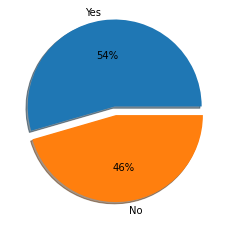

1    27631
0    23073
Name: is_churn, dtype: int64


In [165]:
churn_count = df_final['is_churn'].value_counts()
labels = ['Yes','No']
churn = y.value_counts()
myexplode = [0.1, 0]
plt.pie(churn, labels = labels, explode = myexplode, shadow = True,autopct='%.0f%%')
plt.show()
print(y.value_counts())

In [166]:
X, y = SMOTE().fit_resample(X,y)

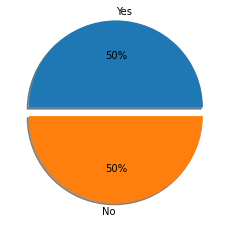

0    27631
1    27631
Name: is_churn, dtype: int64


In [167]:
churn_count = df_final['is_churn'].value_counts()
labels = ['Yes','No']
churn = y.value_counts()
myexplode = [0.1, 0]
plt.pie(churn, labels = labels, explode = myexplode, shadow = True,autopct='%.0f%%')
plt.show()
print(y.value_counts()) 

In [168]:
# split data menjadi training dan testing set
# dengan perbadingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Gradient Boosting Classifier

In [169]:
model = GradientBoostingClassifier()

In [170]:
# set parameter
params = {'learning_rate':[0.01,0.05,0.1],
          'n_estimators':np.arange(100,500,100),
          'max_depth':[2,3,4,5,6,7]}

In [171]:
# grid search of parameters, using 5 fold cross validation
gb_grid = GridSearchCV(model, params, cv=5, n_jobs=-1)

In [172]:
# fit grid search model
gb_grid.fit(X_train, y_train)

# tampilkan parameter terbaik
print("Best Parameters:", gb_grid.best_params_)
print("Train Score:", gb_grid.best_score_)
print("Test Score:", gb_grid.score(X_test,y_test))
print('Precision:', precision_score(y_test, gb_grid.predict(X_test), average='macro'))
print('Recall:', recall_score(y_test, gb_grid.predict(X_test), average='macro'))
print('GAP:', gb_grid.best_score_ - gb_grid.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Train Score: 0.8886653147269048
Test Score: 0.8845562290780784
Precision: 0.887685055082789
Recall: 0.884855948766358
GAP: 0.004109085648826394


In [173]:
# cek performa model di data test
y_pred_test_gb = gb_grid.predict(X_test)
print(classification_report(y_test, y_pred_test_gb))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5563
           1       0.85      0.93      0.89      5490

    accuracy                           0.88     11053
   macro avg       0.89      0.88      0.88     11053
weighted avg       0.89      0.88      0.88     11053



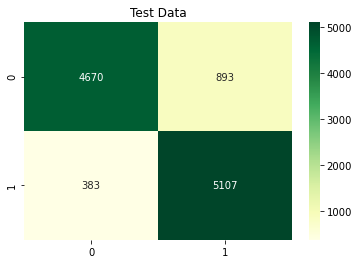

In [174]:
from sklearn import metrics
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred_test_gb)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Test Data');

In [175]:
# MAE, MSE, RMSE With hyperparameter tuned 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_gb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_gb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_gb)))

MAE: 0.11544377092192165
MSE: 0.11544377092192165
RMSE: 0.3397701736790939


In [176]:
!pip install shap

In [177]:
model = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 4, n_estimators = 200)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=200)

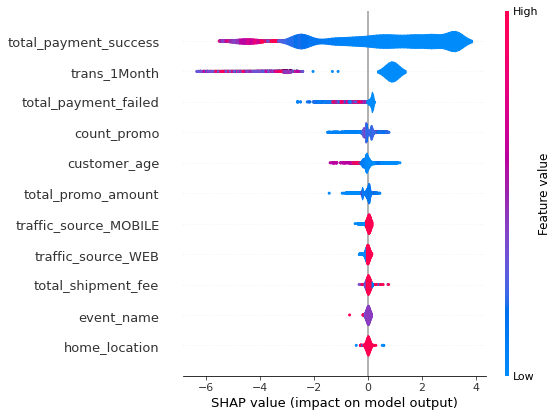

In [178]:
import shap

shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="violin")

Feature: total_promo_amount Score:  0.003352733100705774 %
Feature: total_payment_success Score:  0.7269613785881968 %
Feature: count_promo Score:  0.03244618730181682 %
Feature: total_payment_failed Score:  0.011434432899792095 %
Feature: trans_1Month Score:  0.2179253400726699 %
Feature: total_shipment_fee Score:  0.000536886232252636 %
Feature: event_name Score:  2.0581274970931958e-05 %
Feature: customer_age Score:  0.007146225648761055 %
Feature: traffic_source Score:  5.11872498044716e-05 %
Feature: traffic_source Score:  4.470762557320861e-05 %
Feature: home_location Score:  8.034000545619475e-05 %


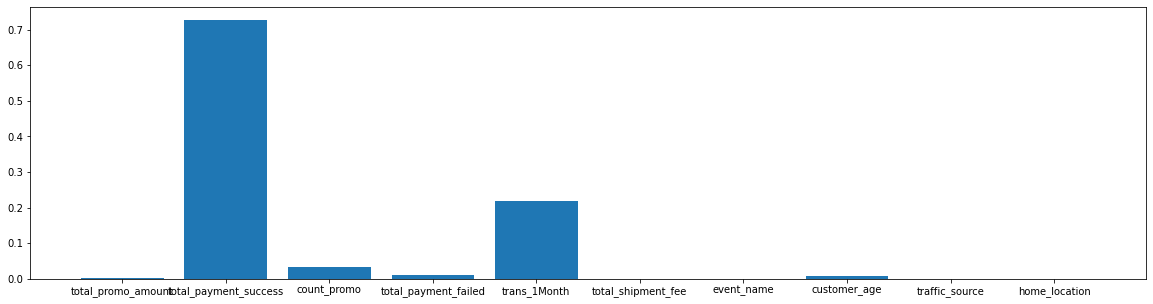

In [179]:
# Features Importance
import matplotlib.pyplot as plt
model_gb = GradientBoostingClassifier()
model_gb = model_gb.fit(X_train,y_train)

import matplotlib.pyplot as plt

importance = model_gb.feature_importances_
feature_cols = ['total_promo_amount','total_payment_success','count_promo','total_payment_failed','trans_1Month','total_shipment_fee','event_name','customer_age','traffic_source','traffic_source','home_location']
for i,v in enumerate(importance):
    print('Feature:', feature_cols[i],'Score: ', v, '%')
# plot feature importance
plt.figure(figsize=(20,5))
plt.bar([X for X in feature_cols], importance)
plt.show()

## Catboost Classifier

In [203]:
model = CatBoostClassifier()

In [204]:
# set parameter
params = {'depth': [4,5,6,7,8,9,10],
          'learning_rate': [0.01,0.02,0.03,0.04],
          'iterations': [10,20,30,40,50,60,70,80,90,100]}

In [205]:
# grid search of parameters, using 5 fold cross validation, 
cb_grid = GridSearchCV(model, params, cv=5, n_jobs=-1)

In [206]:
# fit grid search model
cb_grid.fit(X_train, y_train, silent=True)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002ADA27AAF40>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [207]:
# tampilkan parameter terbaik
print("Best Parameters:", cb_grid.best_params_)
print("Train Score:", cb_grid.best_score_)
print("Test Score:", cb_grid.score(X_test,y_test))
print('Precision:', precision_score(y_test, cb_grid.predict(X_test), average='macro'))
print('Recall:', recall_score(y_test, cb_grid.predict(X_test), average='macro'))
print('GAP:', cb_grid.best_score_ - cb_grid.score(X_test,y_test))

Best Parameters: {'depth': 9, 'iterations': 100, 'learning_rate': 0.04}
Train Score: 0.8844580117704876
Test Score: 0.8796706776440786
Precision: 0.8838224852462377
Recall: 0.8800167938896306
GAP: 0.004787334126408971


In [208]:
# cek performa model di data test
y_pred_test_cb = cb_grid.predict(X_test)
print(classification_report(y_test,y_pred_test_cb))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87      5563
           1       0.84      0.93      0.89      5490

    accuracy                           0.88     11053
   macro avg       0.88      0.88      0.88     11053
weighted avg       0.88      0.88      0.88     11053



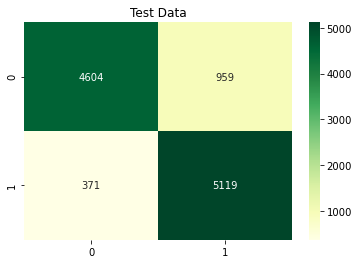

In [209]:
from sklearn import metrics
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred_test_cb)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Test Data');

In [210]:
# MAE, MSE, RMSE With hyperparameter tuned 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_cb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_cb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_cb)))

MAE: 0.12032932235592148
MSE: 0.12032932235592148
RMSE: 0.3468851717152543


## XGB Classifier

In [188]:
model = XGBClassifier()

In [189]:
# create the random grid
params = {'n_estimators': [100, 200, 500],
          'learning_rate': [0.01,0.05,0.1]}

In [190]:
# grid search of parameters, using 5 fold cross validation, 
xgb_grid = GridSearchCV(model, params, cv=5, n_jobs=-1)

In [191]:
# fit grid search model
xgb_grid.fit(X_train, y_train)

# tampilkan parameter terbaik
print("Best Parameters:", xgb_grid.best_params_)
print("Train Score:", xgb_grid.best_score_)
print("Test Score:", xgb_grid.score(X_test,y_test))
print('Precision:', precision_score(y_test, xgb_grid.predict(X_test), average='macro'))
print('Recall:', recall_score(y_test, xgb_grid.predict(X_test), average='macro'))
print('GAP:', xgb_grid.best_score_ - xgb_grid.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 200}
Train Score: 0.8878057909186603
Test Score: 0.883470550981634
Precision: 0.8867975551398375
Recall: 0.8837797842694068
GAP: 0.004335239937026336


In [192]:
# cek performa model di data test
y_pred_test_xgb = xgb_grid.predict(X_test)
print(classification_report(y_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5563
           1       0.85      0.93      0.89      5490

    accuracy                           0.88     11053
   macro avg       0.89      0.88      0.88     11053
weighted avg       0.89      0.88      0.88     11053



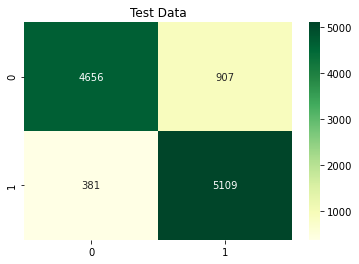

In [193]:
from sklearn import metrics
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred_test_xgb)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Test Data');

In [194]:
# MAE, MSE, RMSE With hyperparameter tuned 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_xgb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_xgb)))

MAE: 0.11652944901836605
MSE: 0.11652944901836605
RMSE: 0.34136410036552767
